In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('../originalni_datasetovi/train.csv')
df_train['date'] = pd.to_datetime(df_train.date)

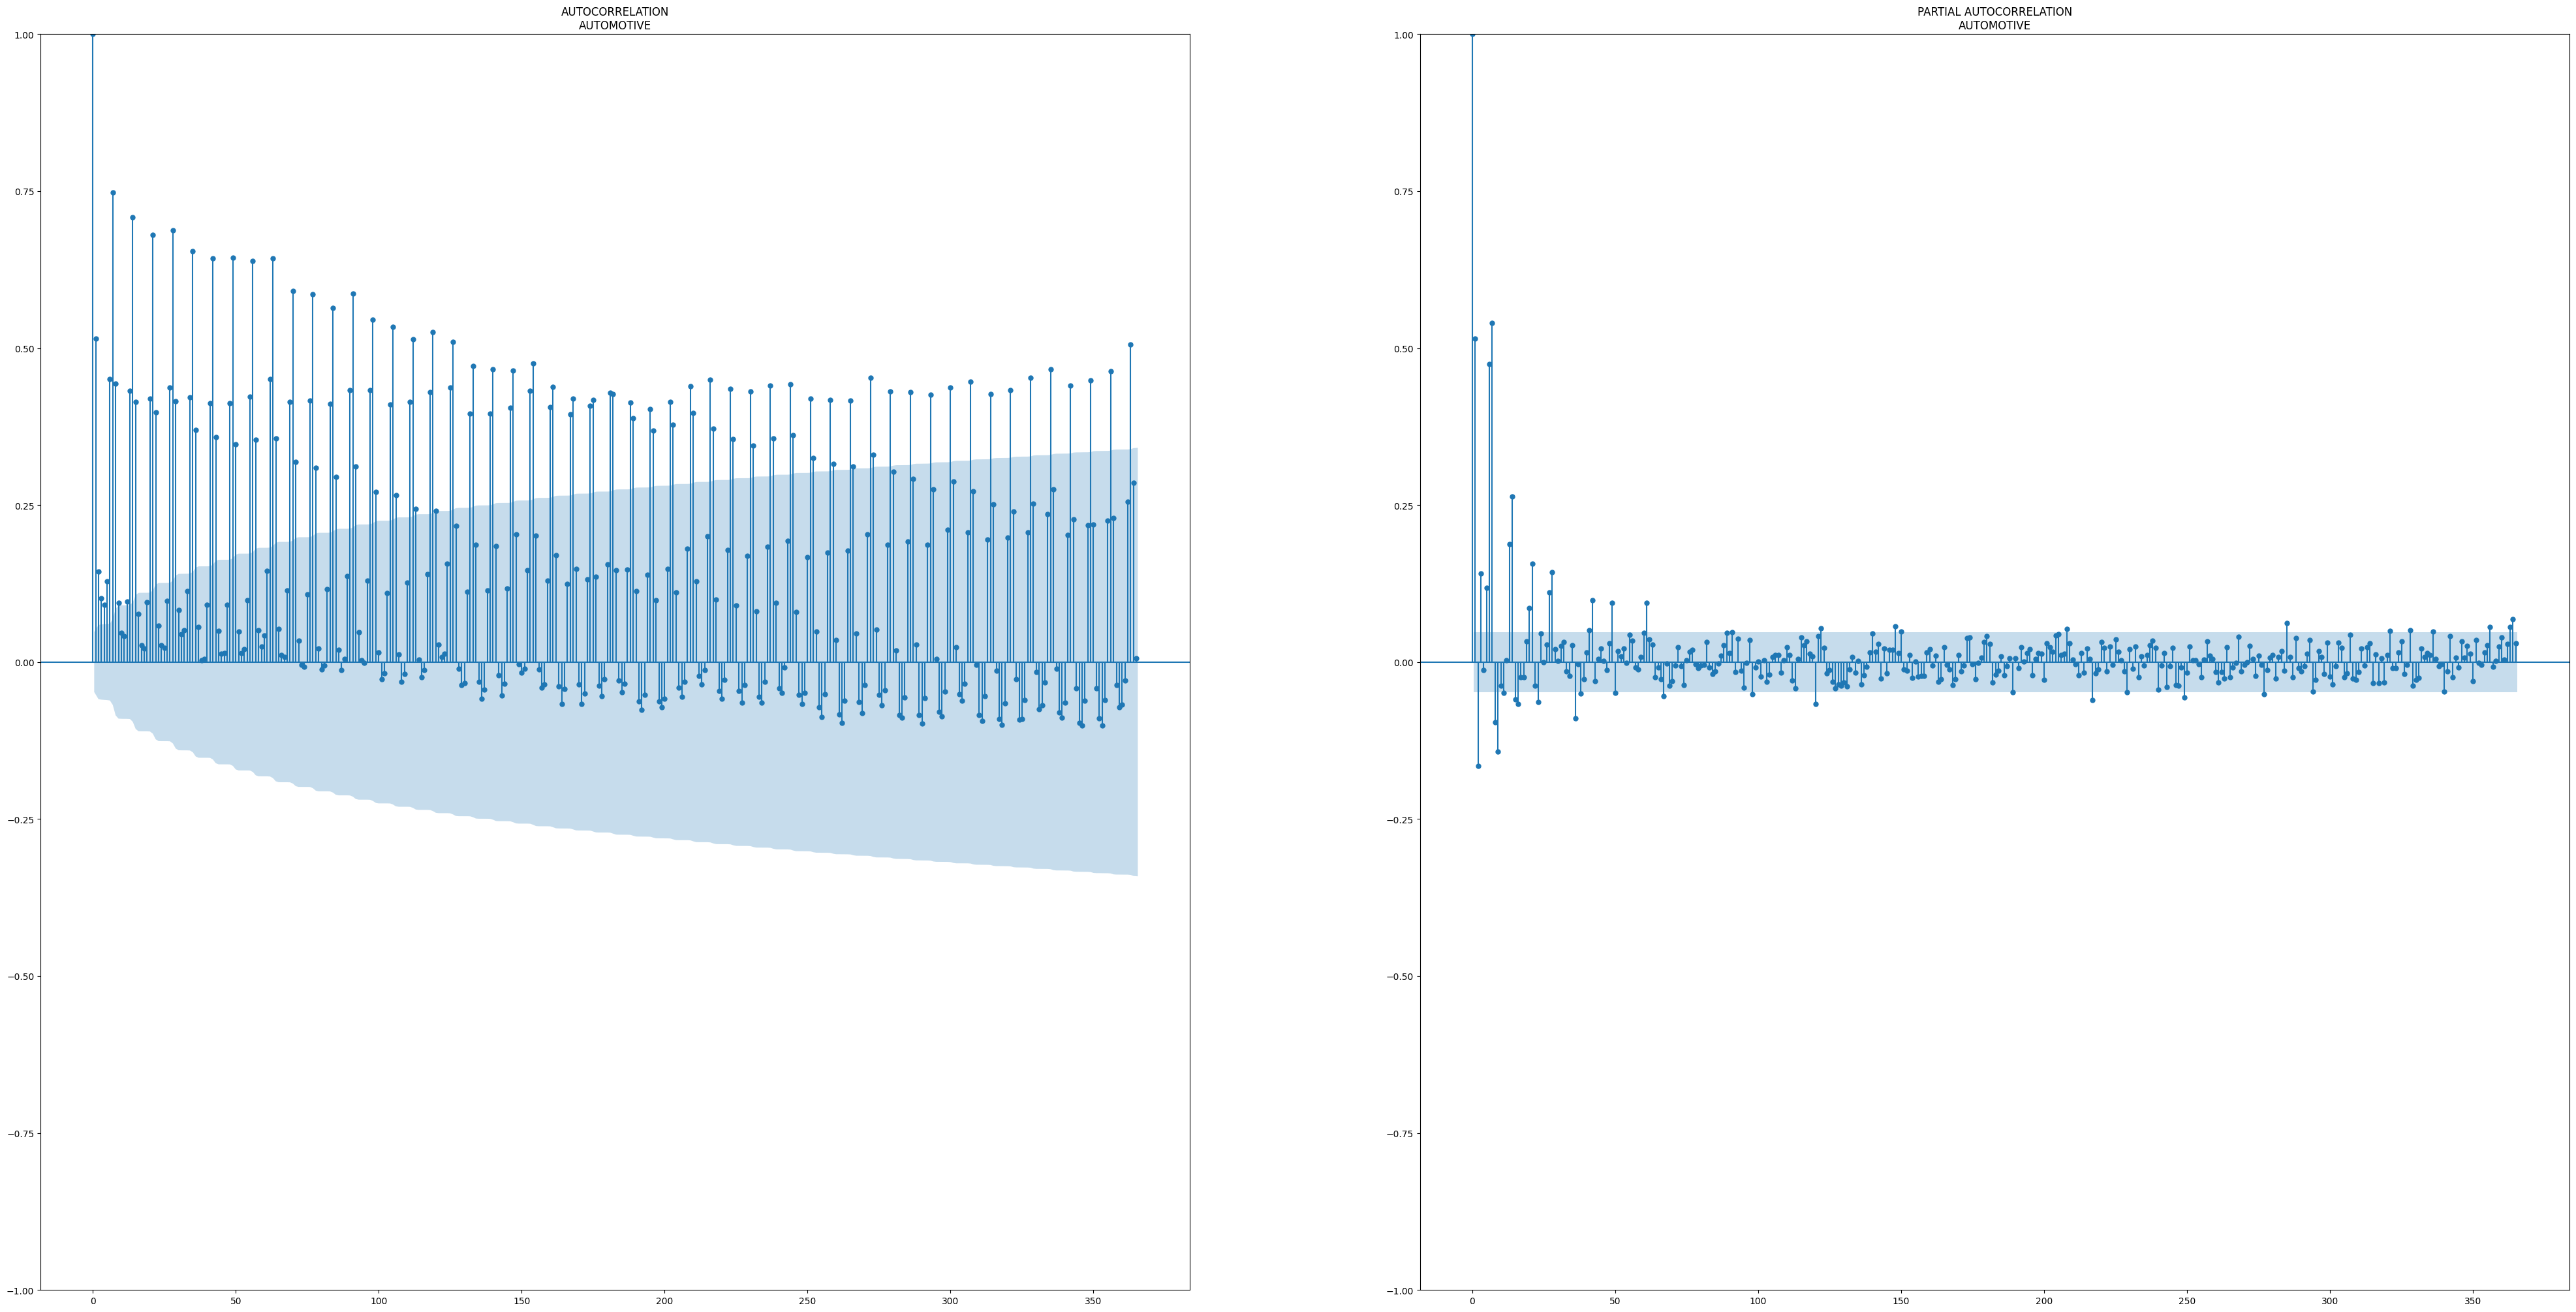

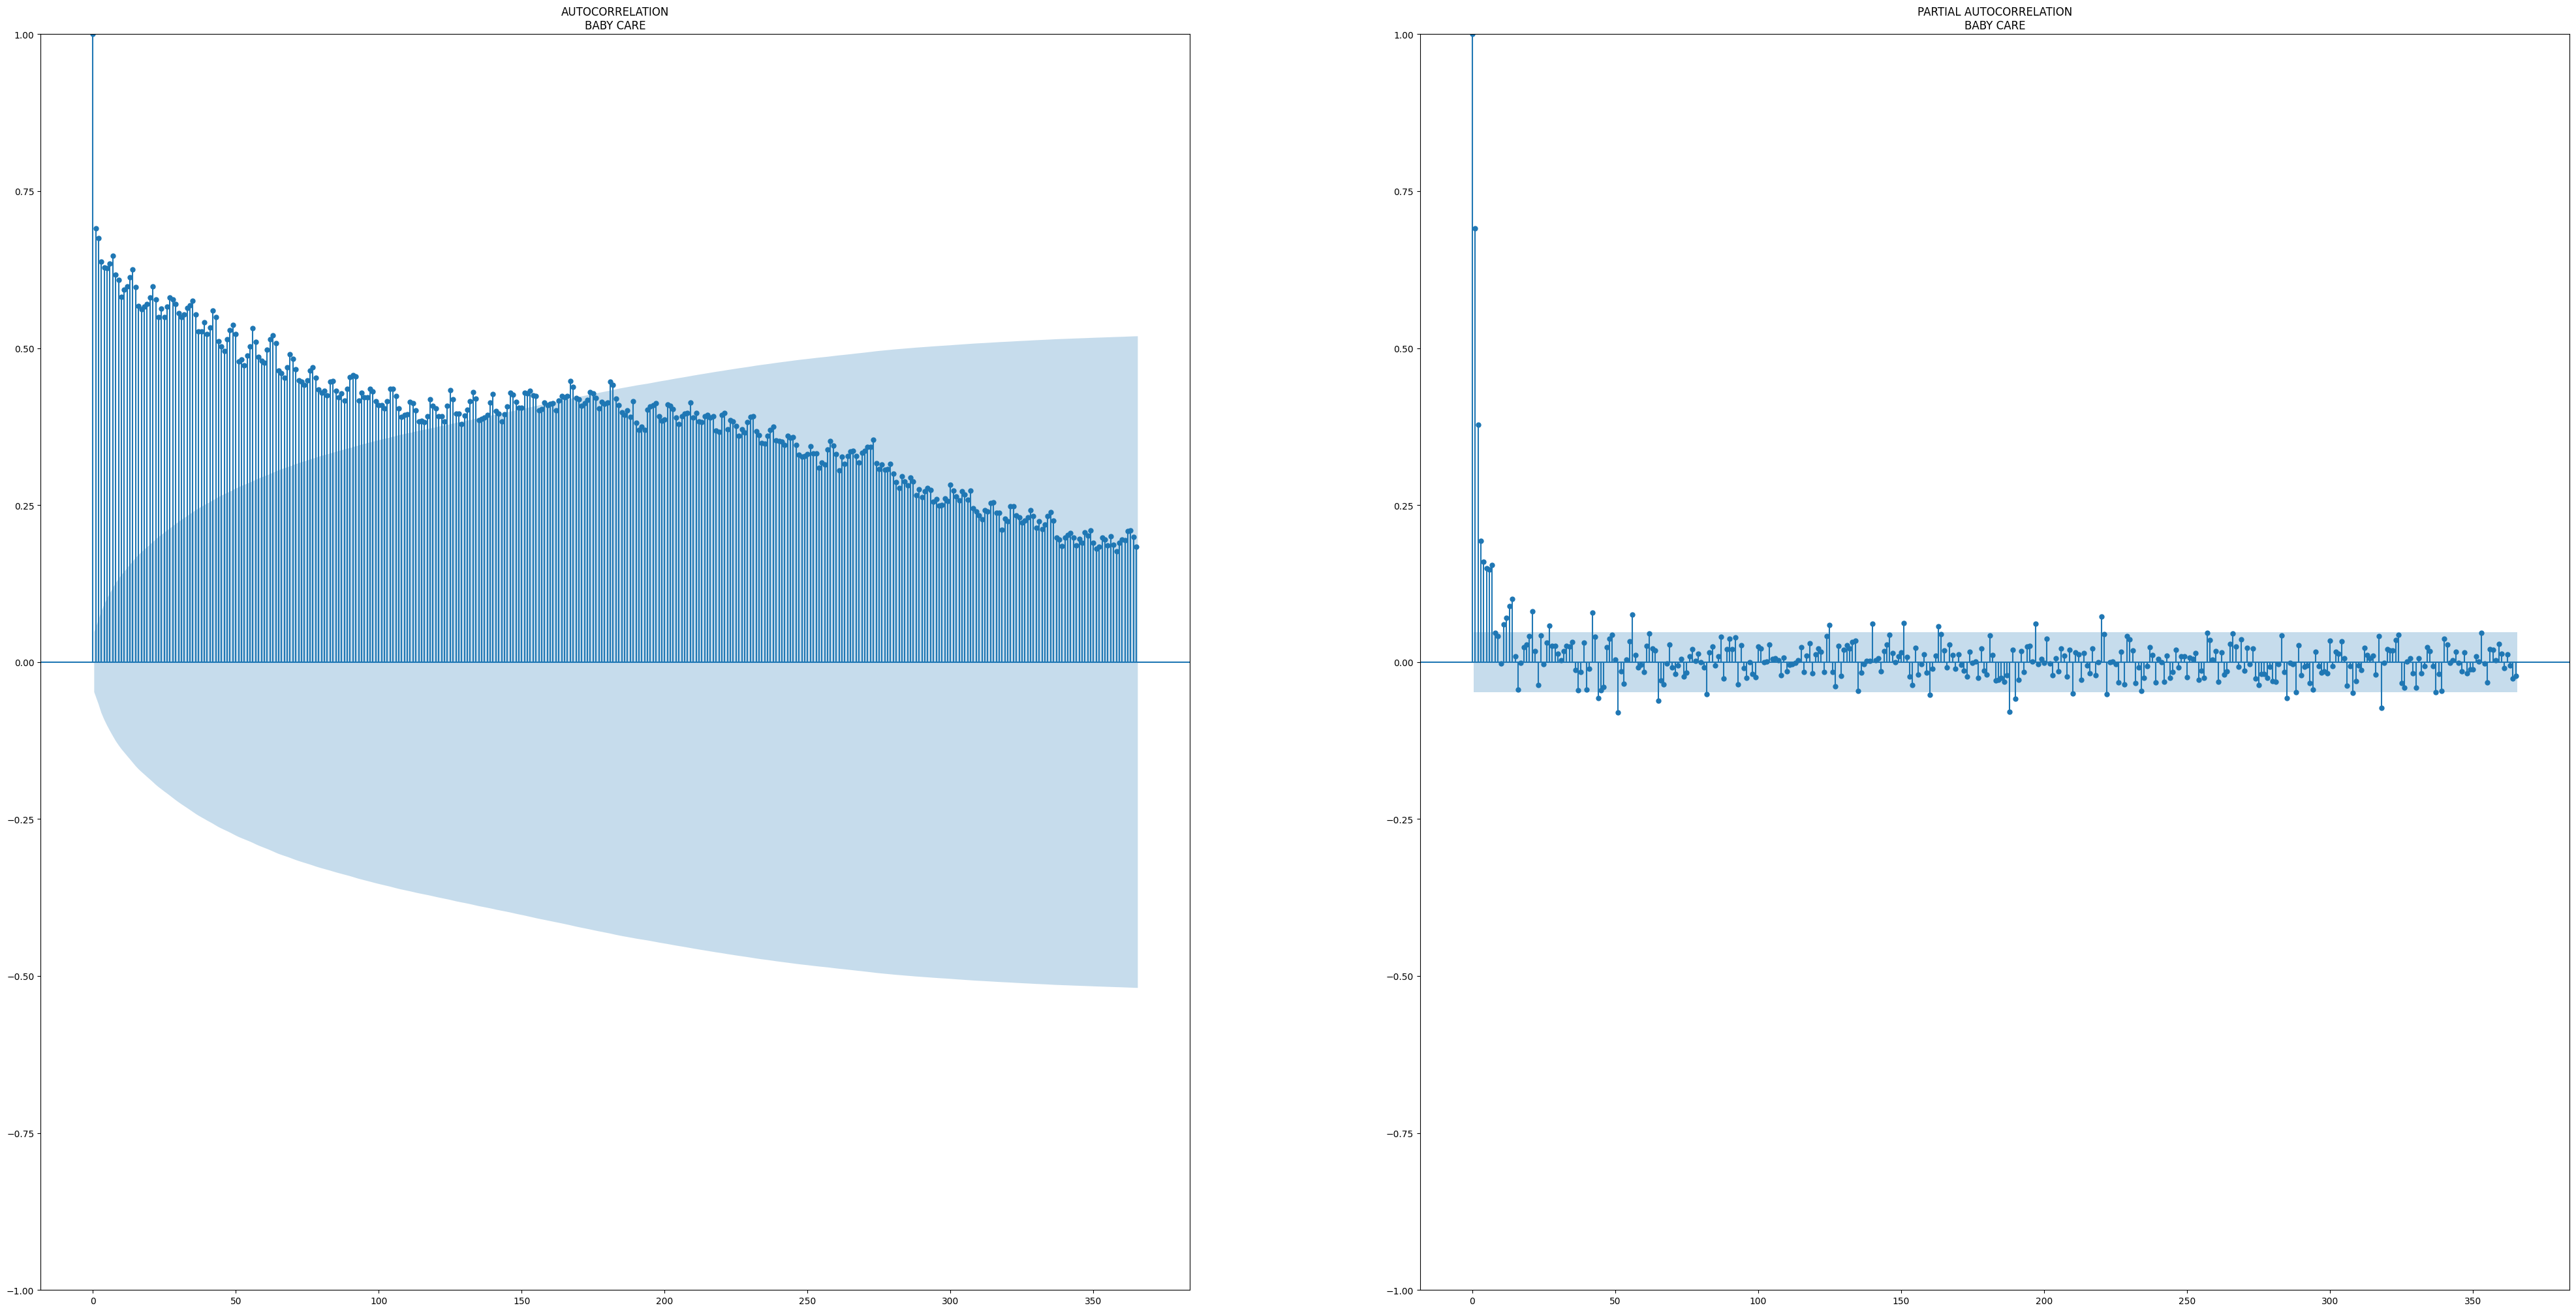

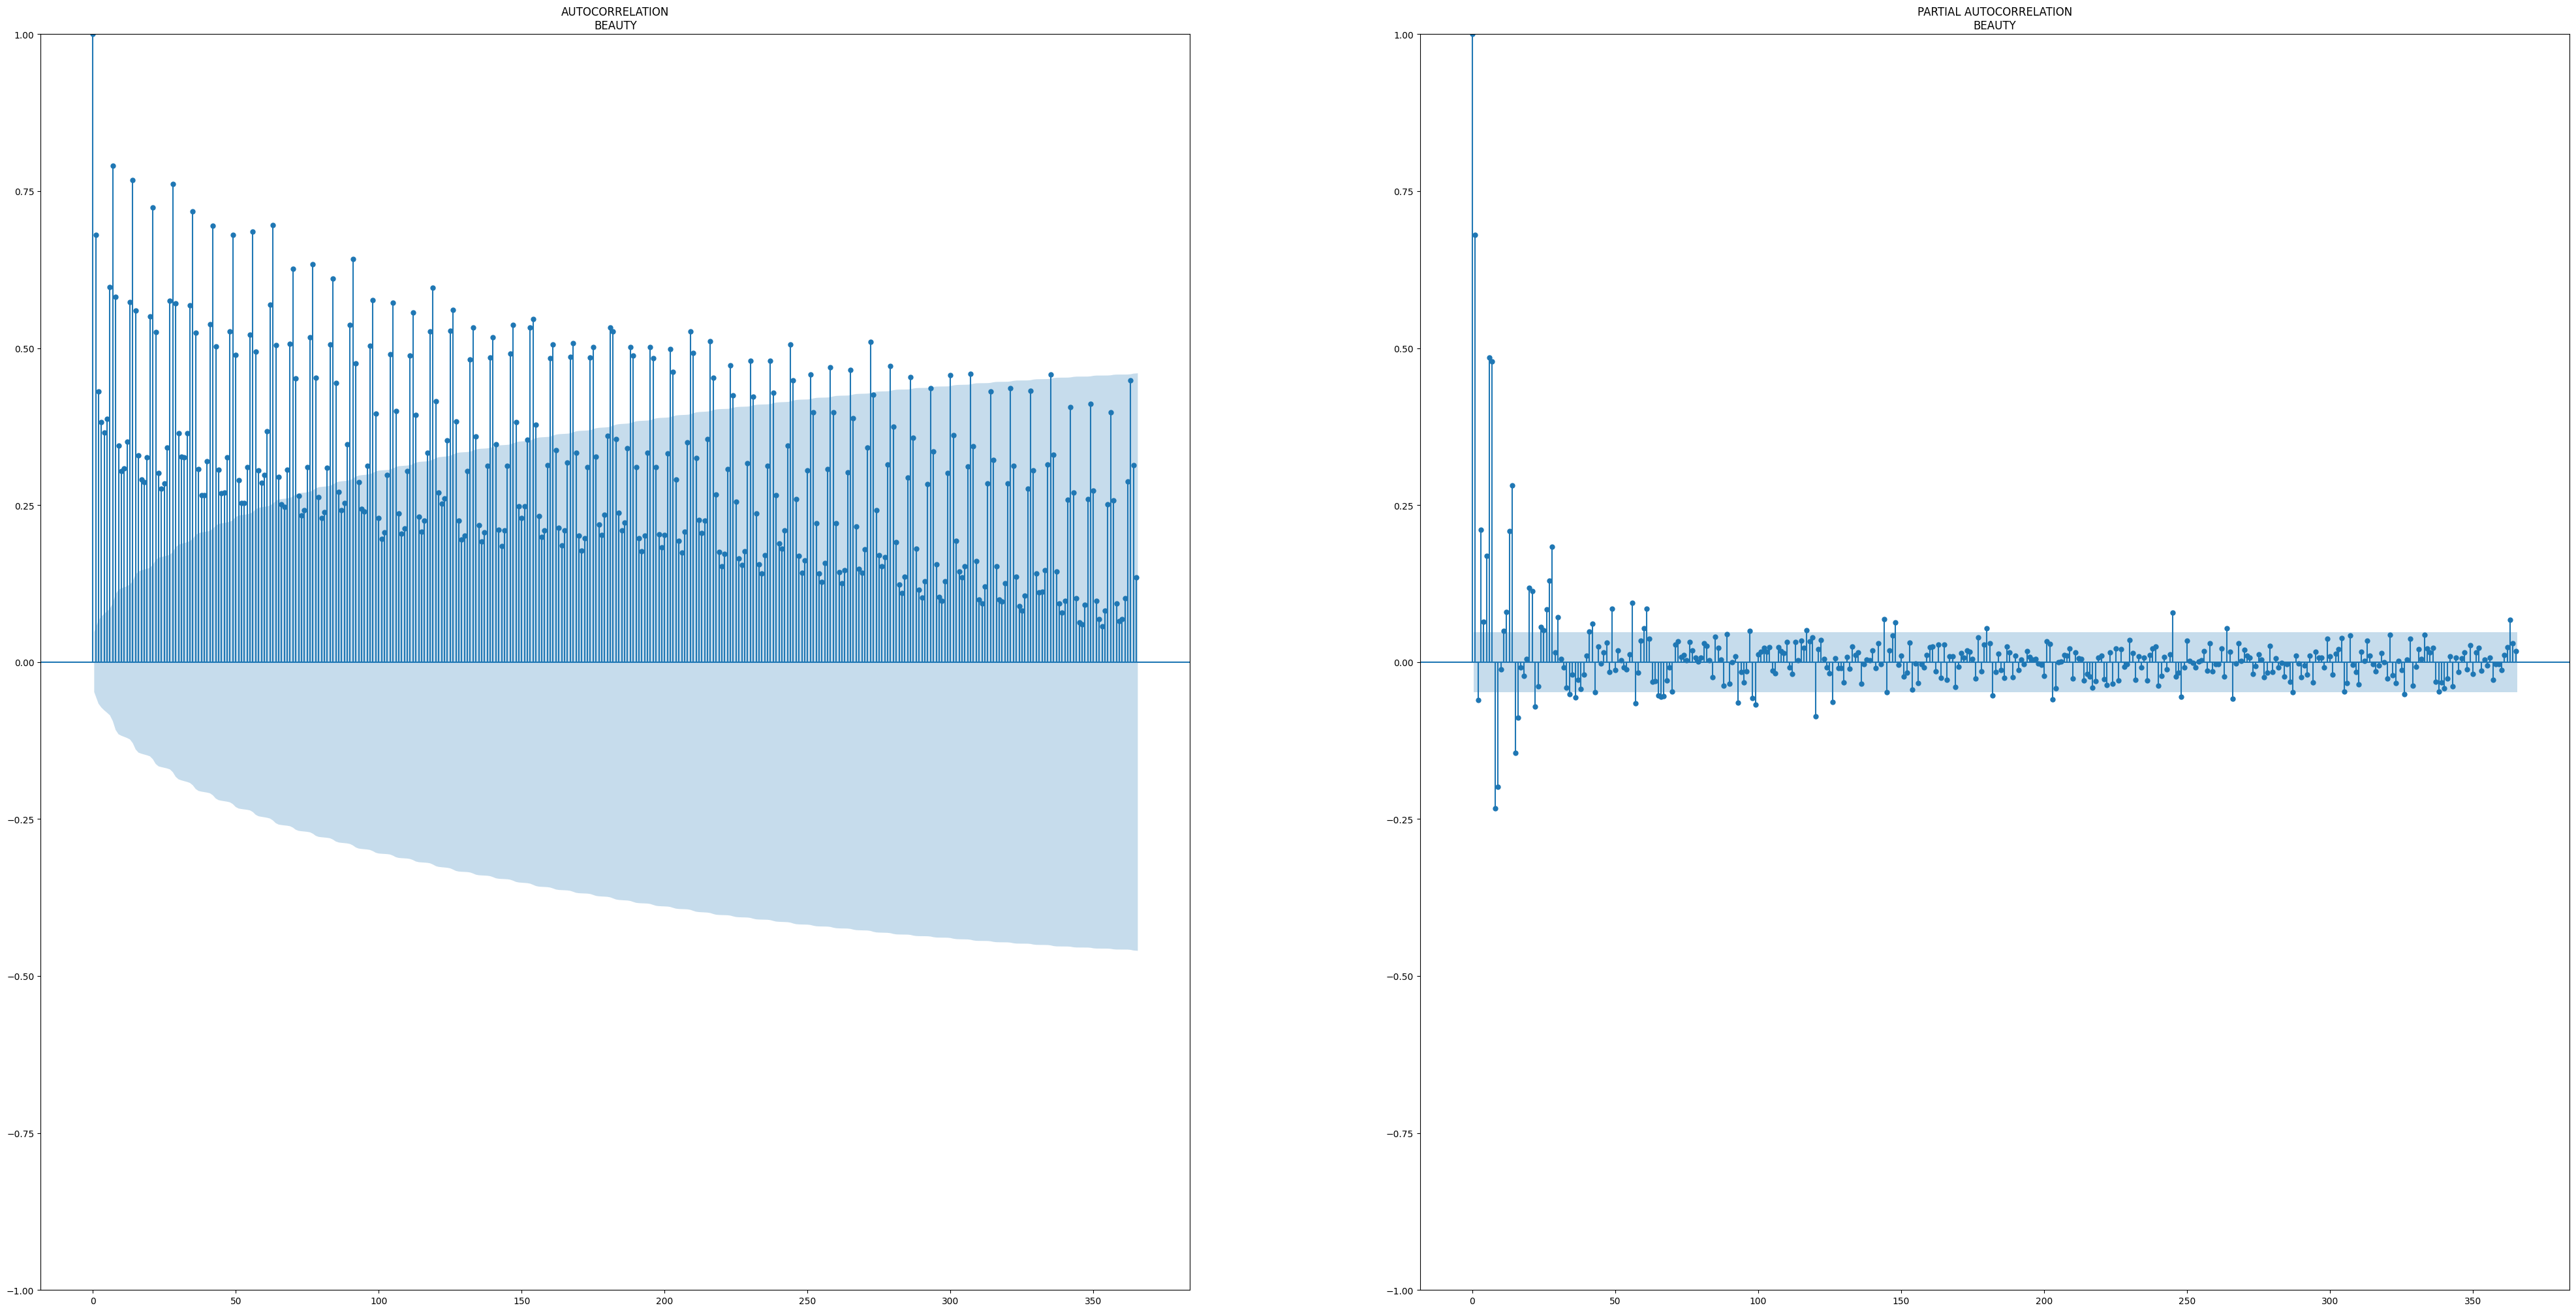

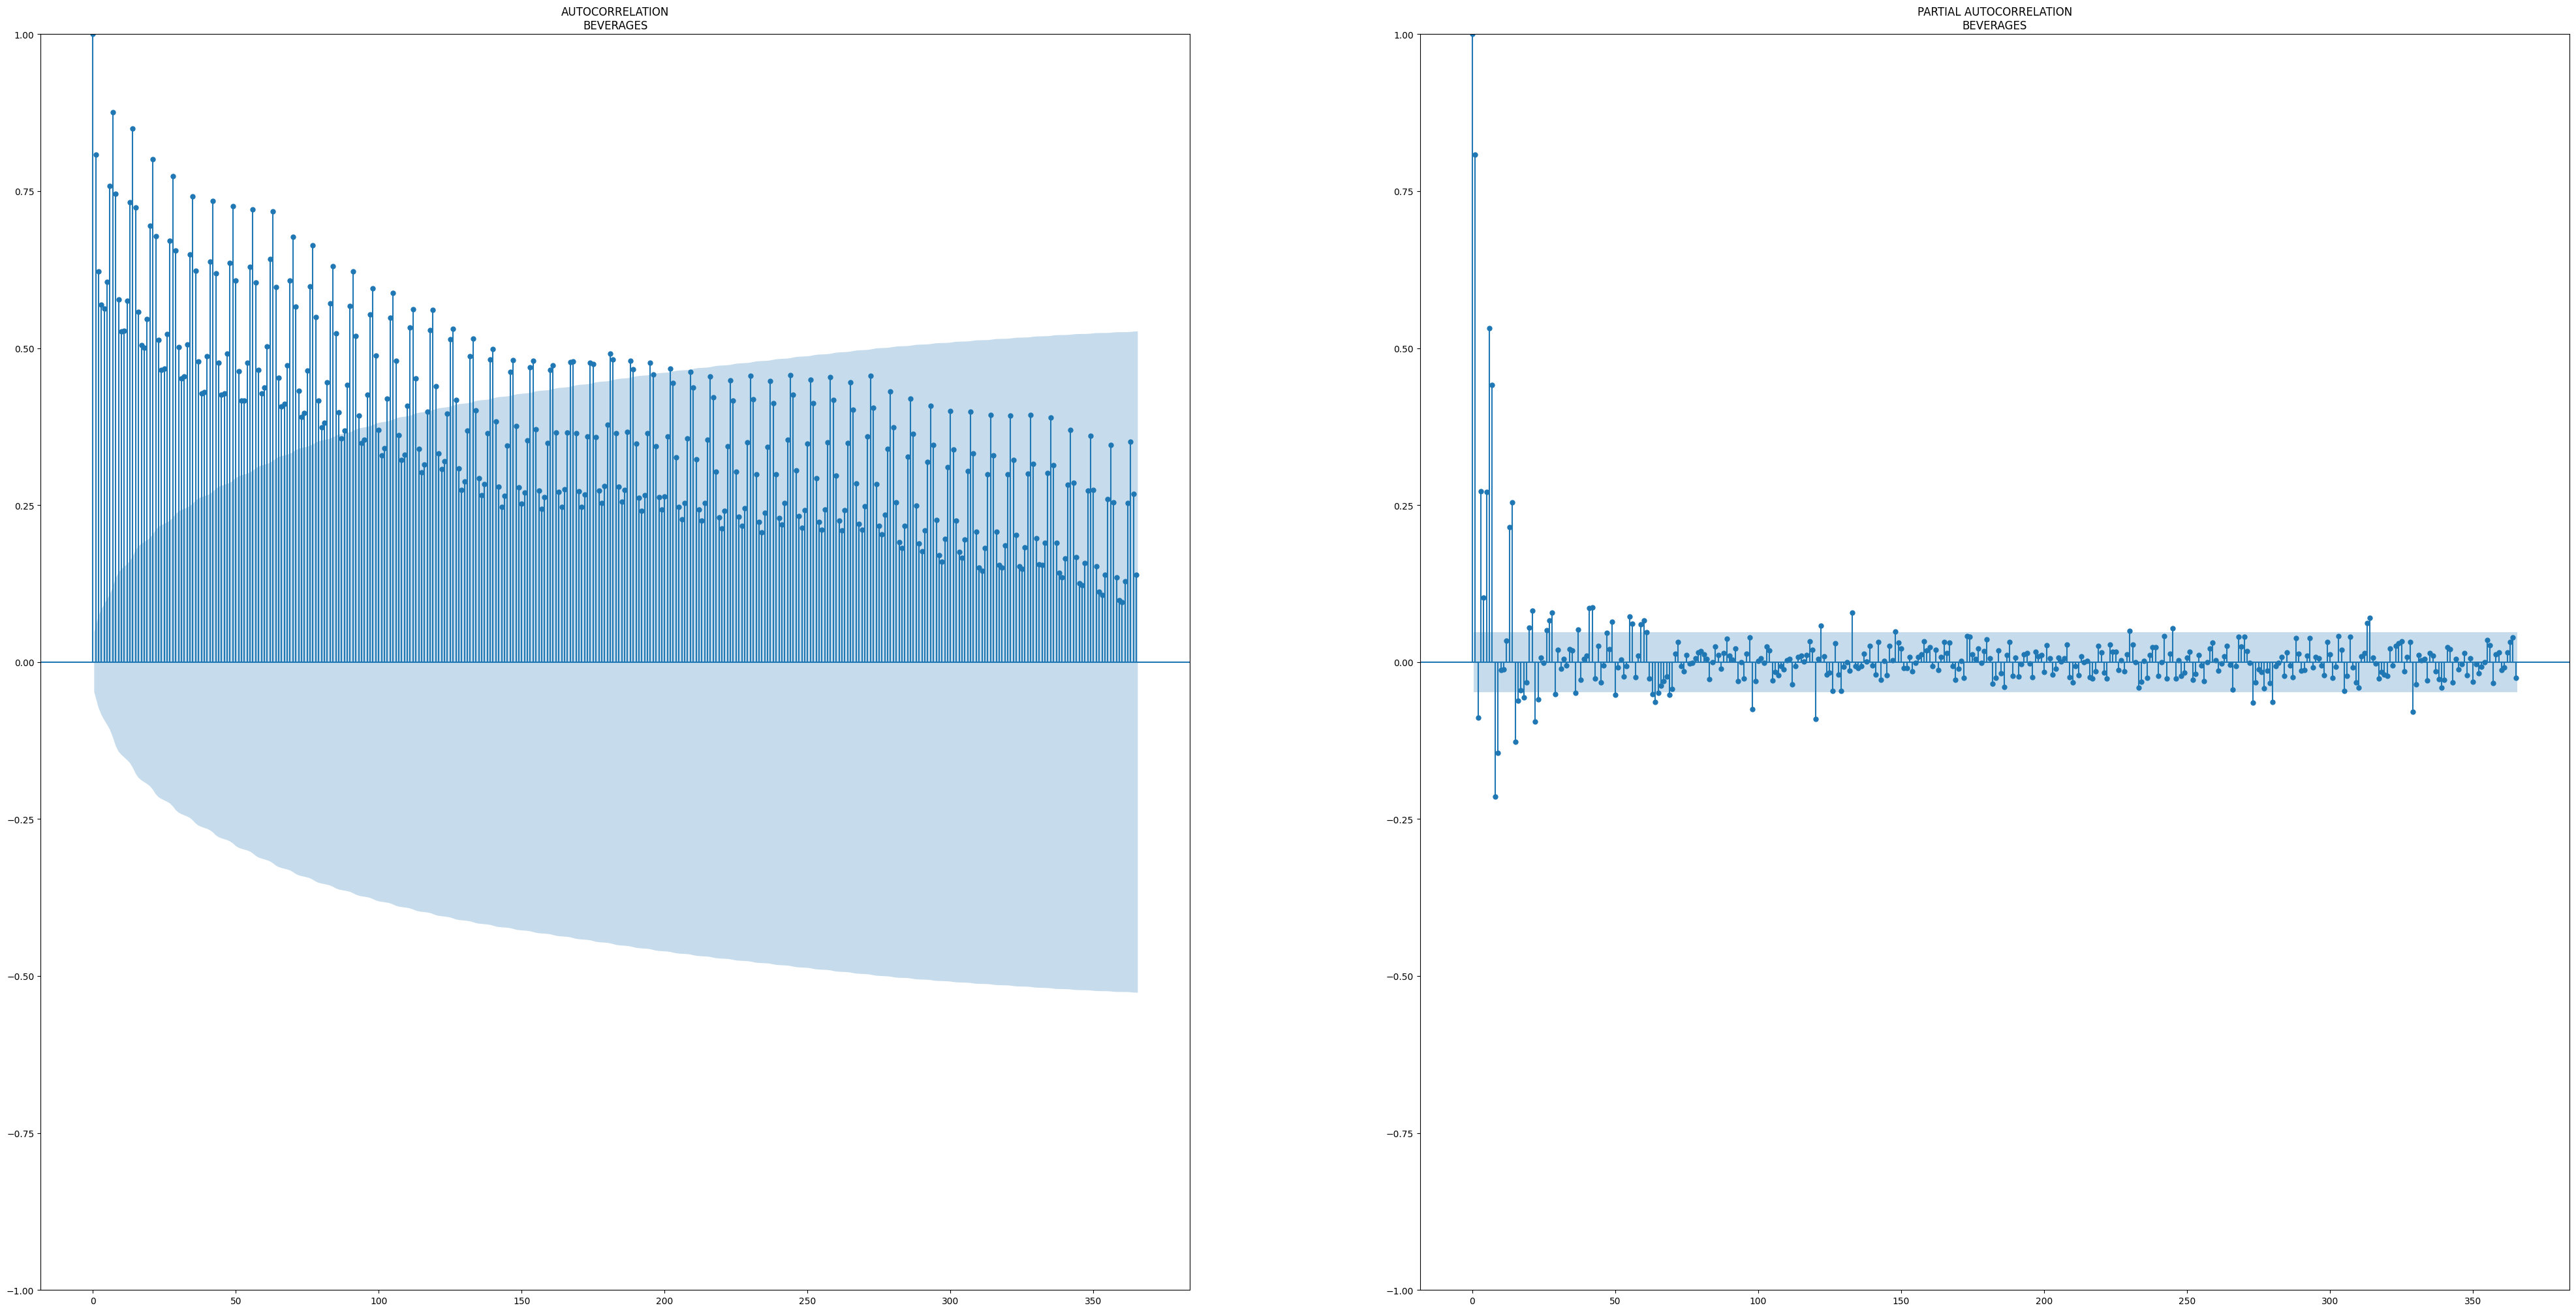

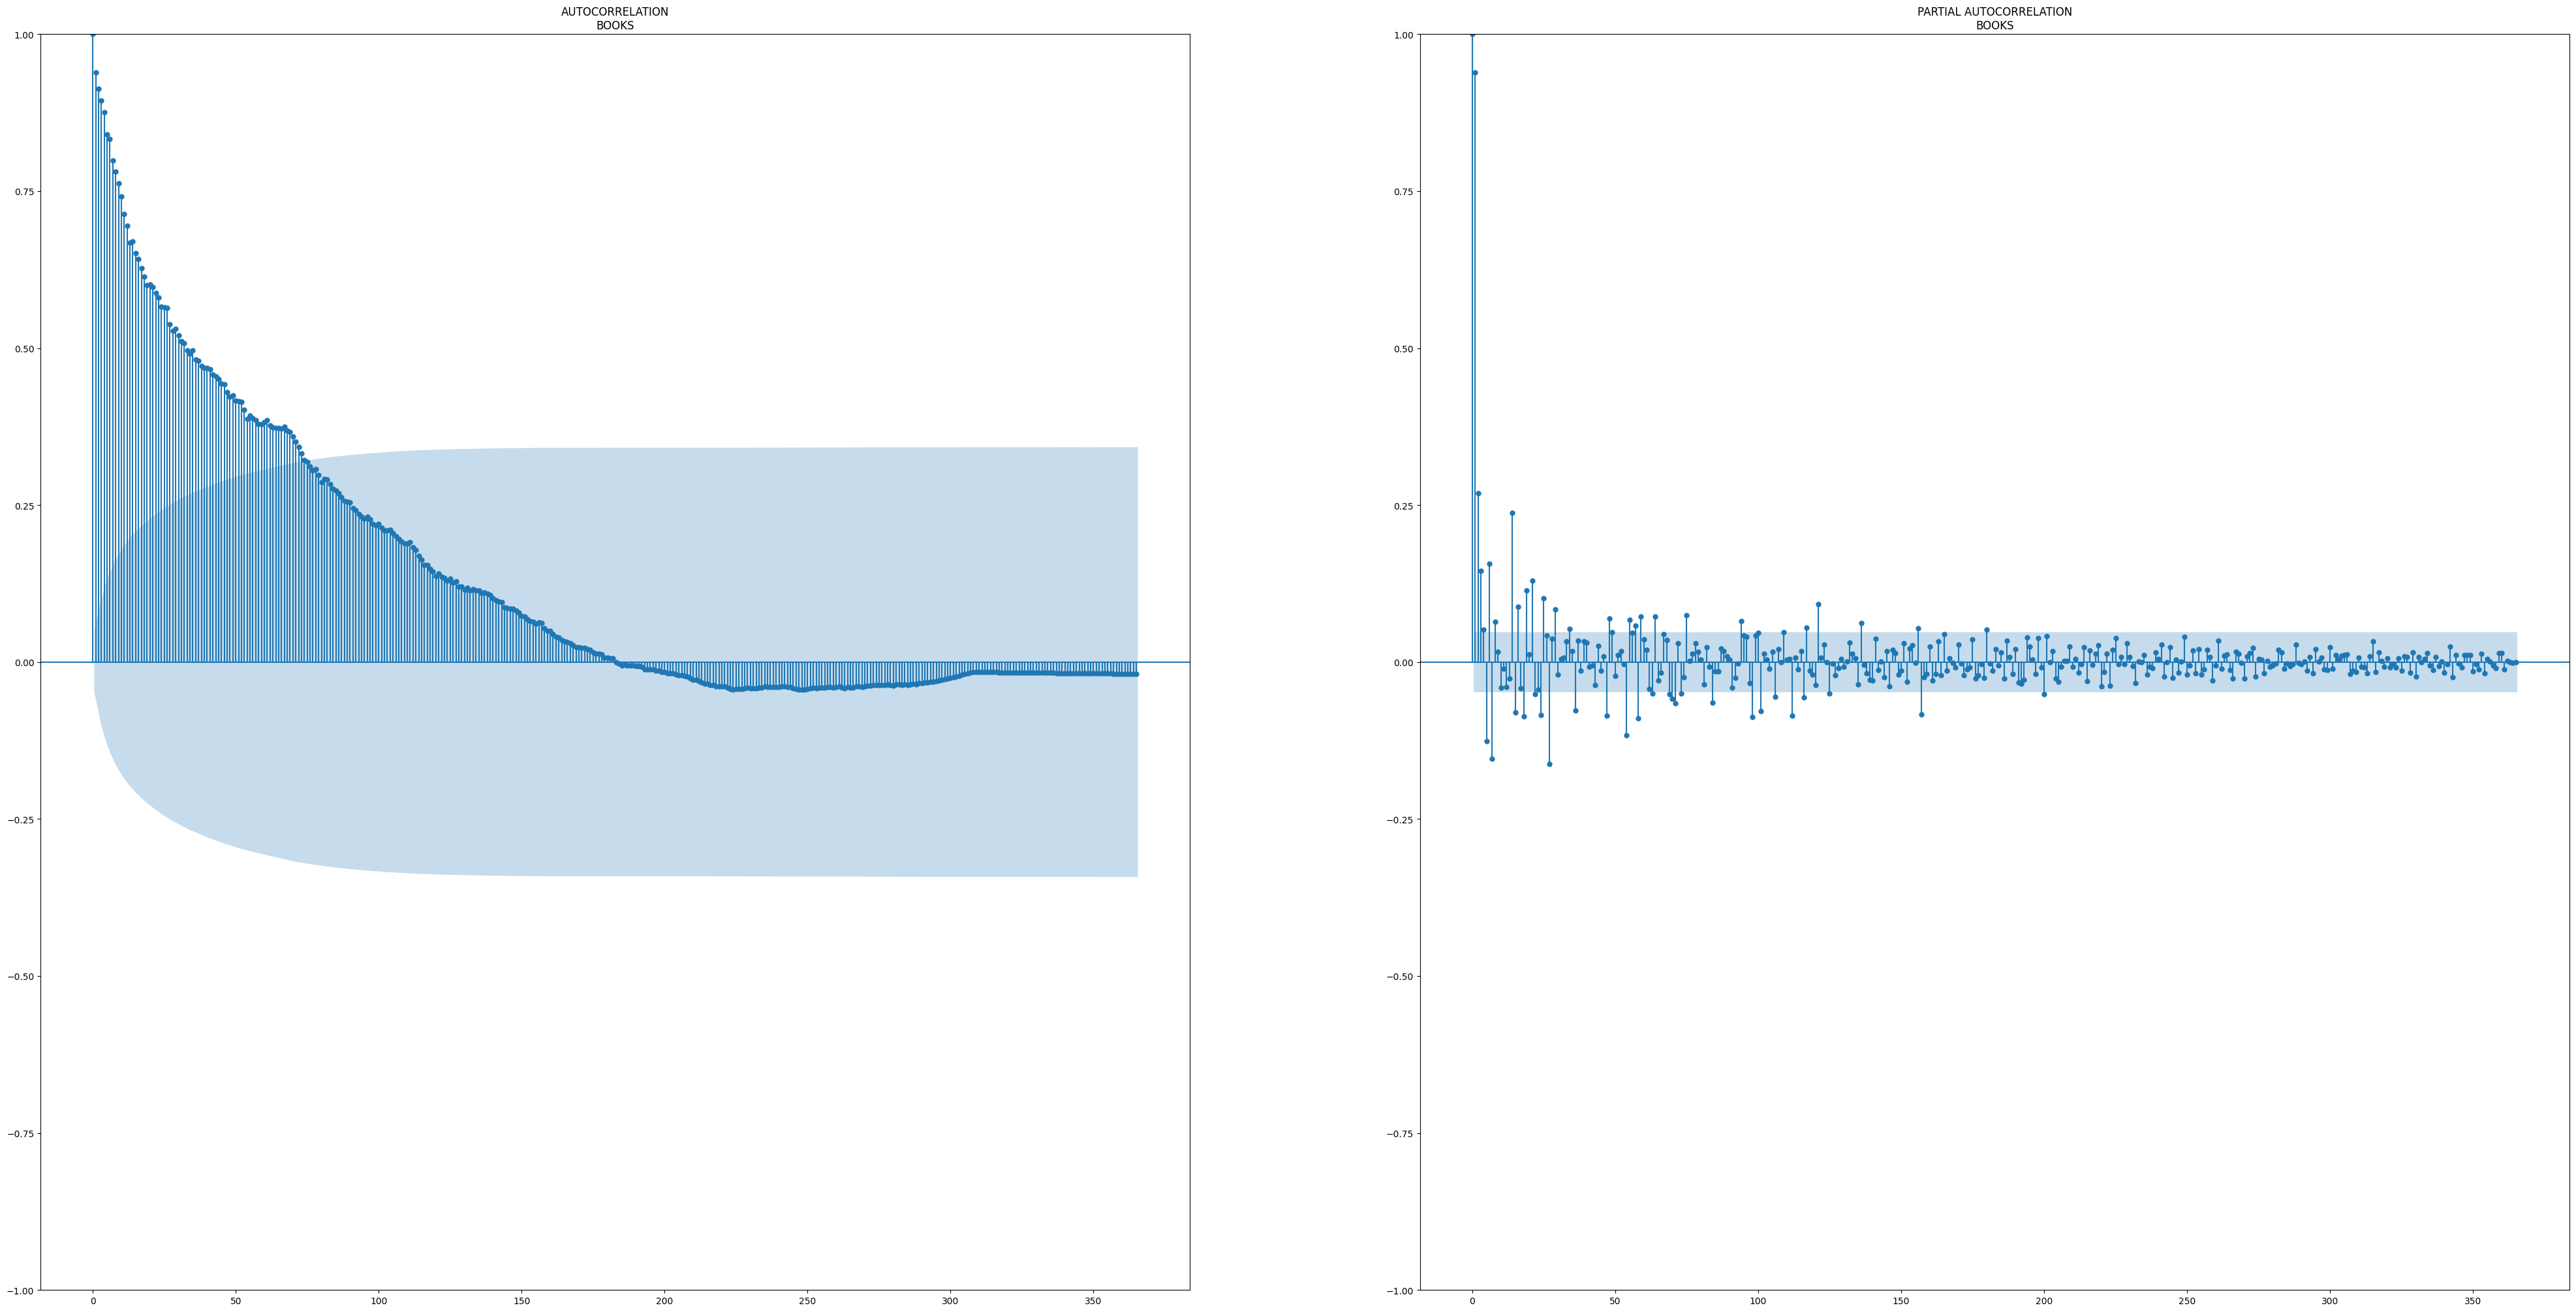

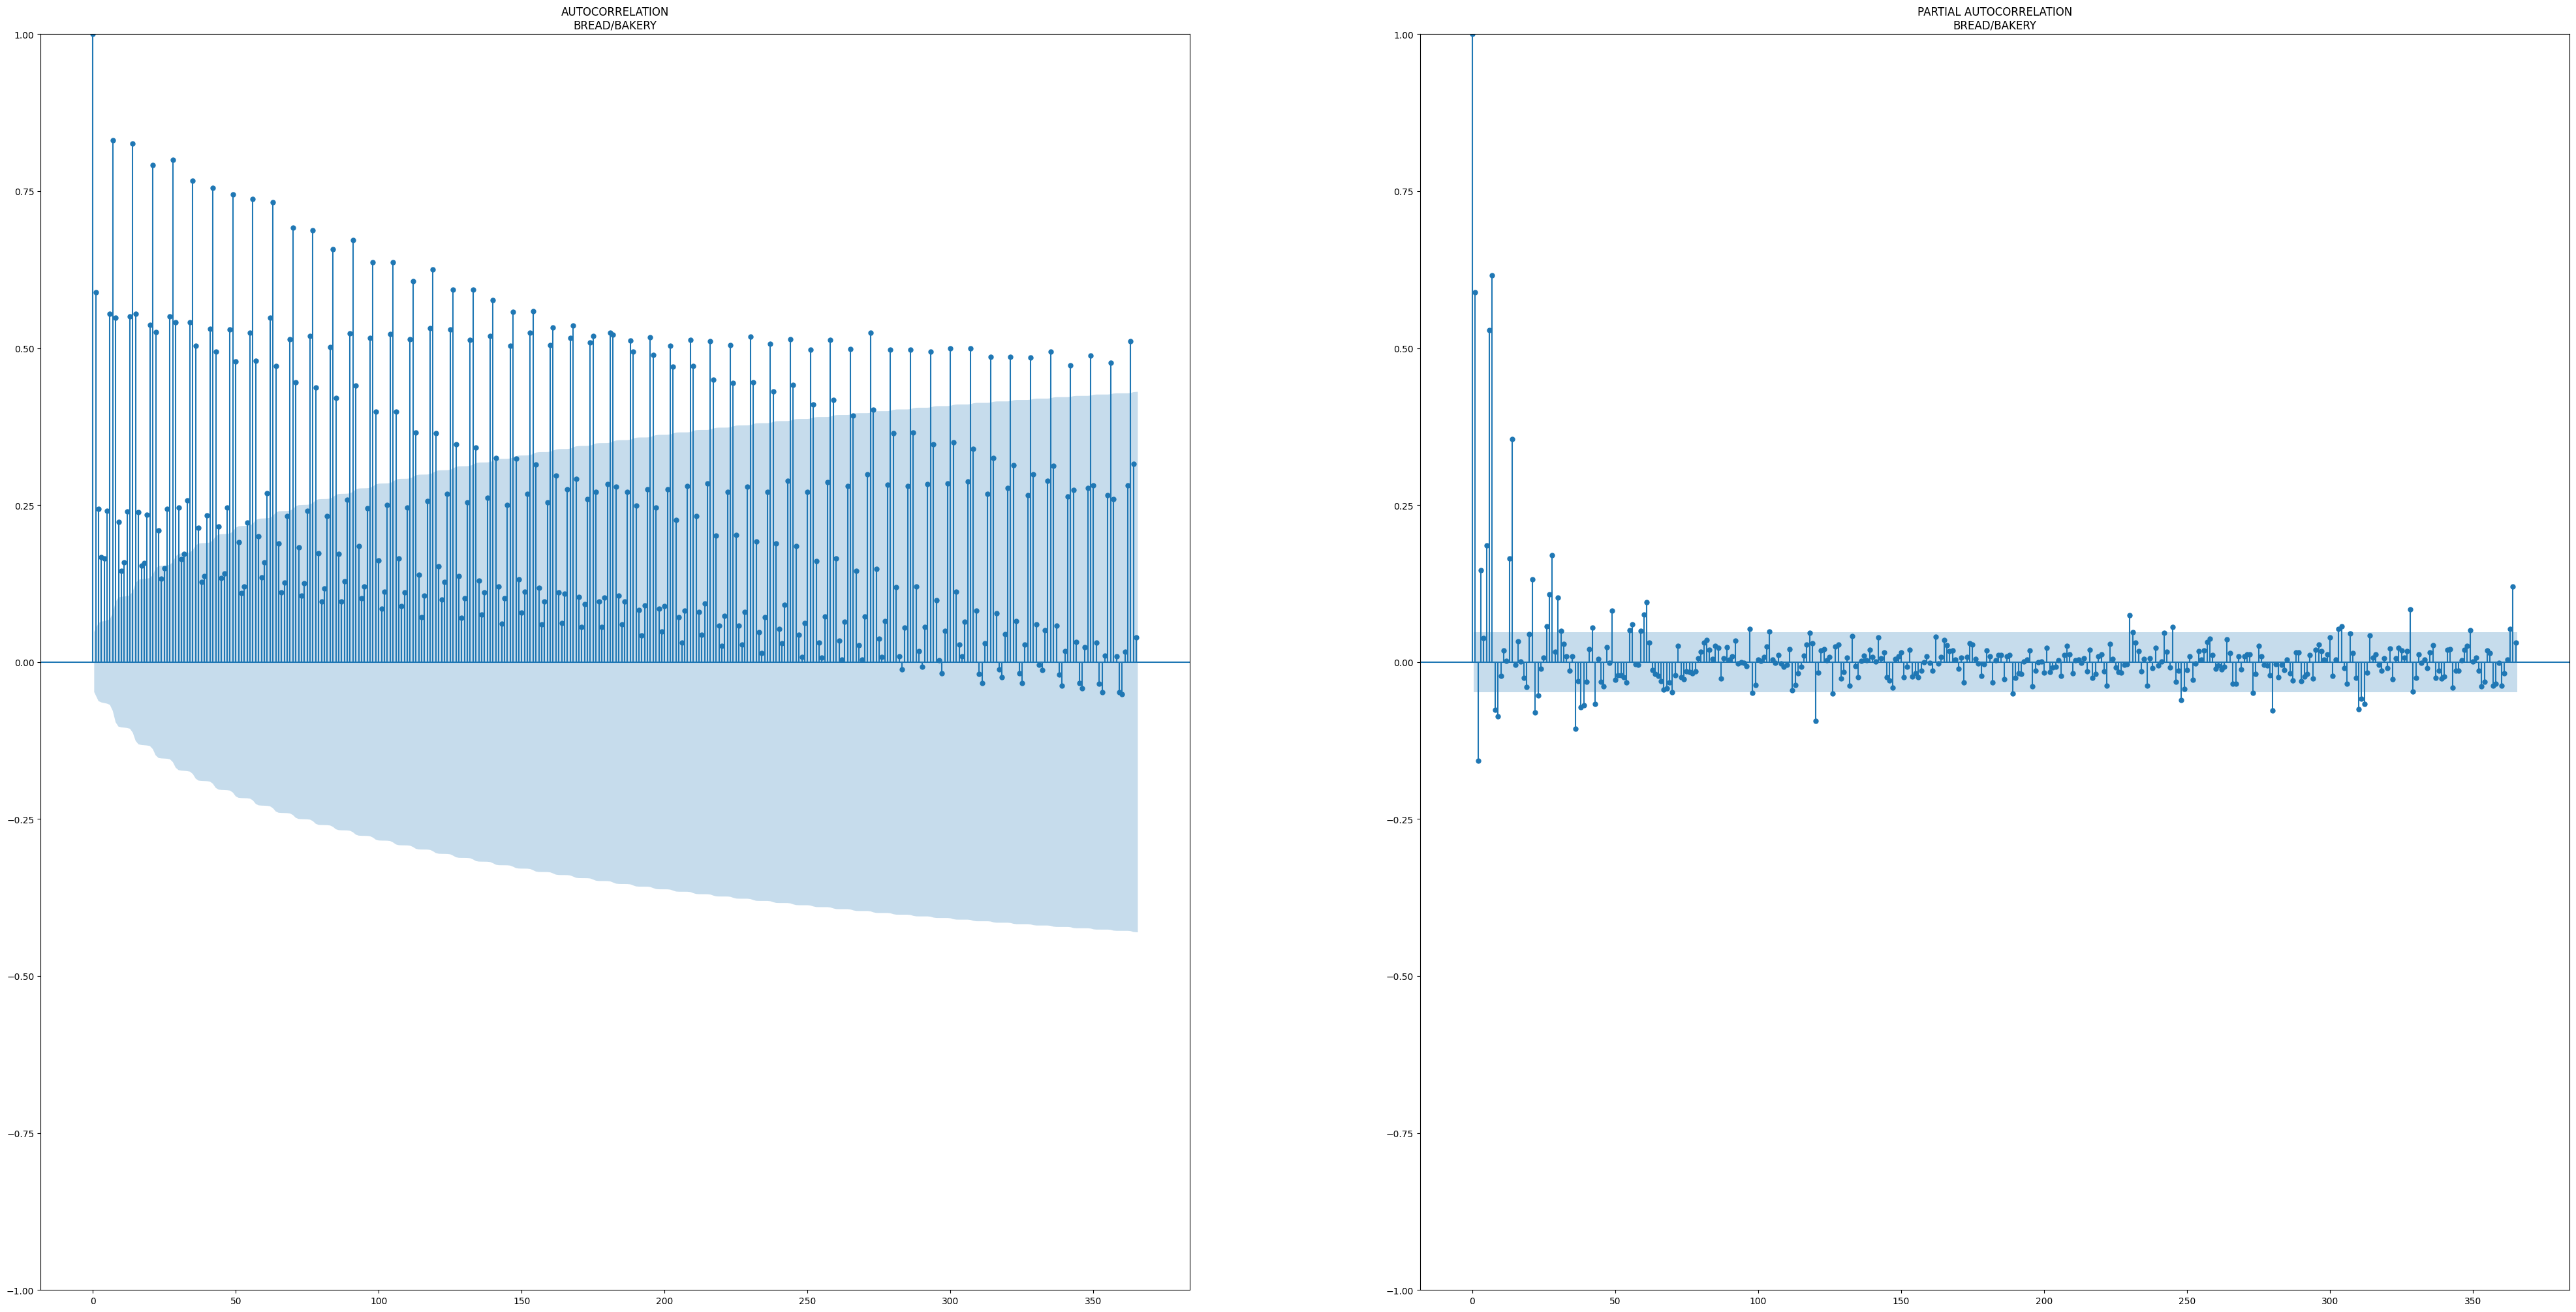

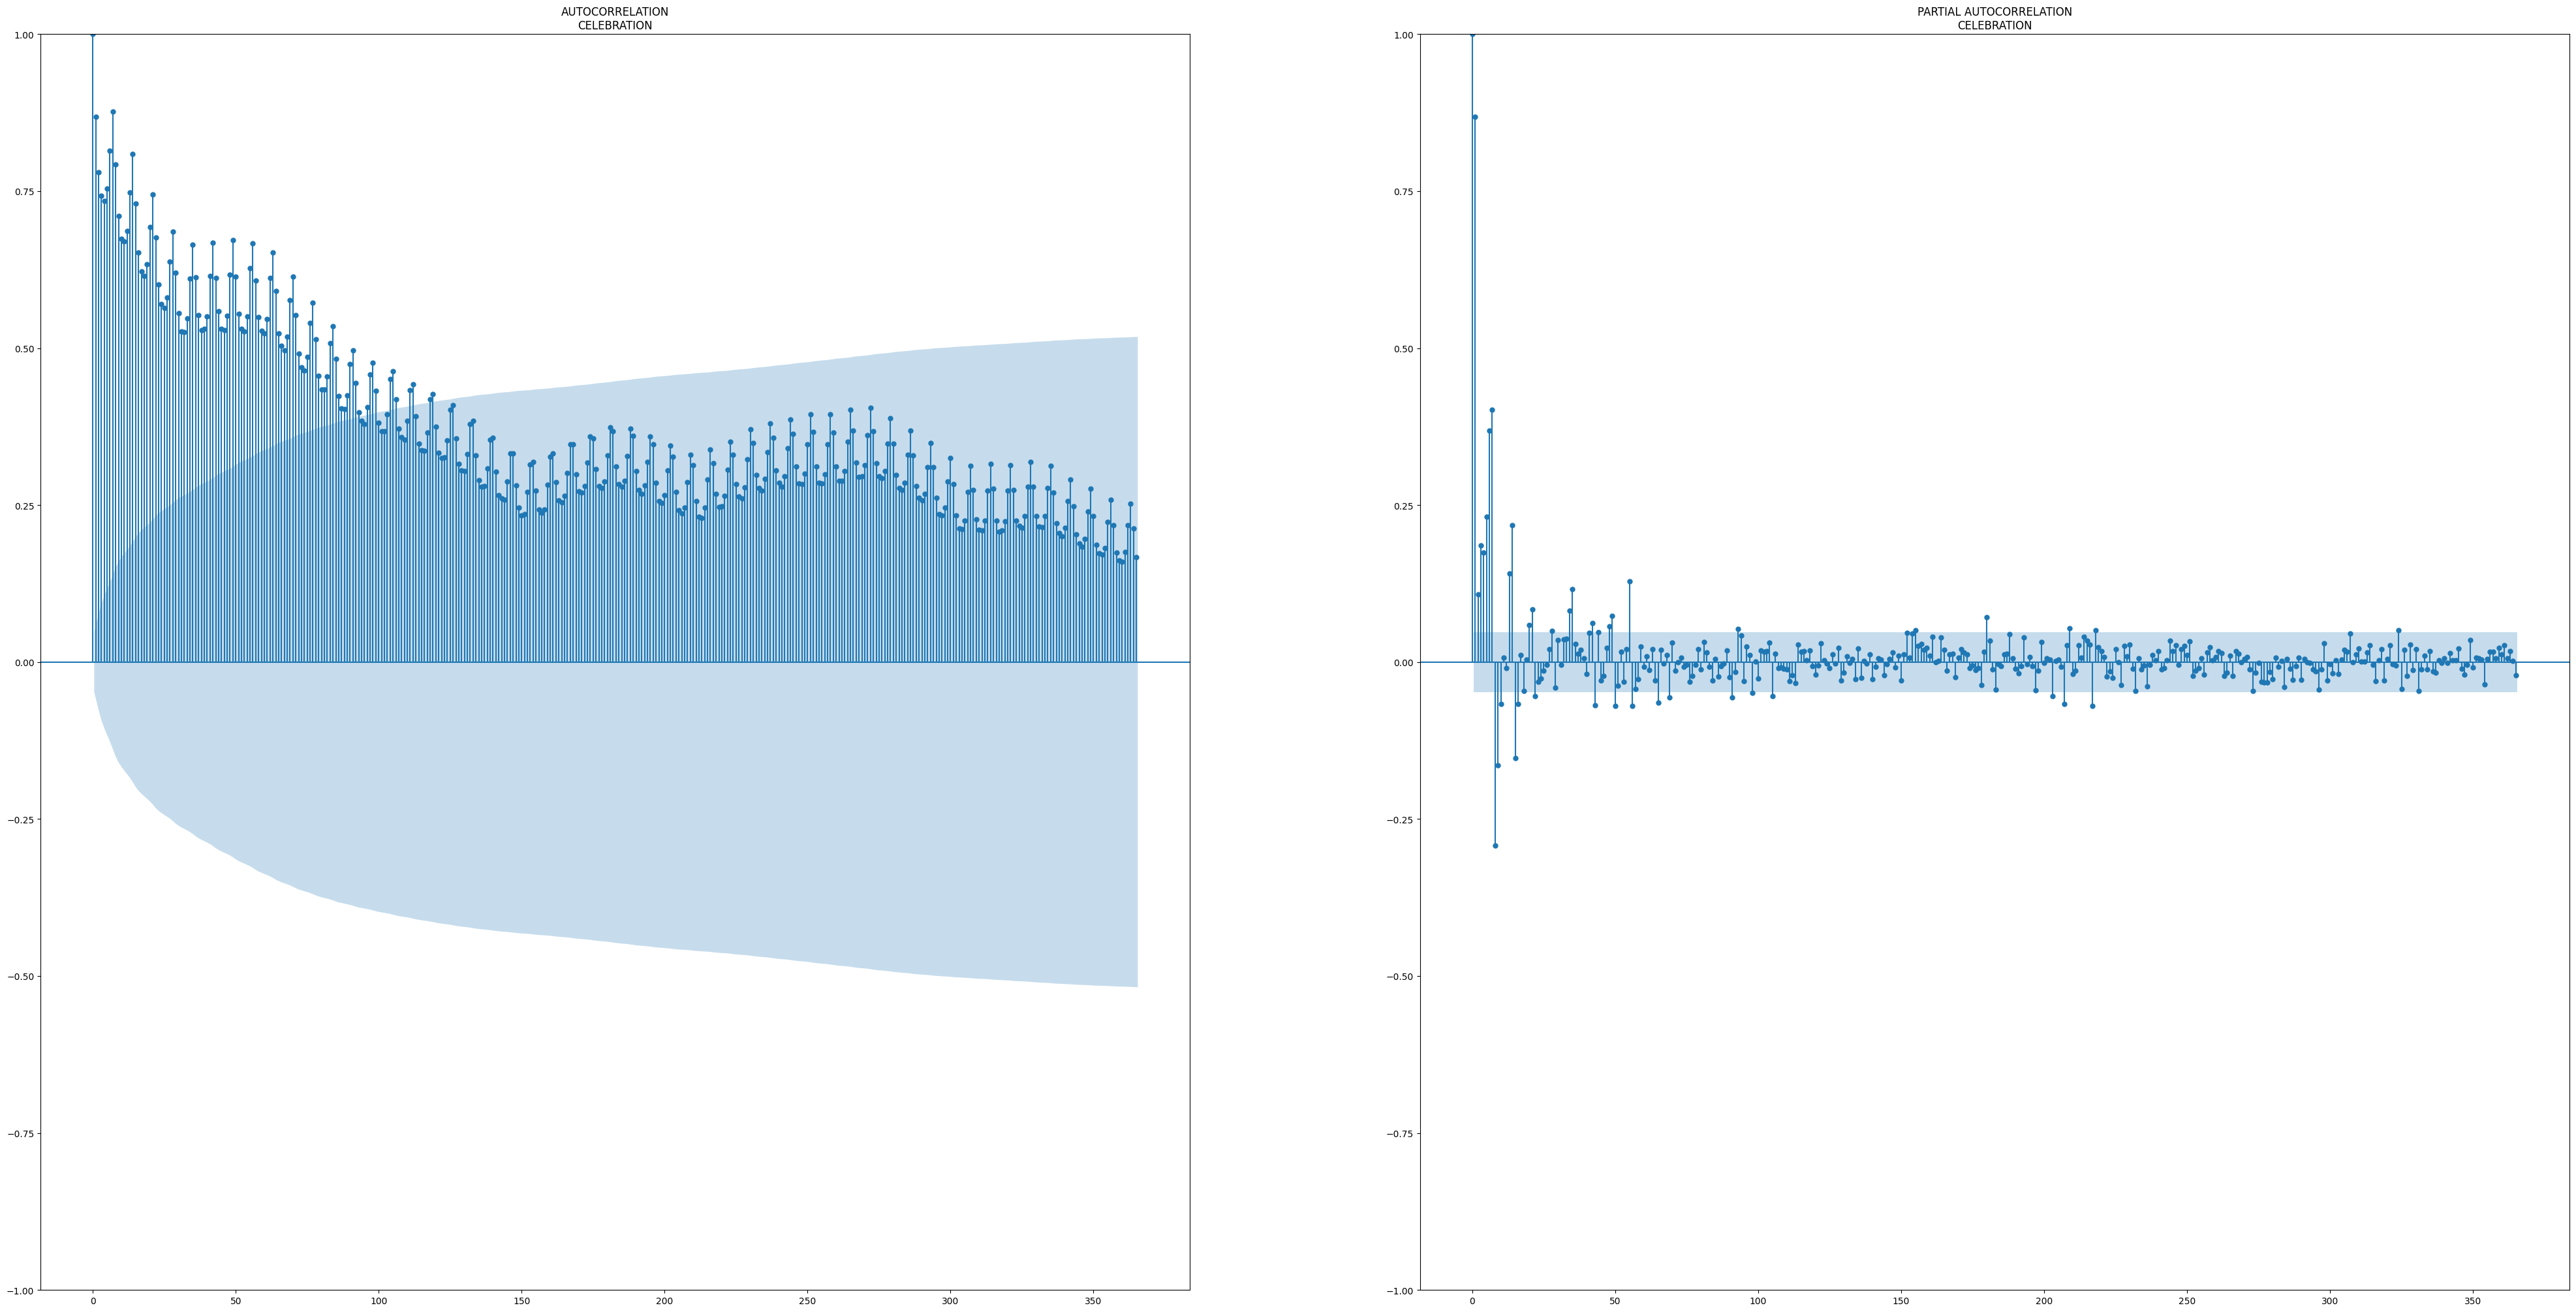

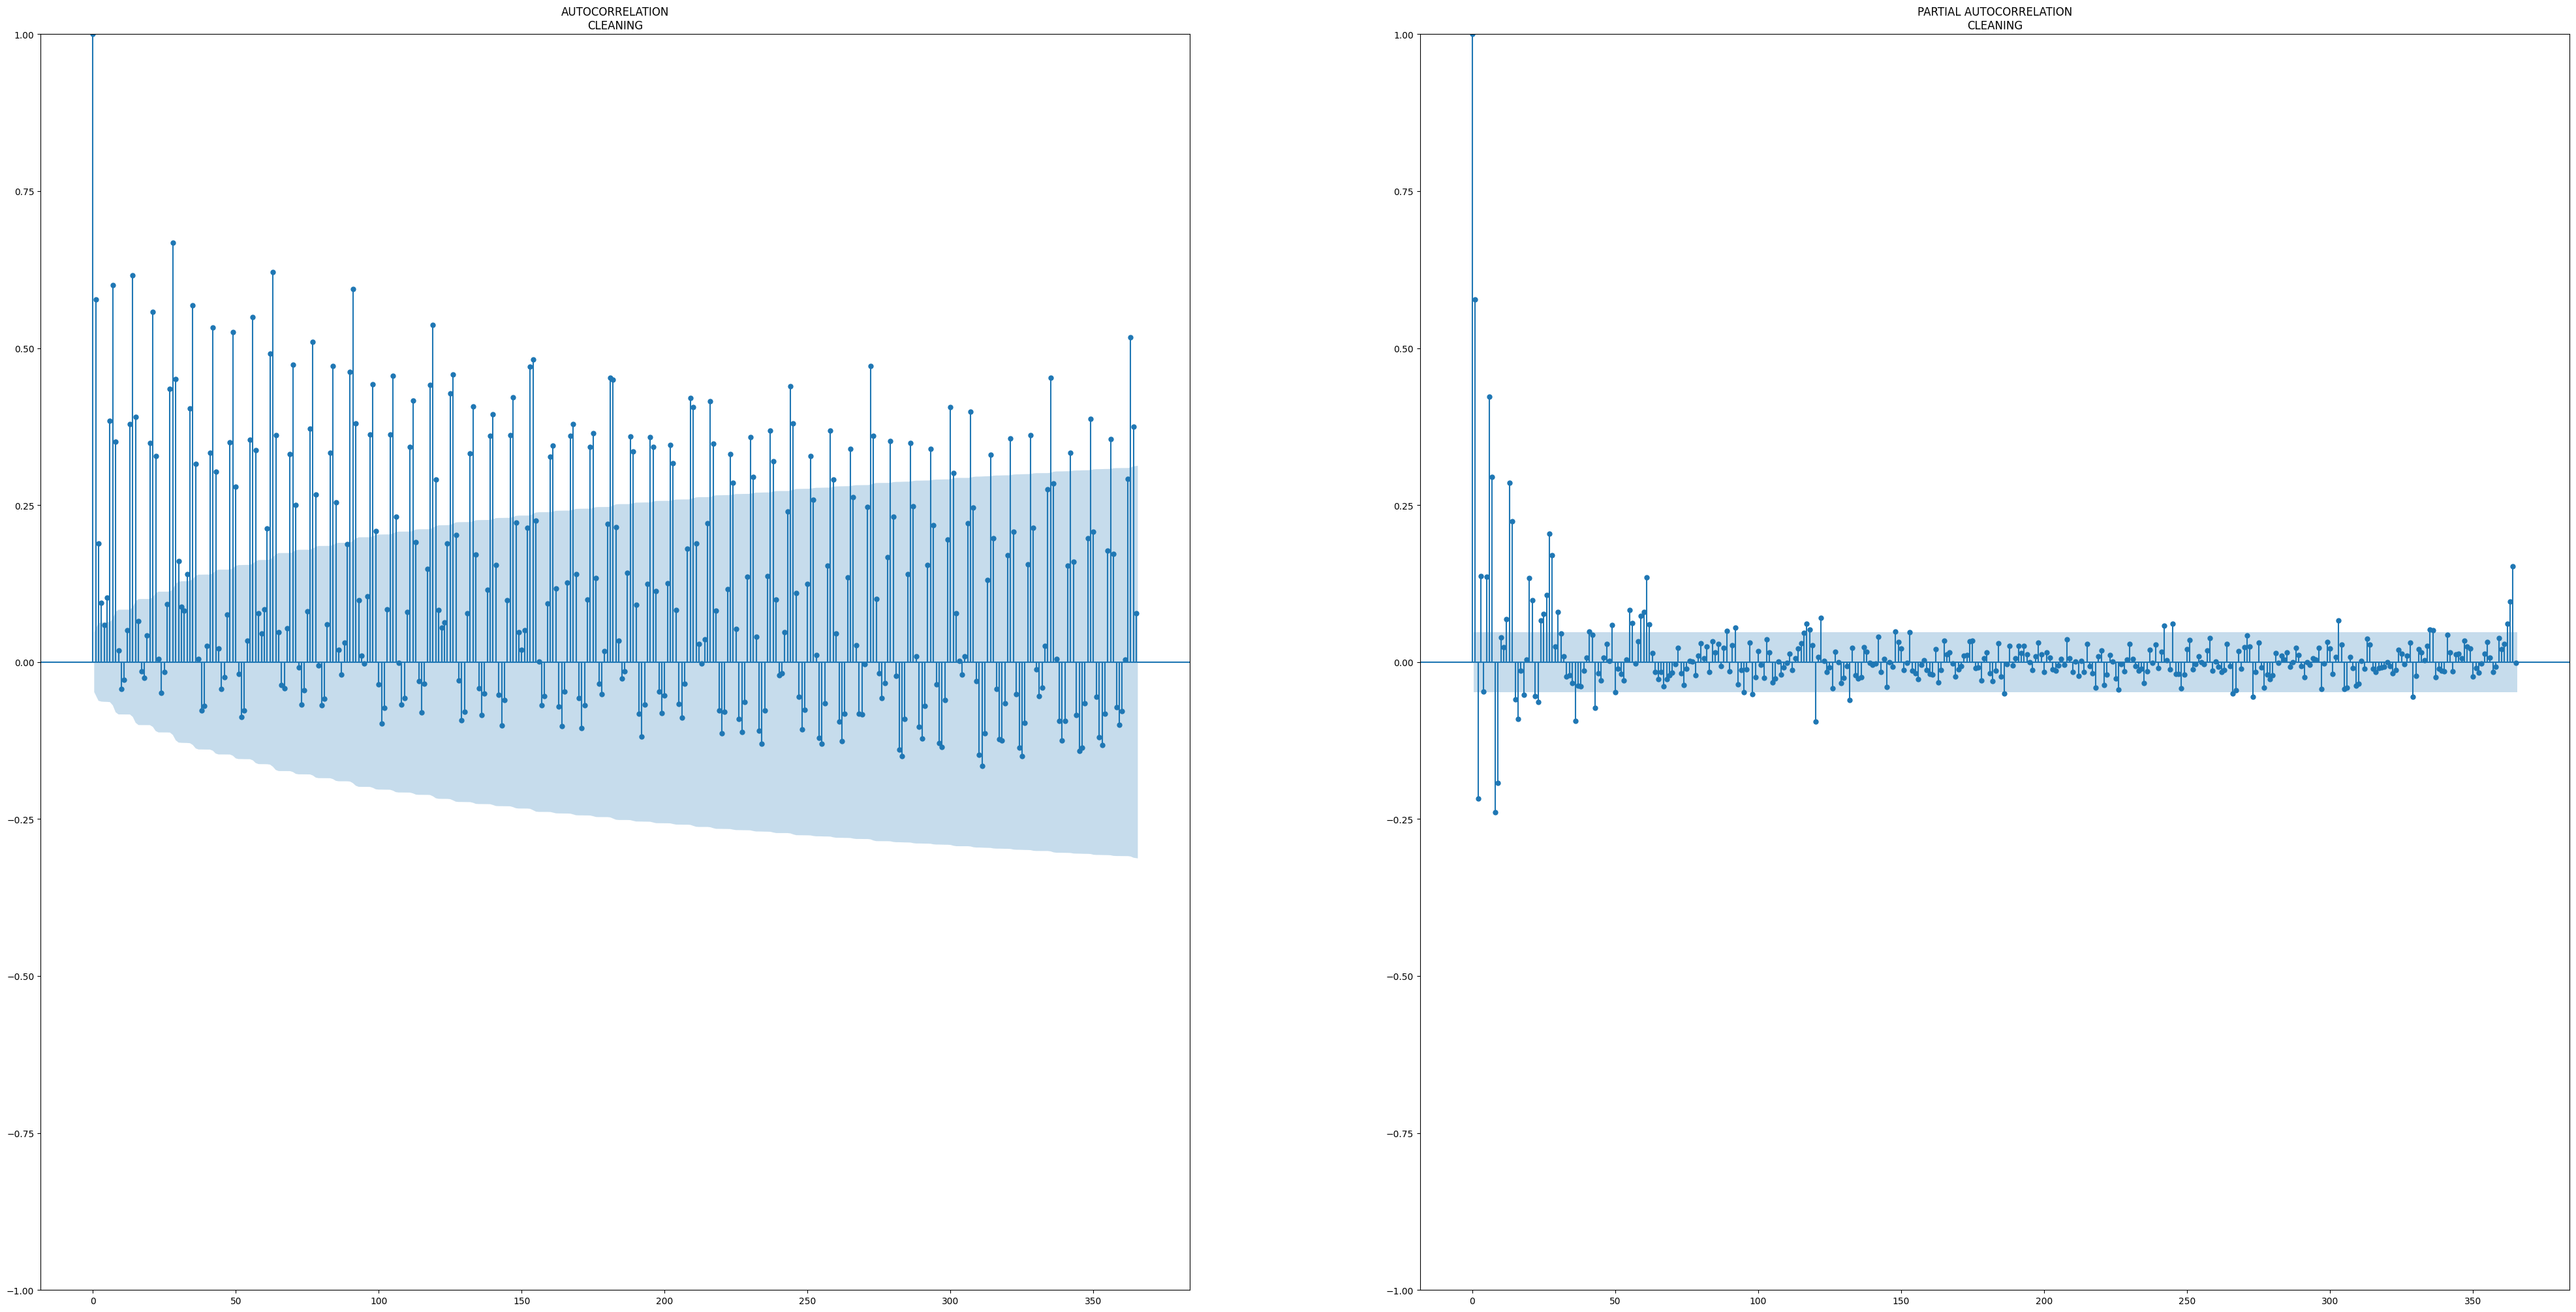

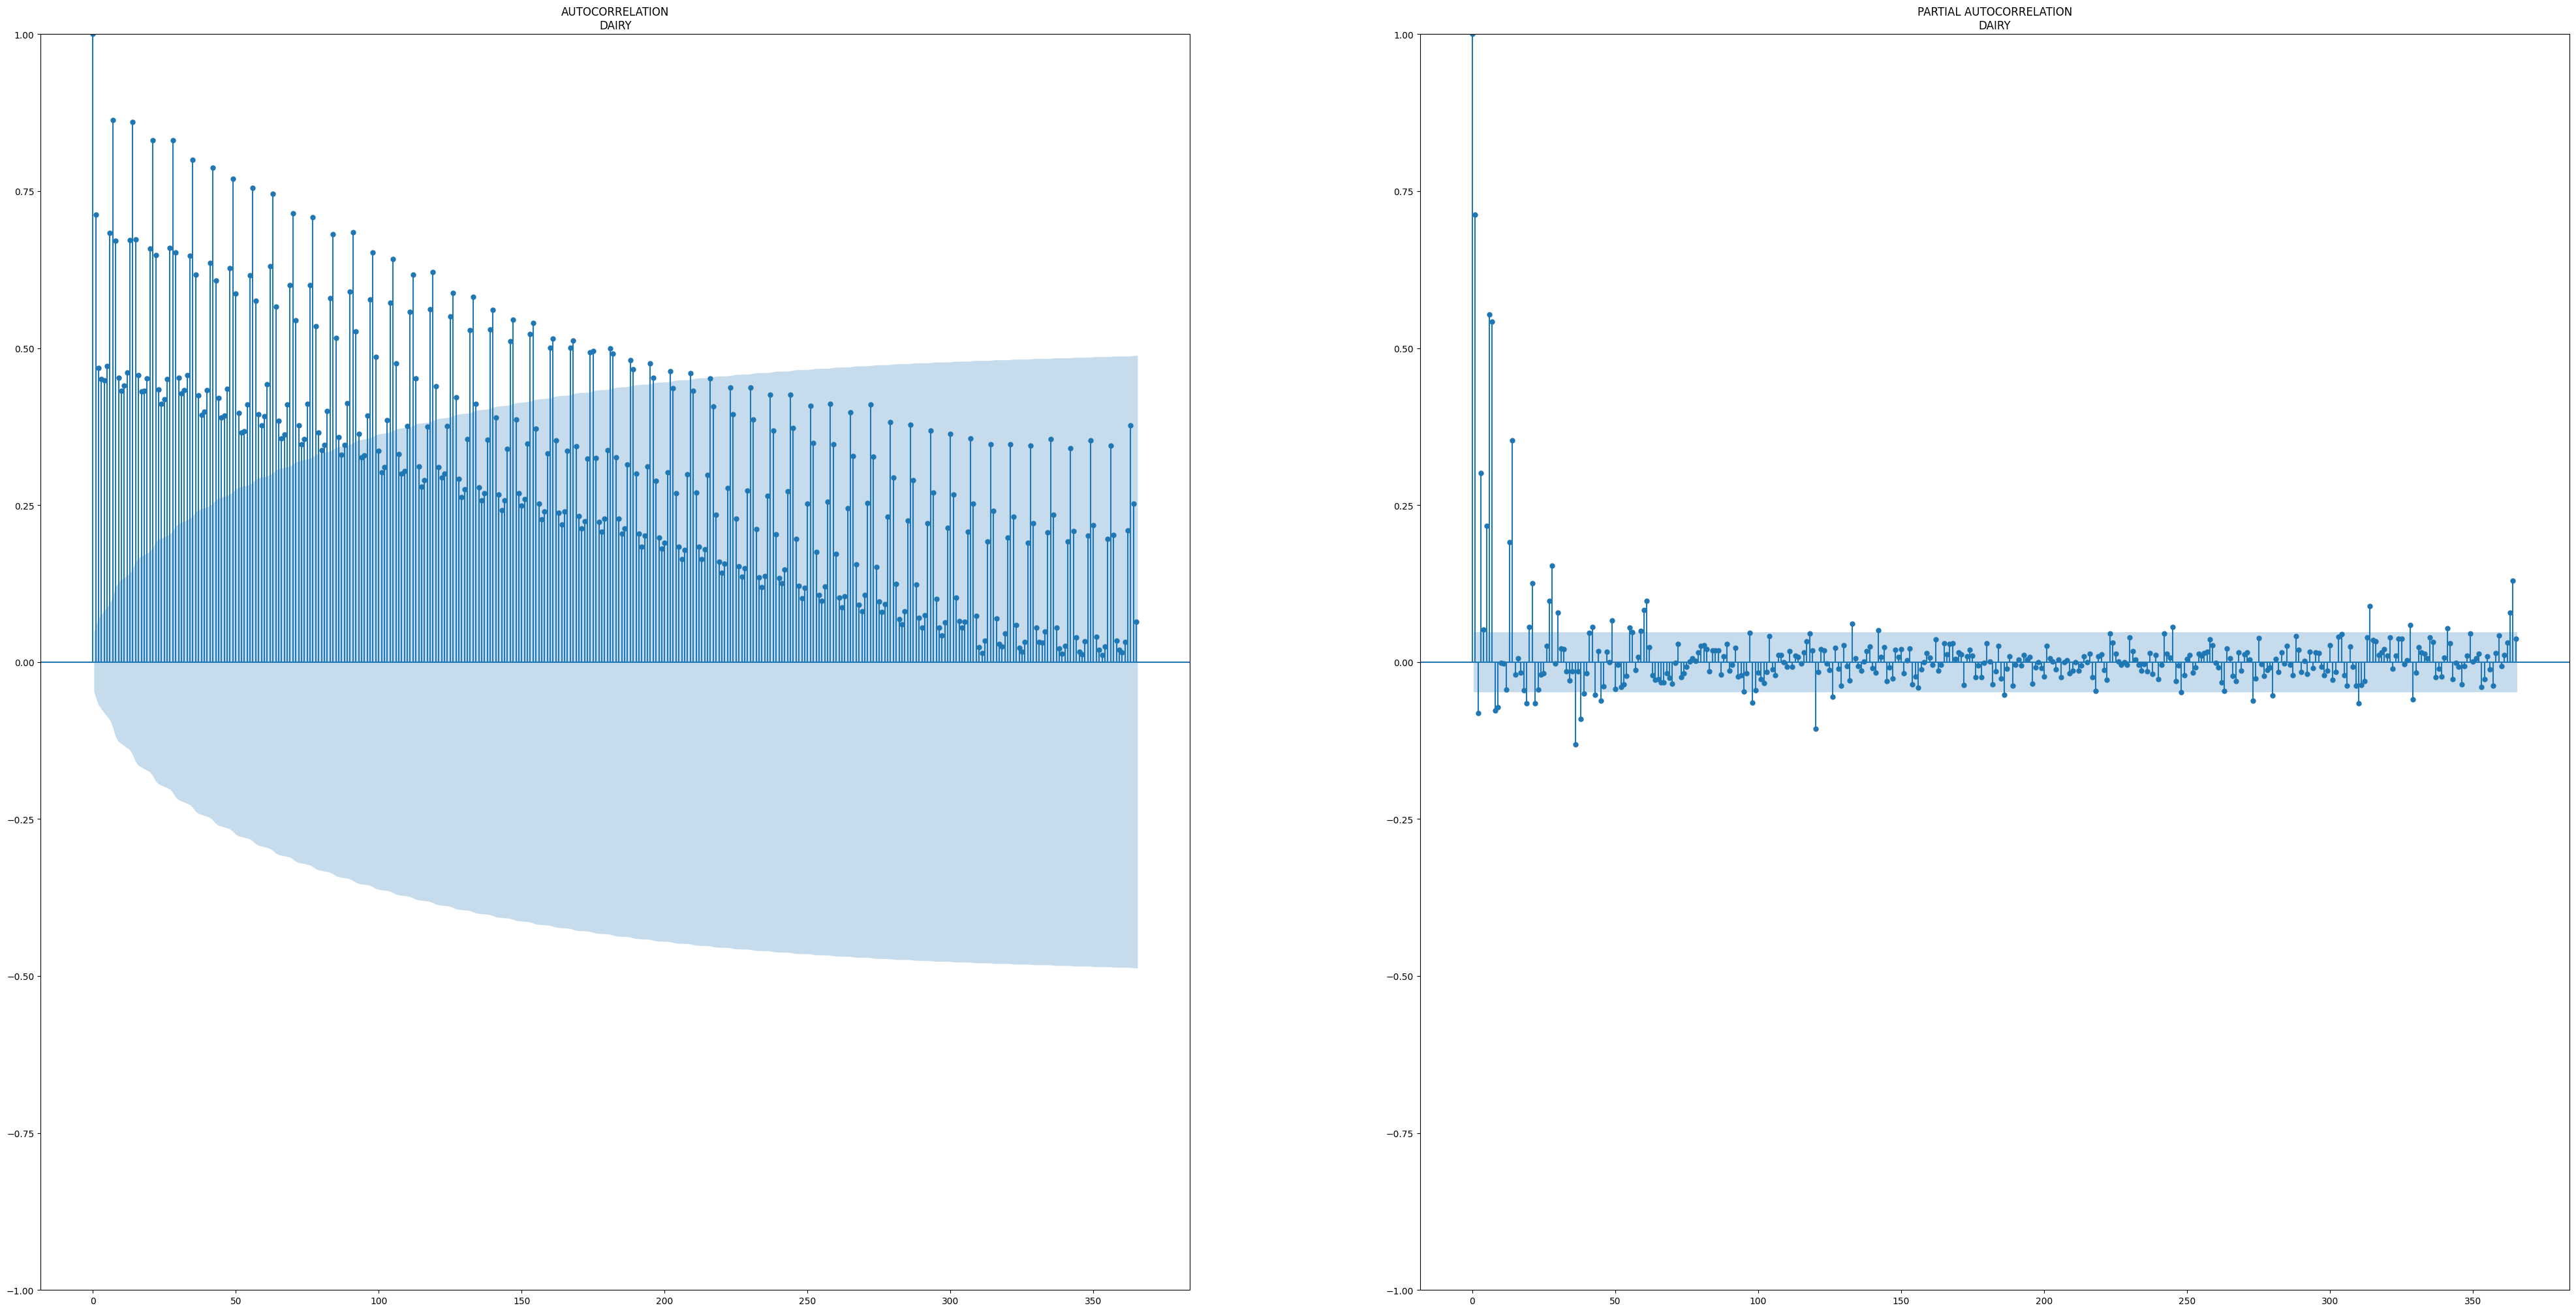

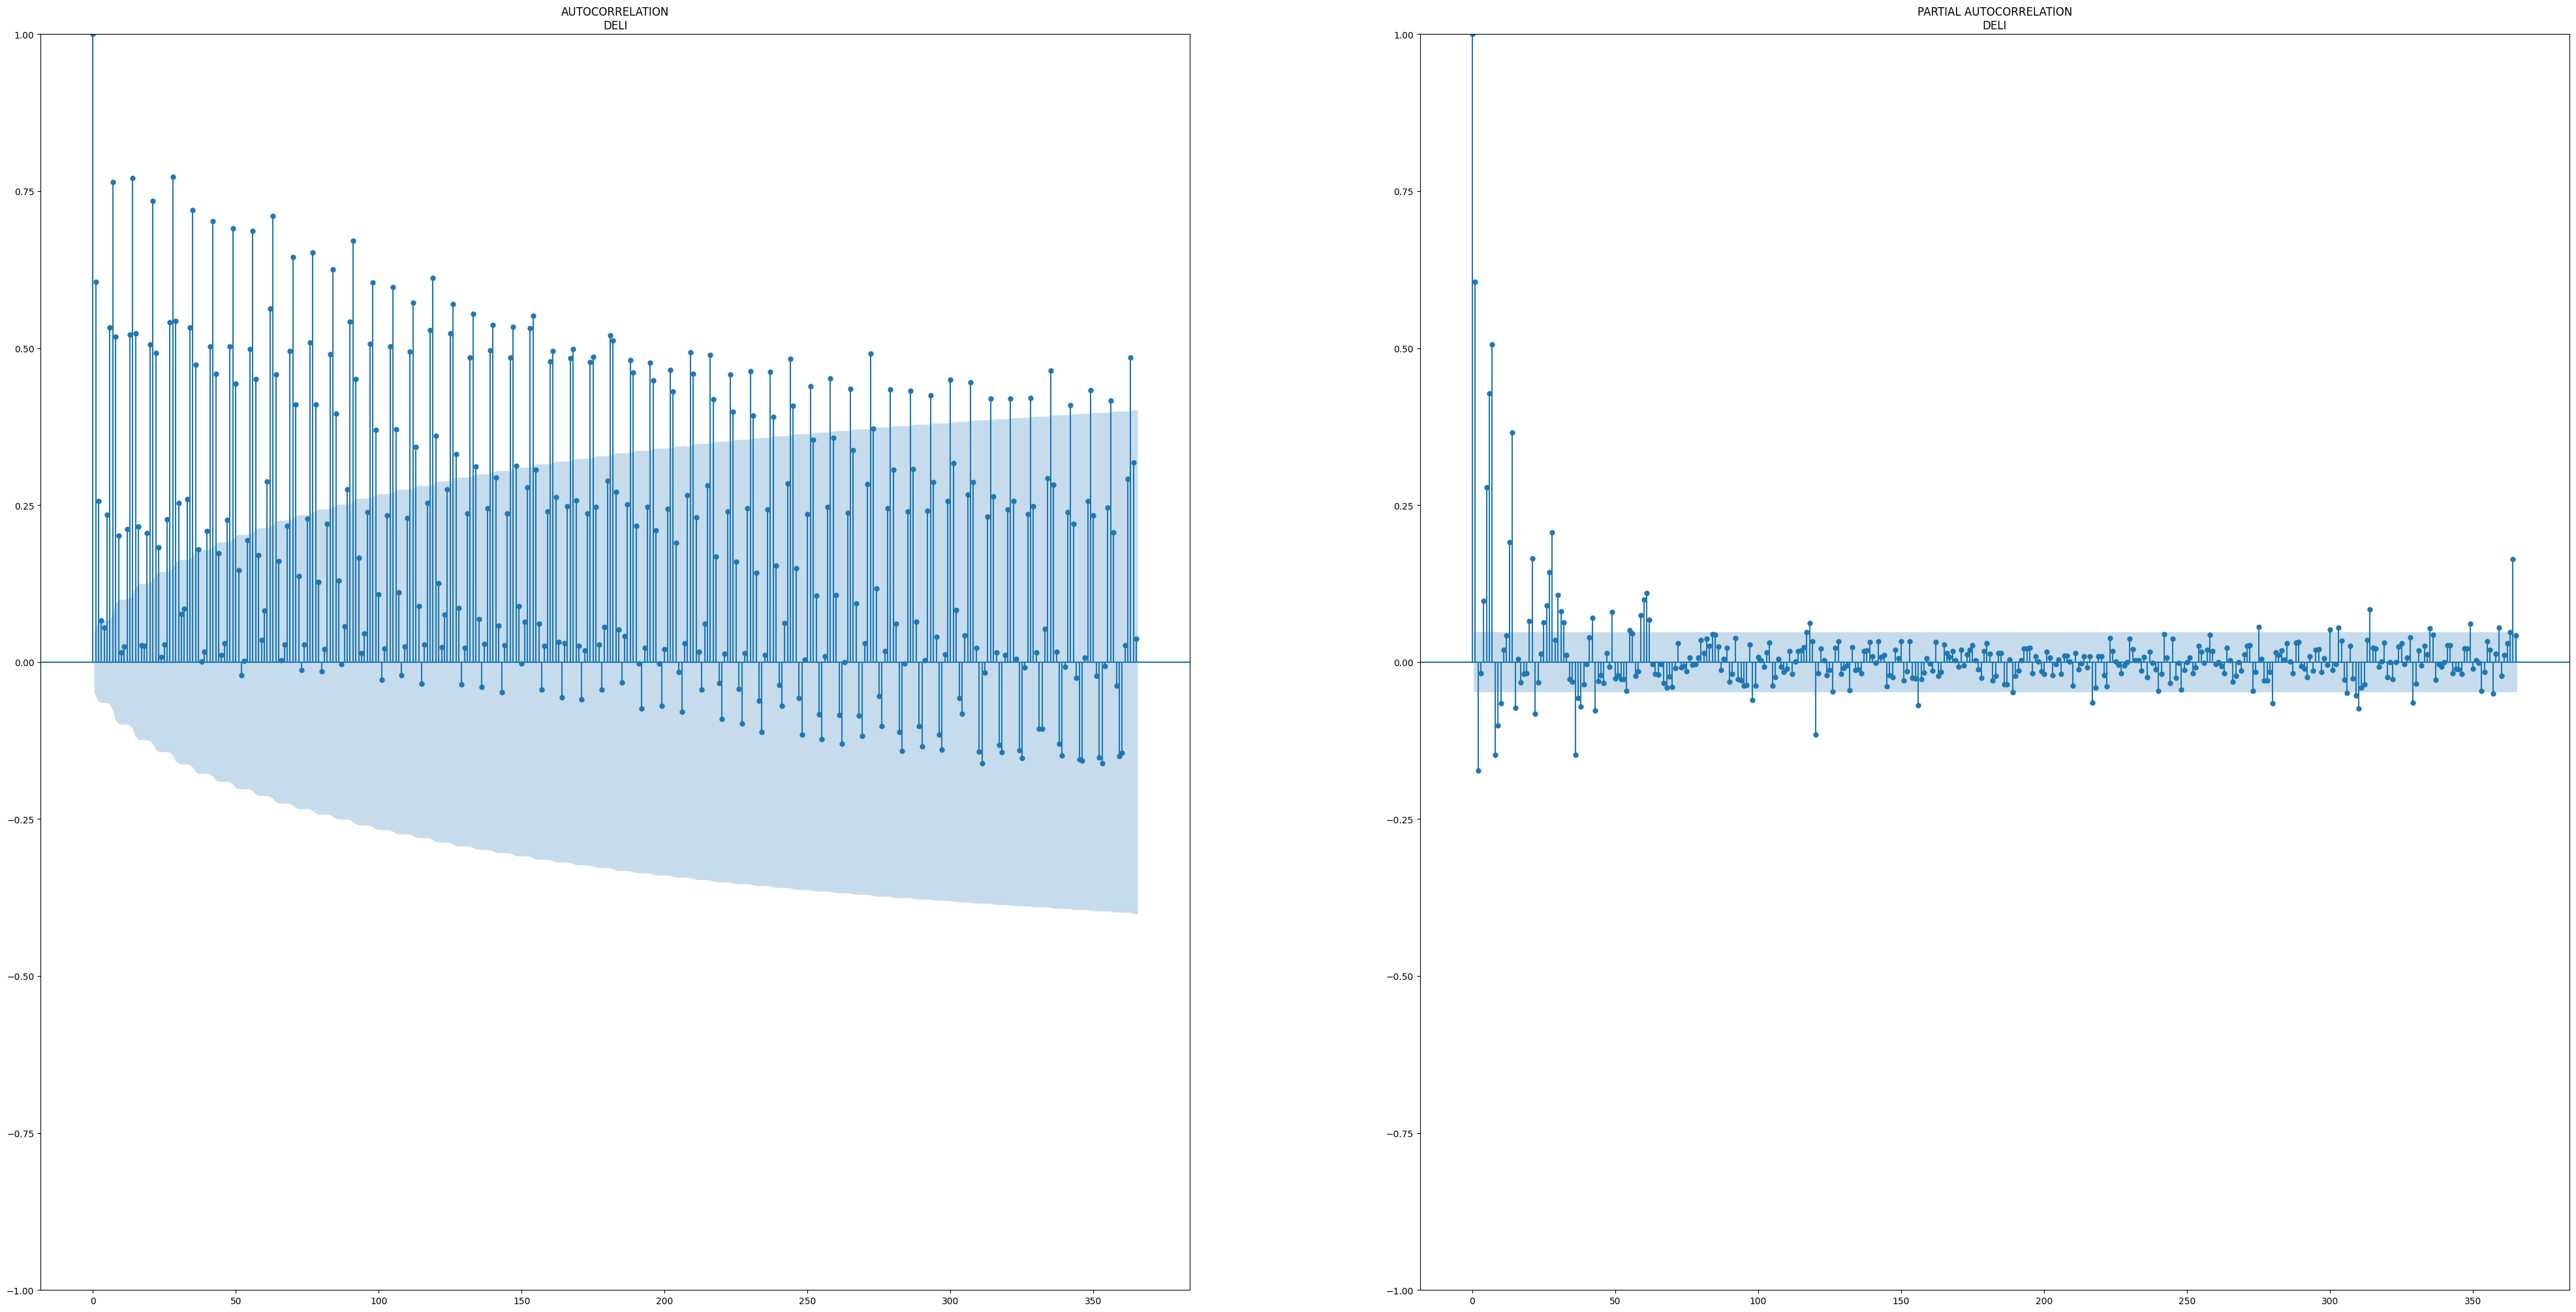

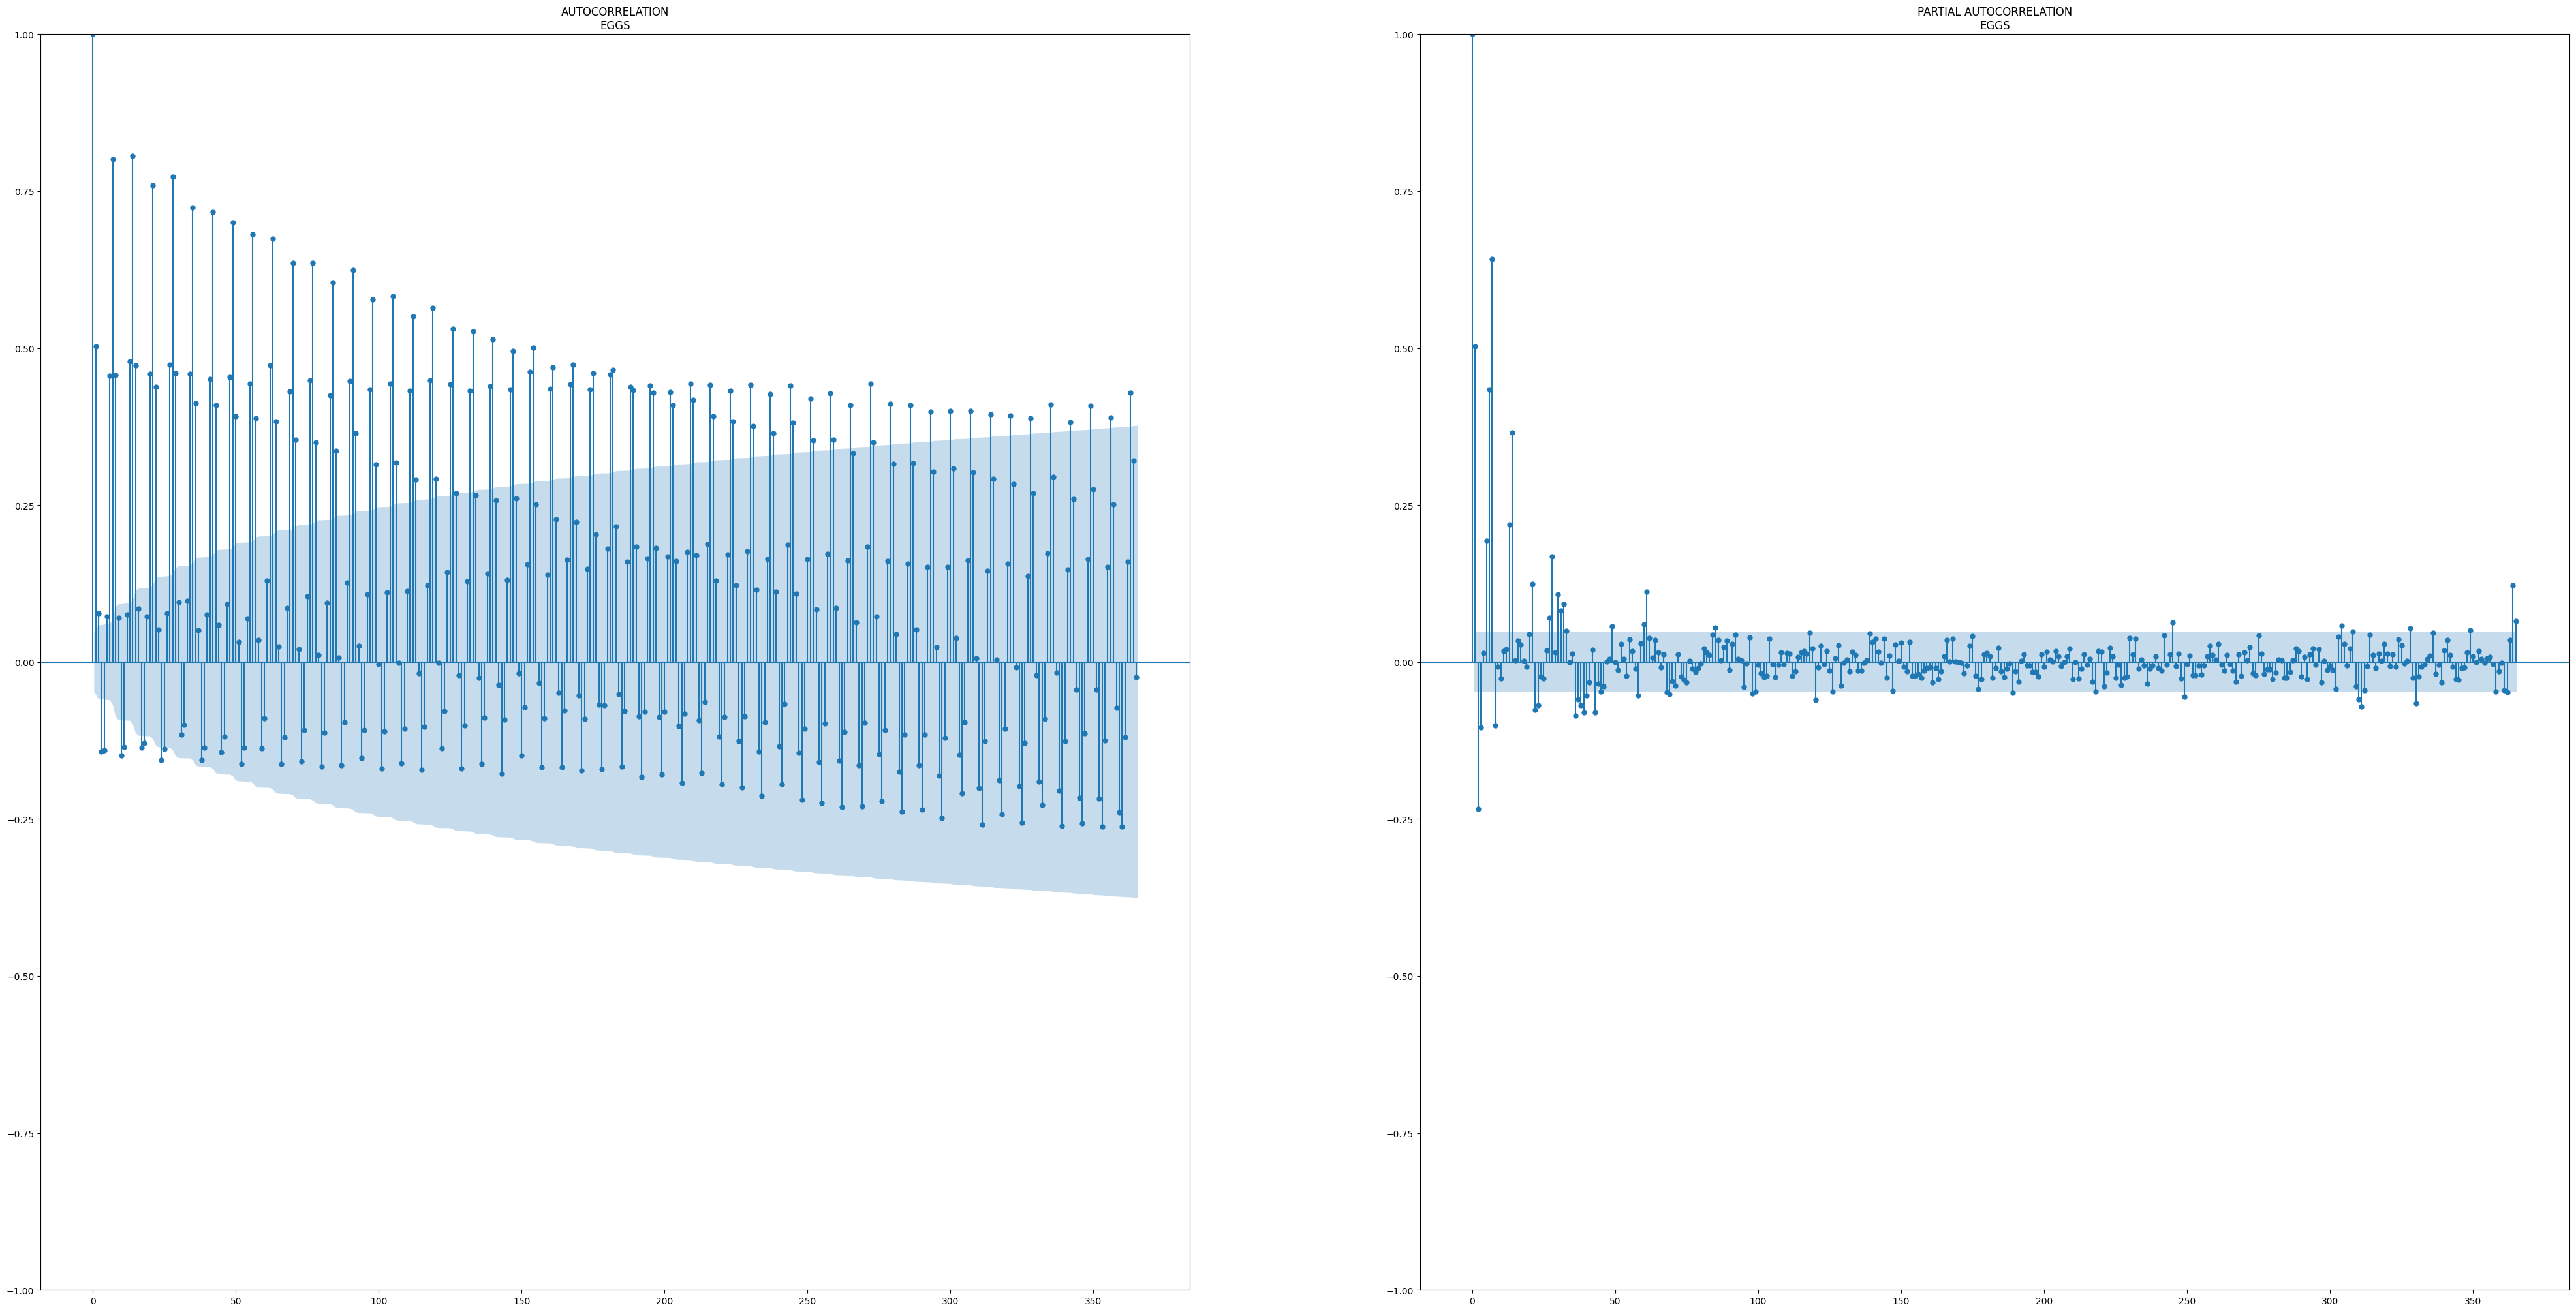

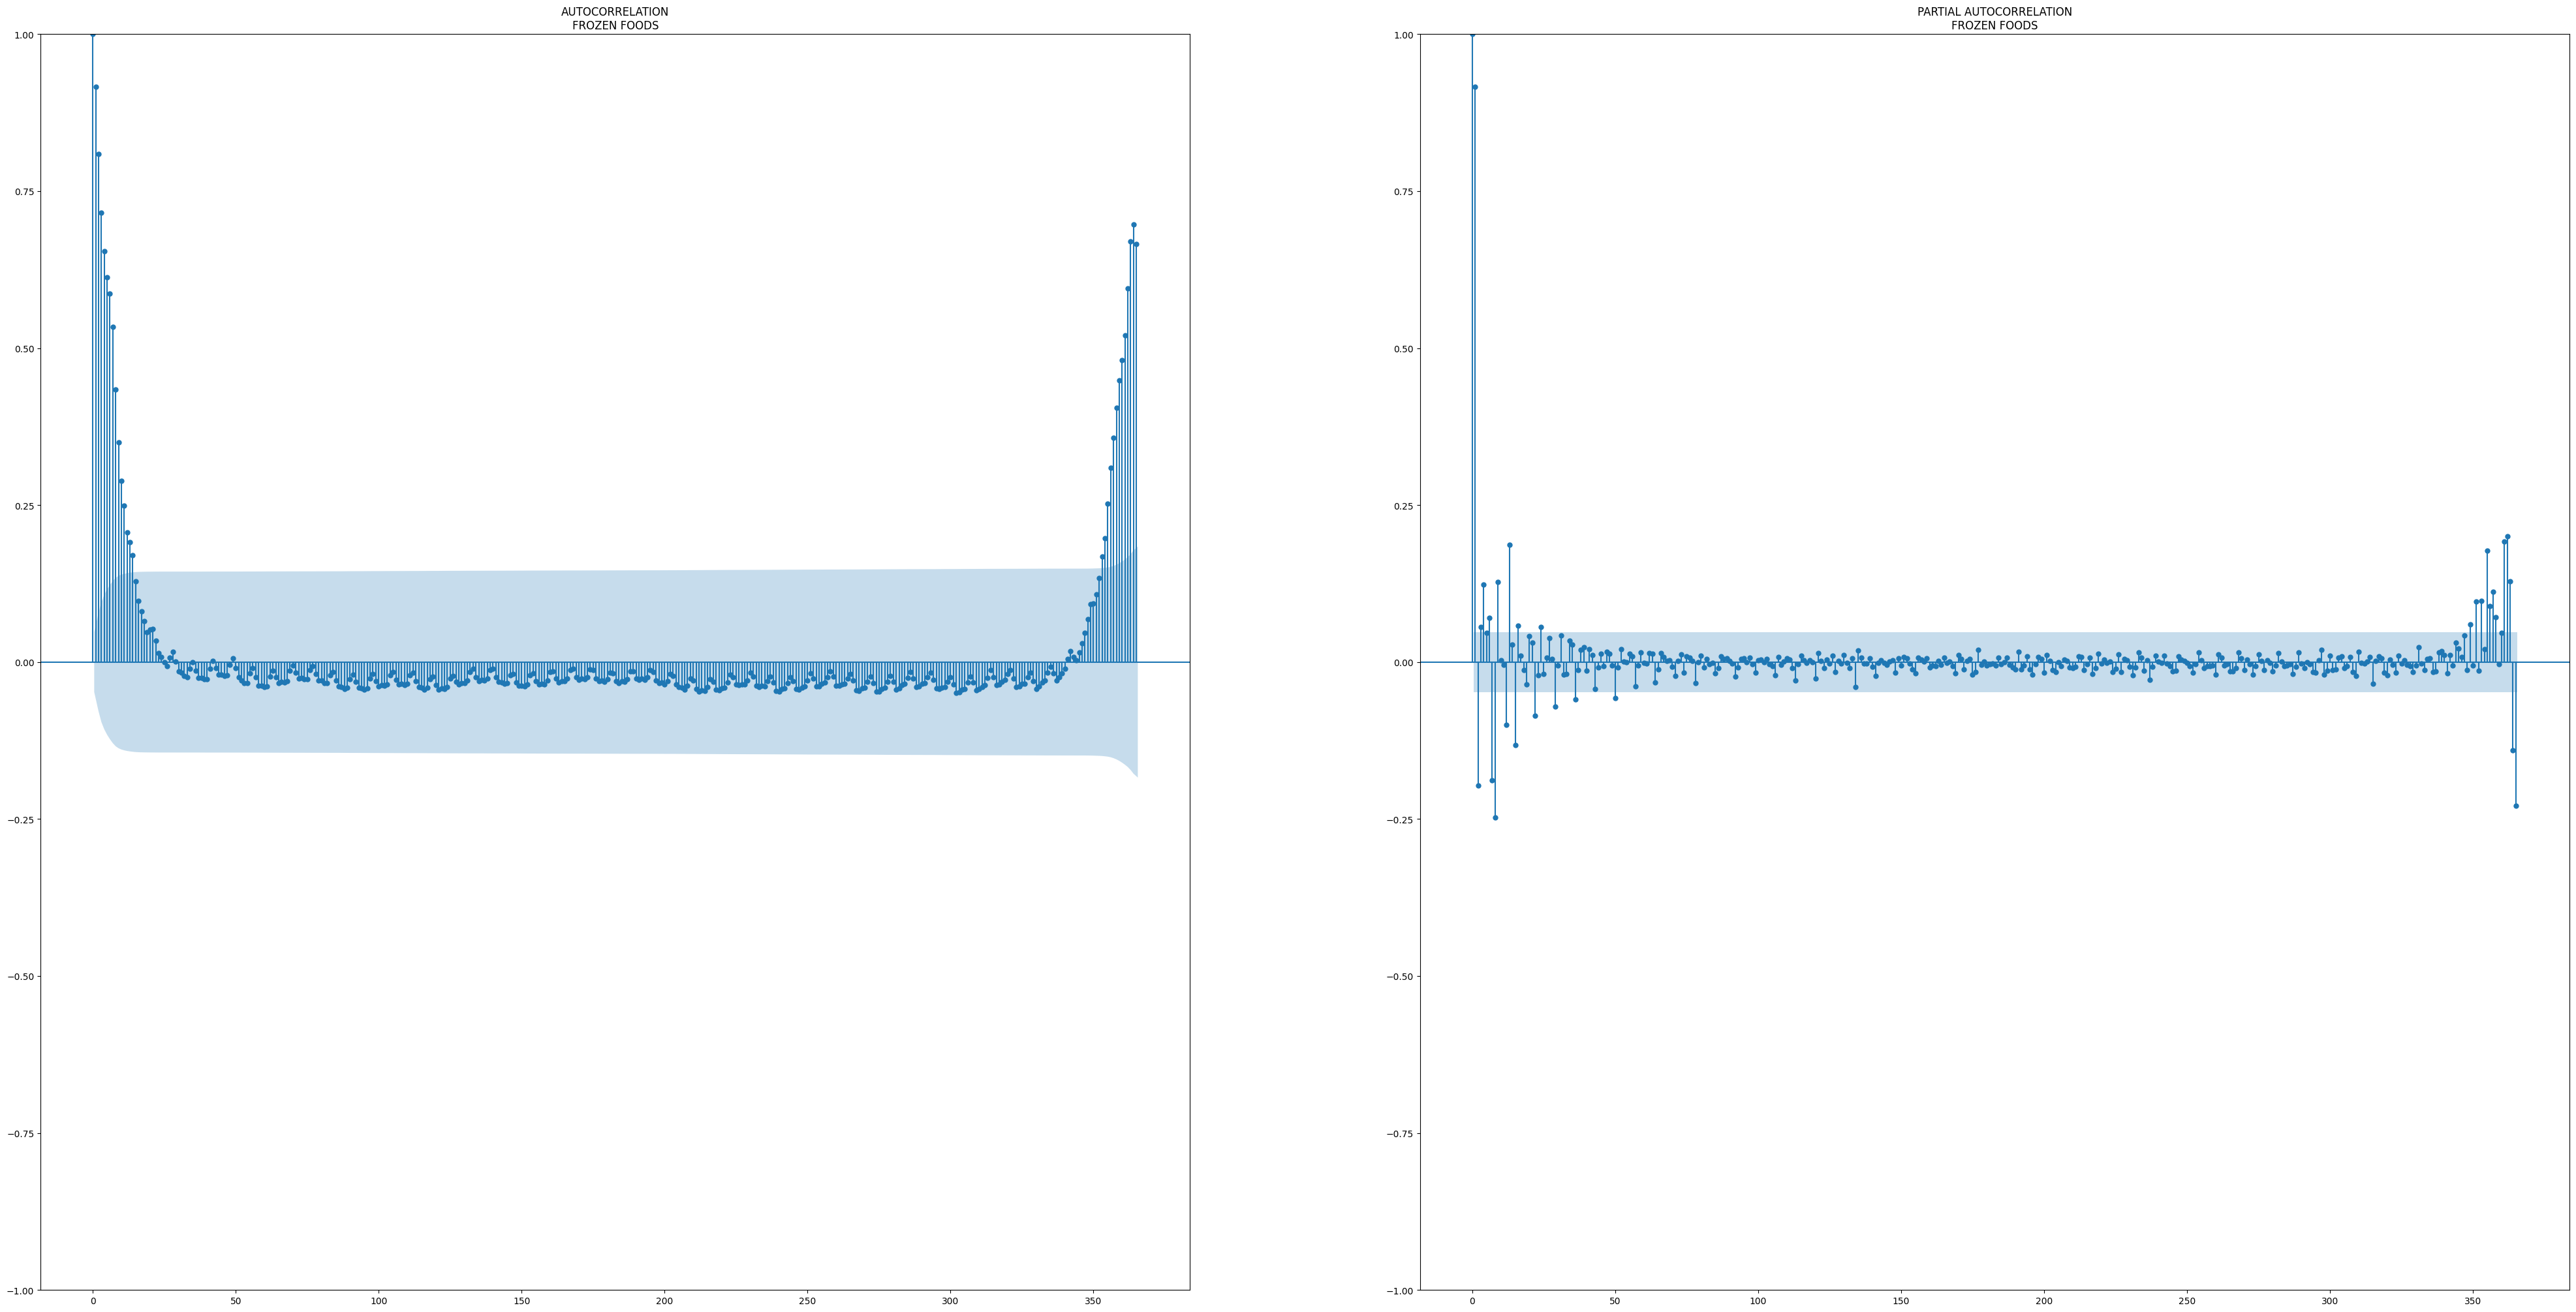

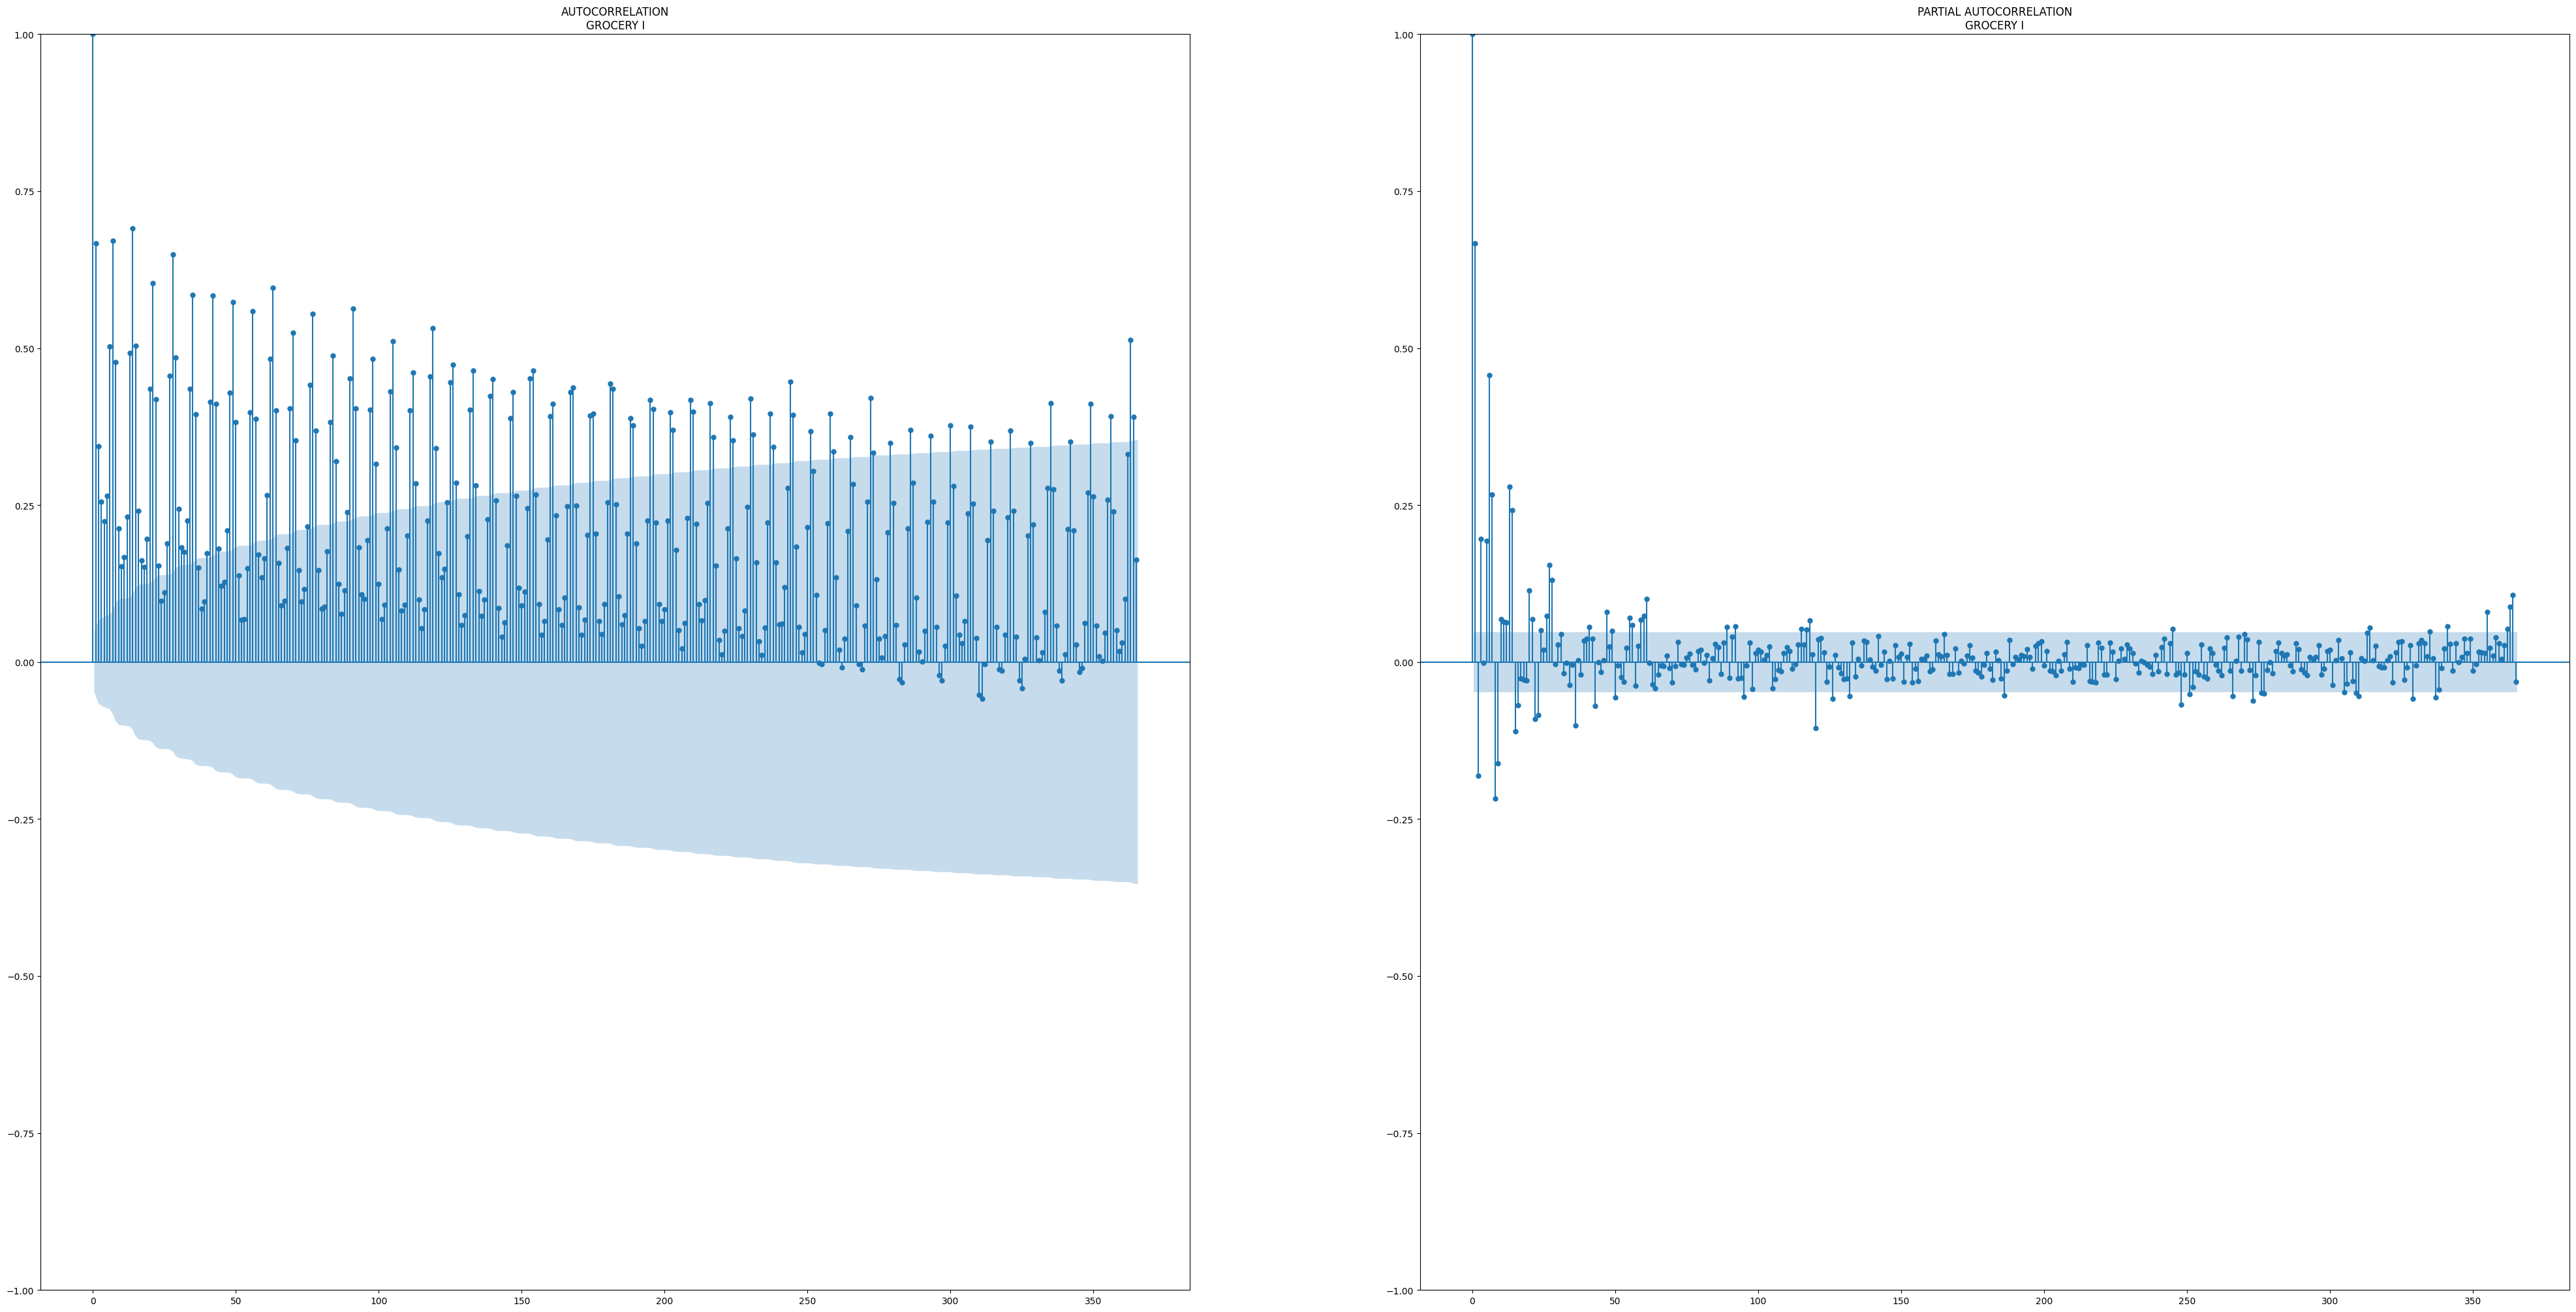

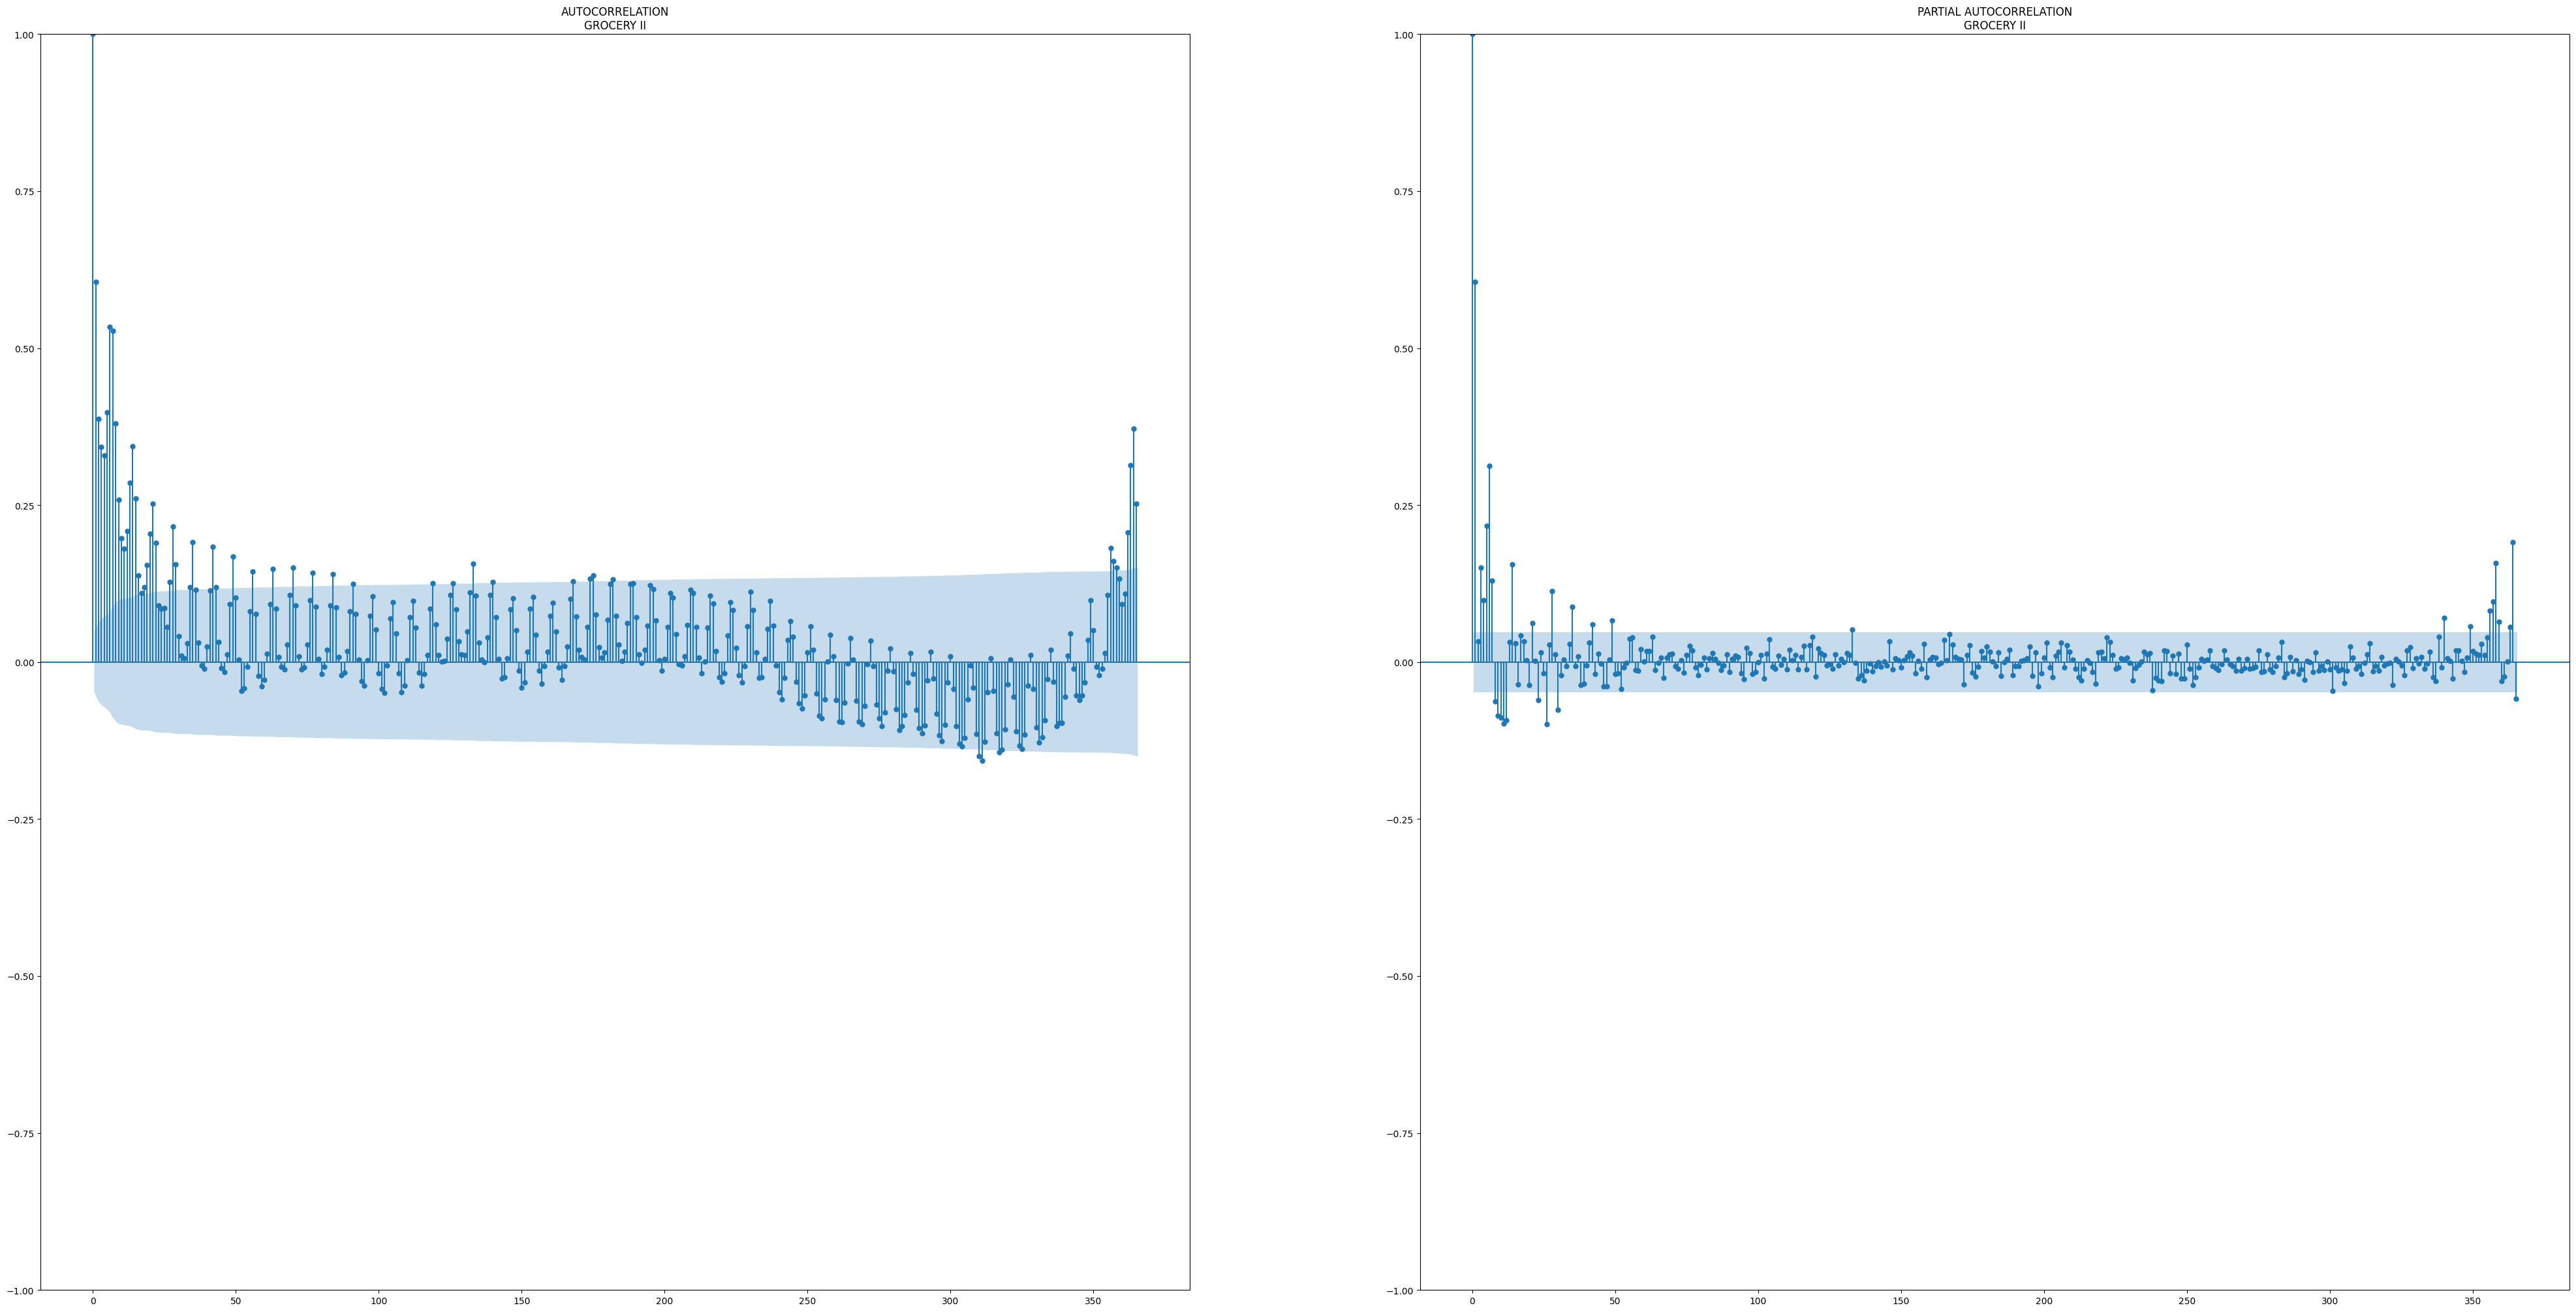

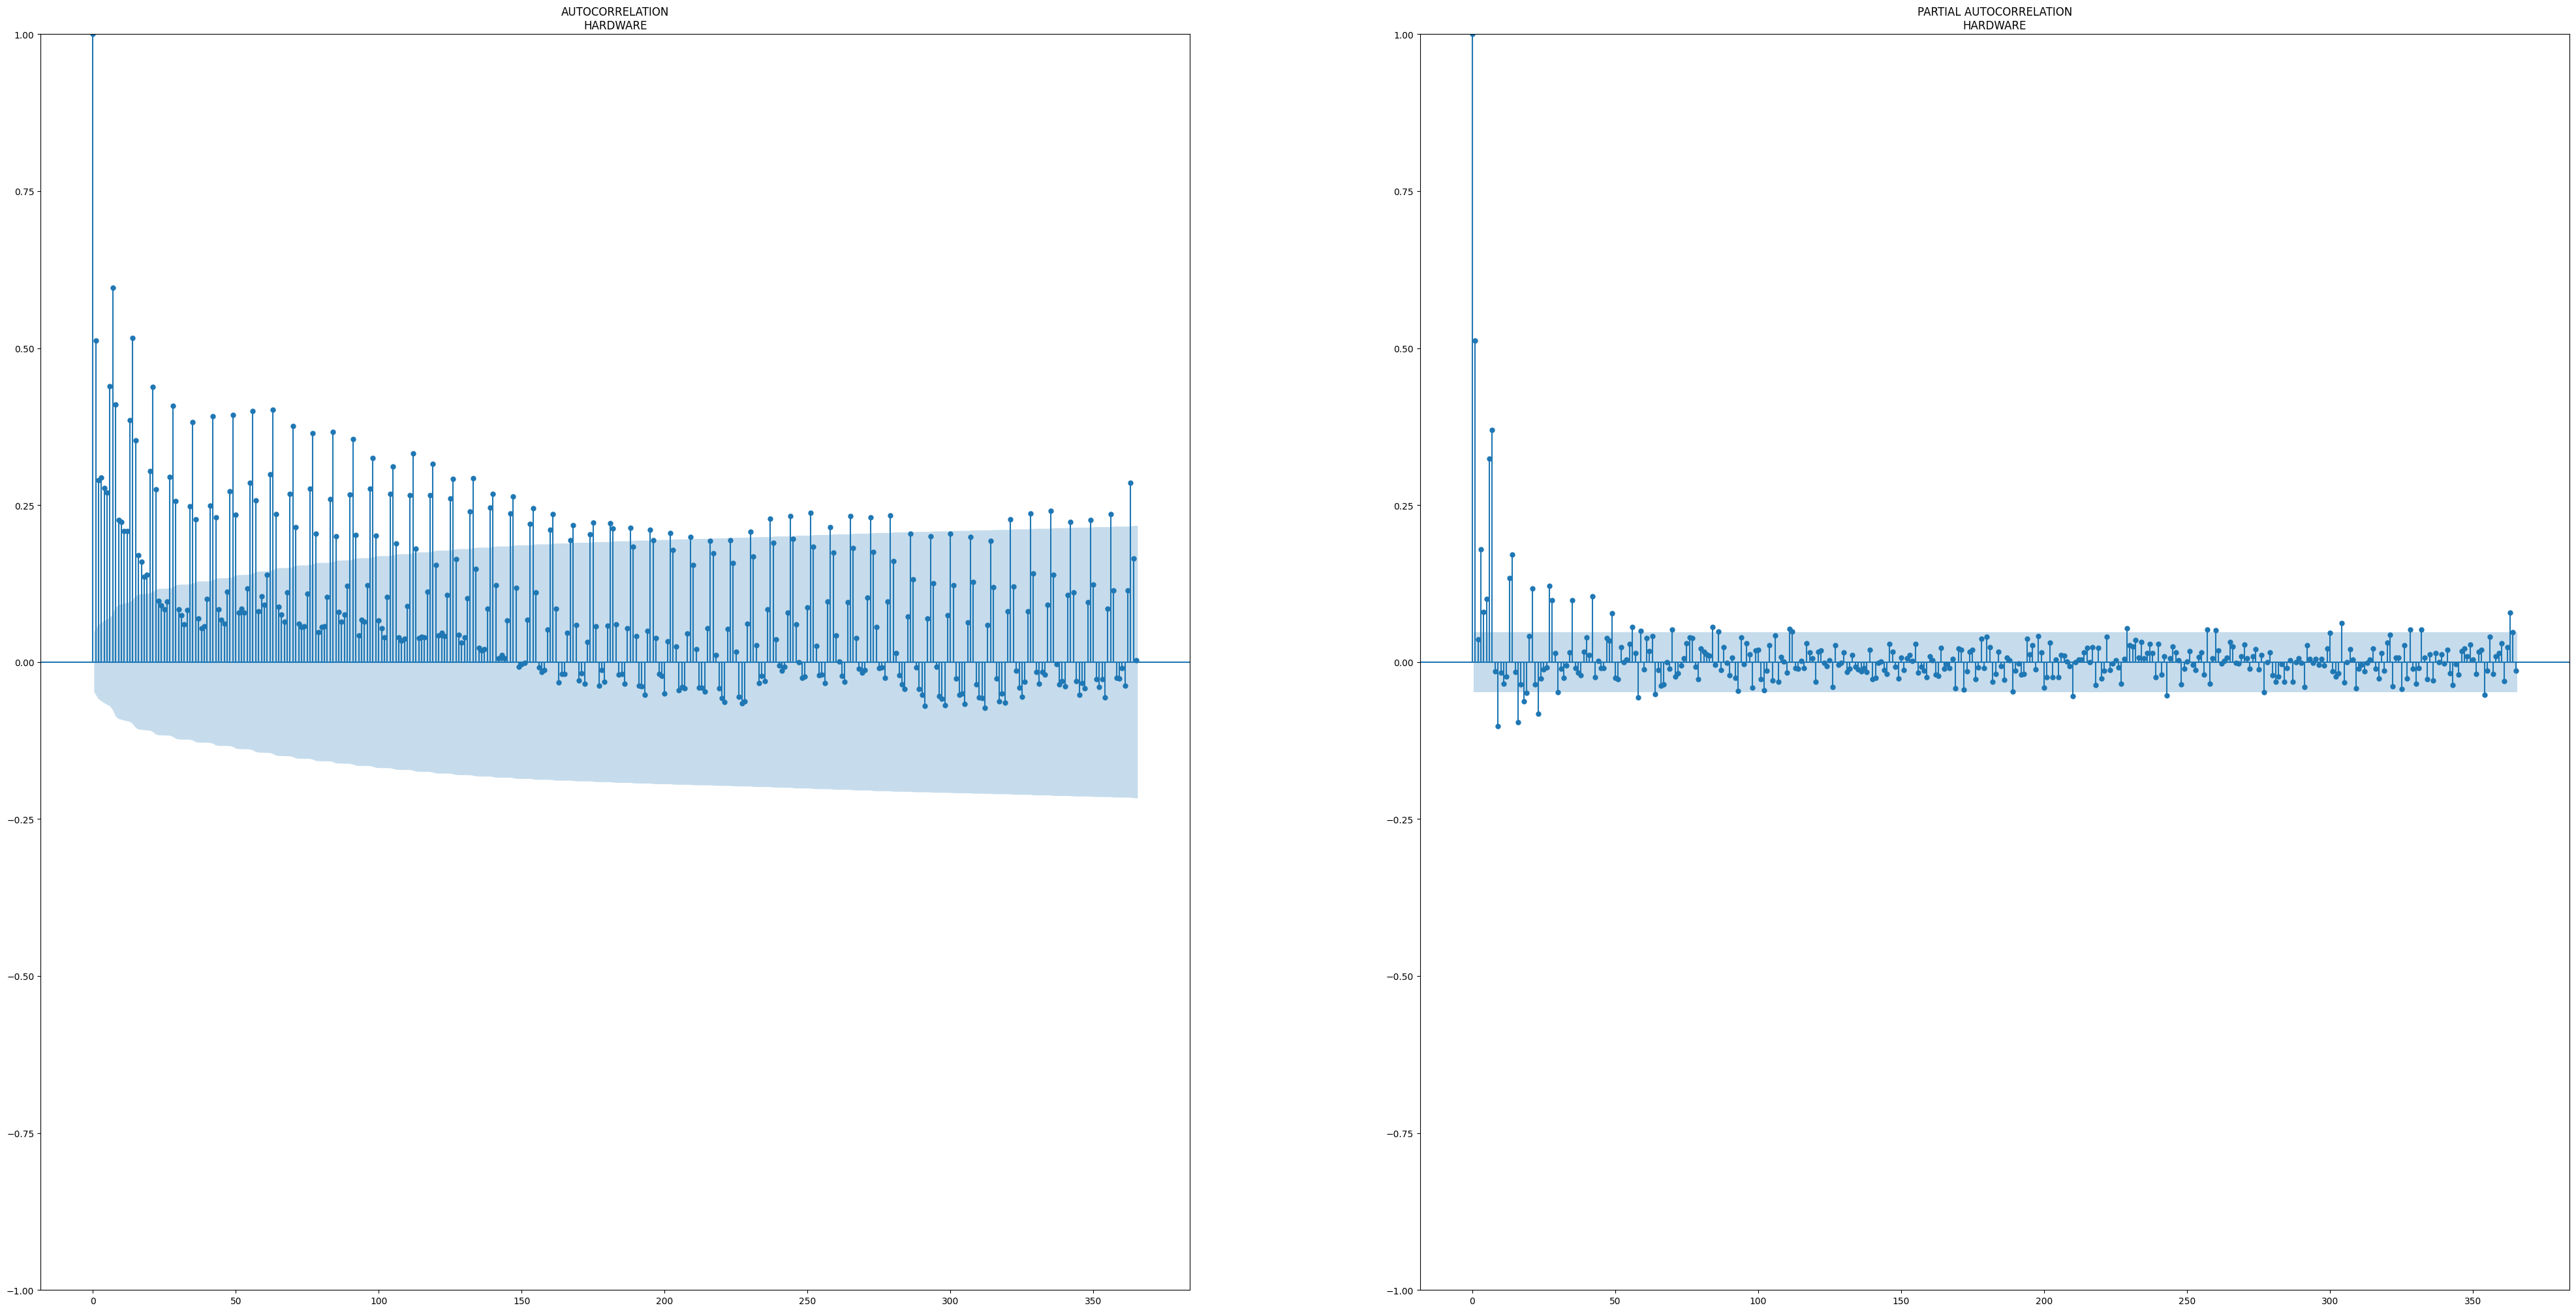

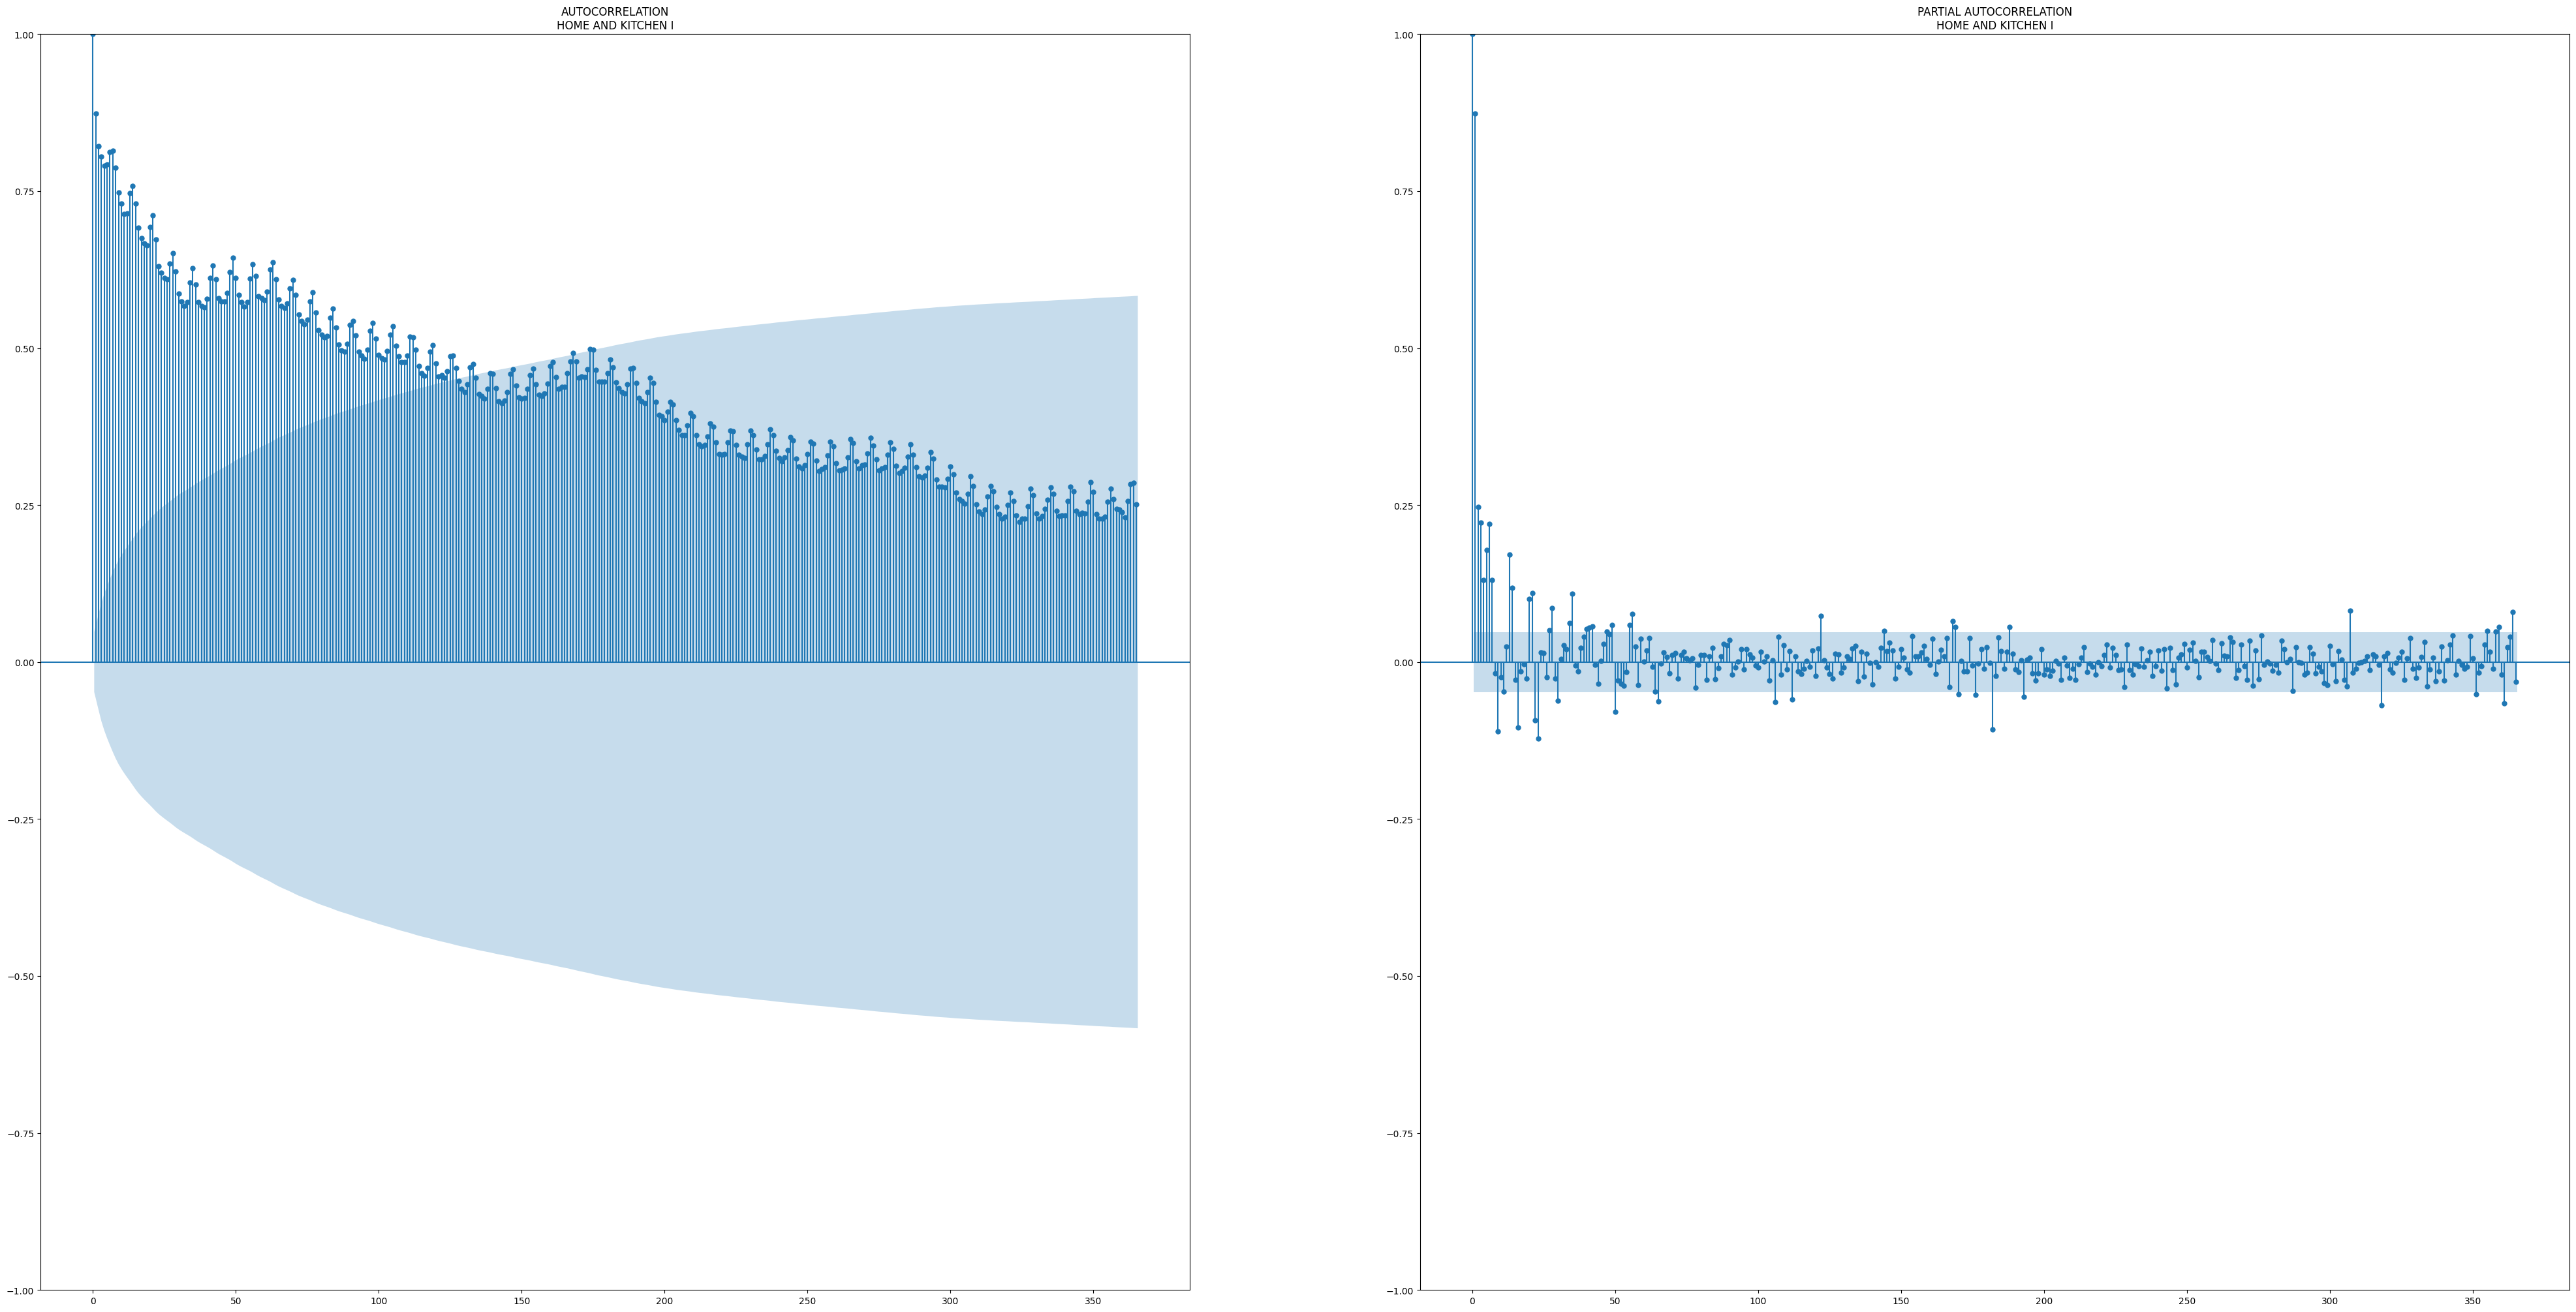

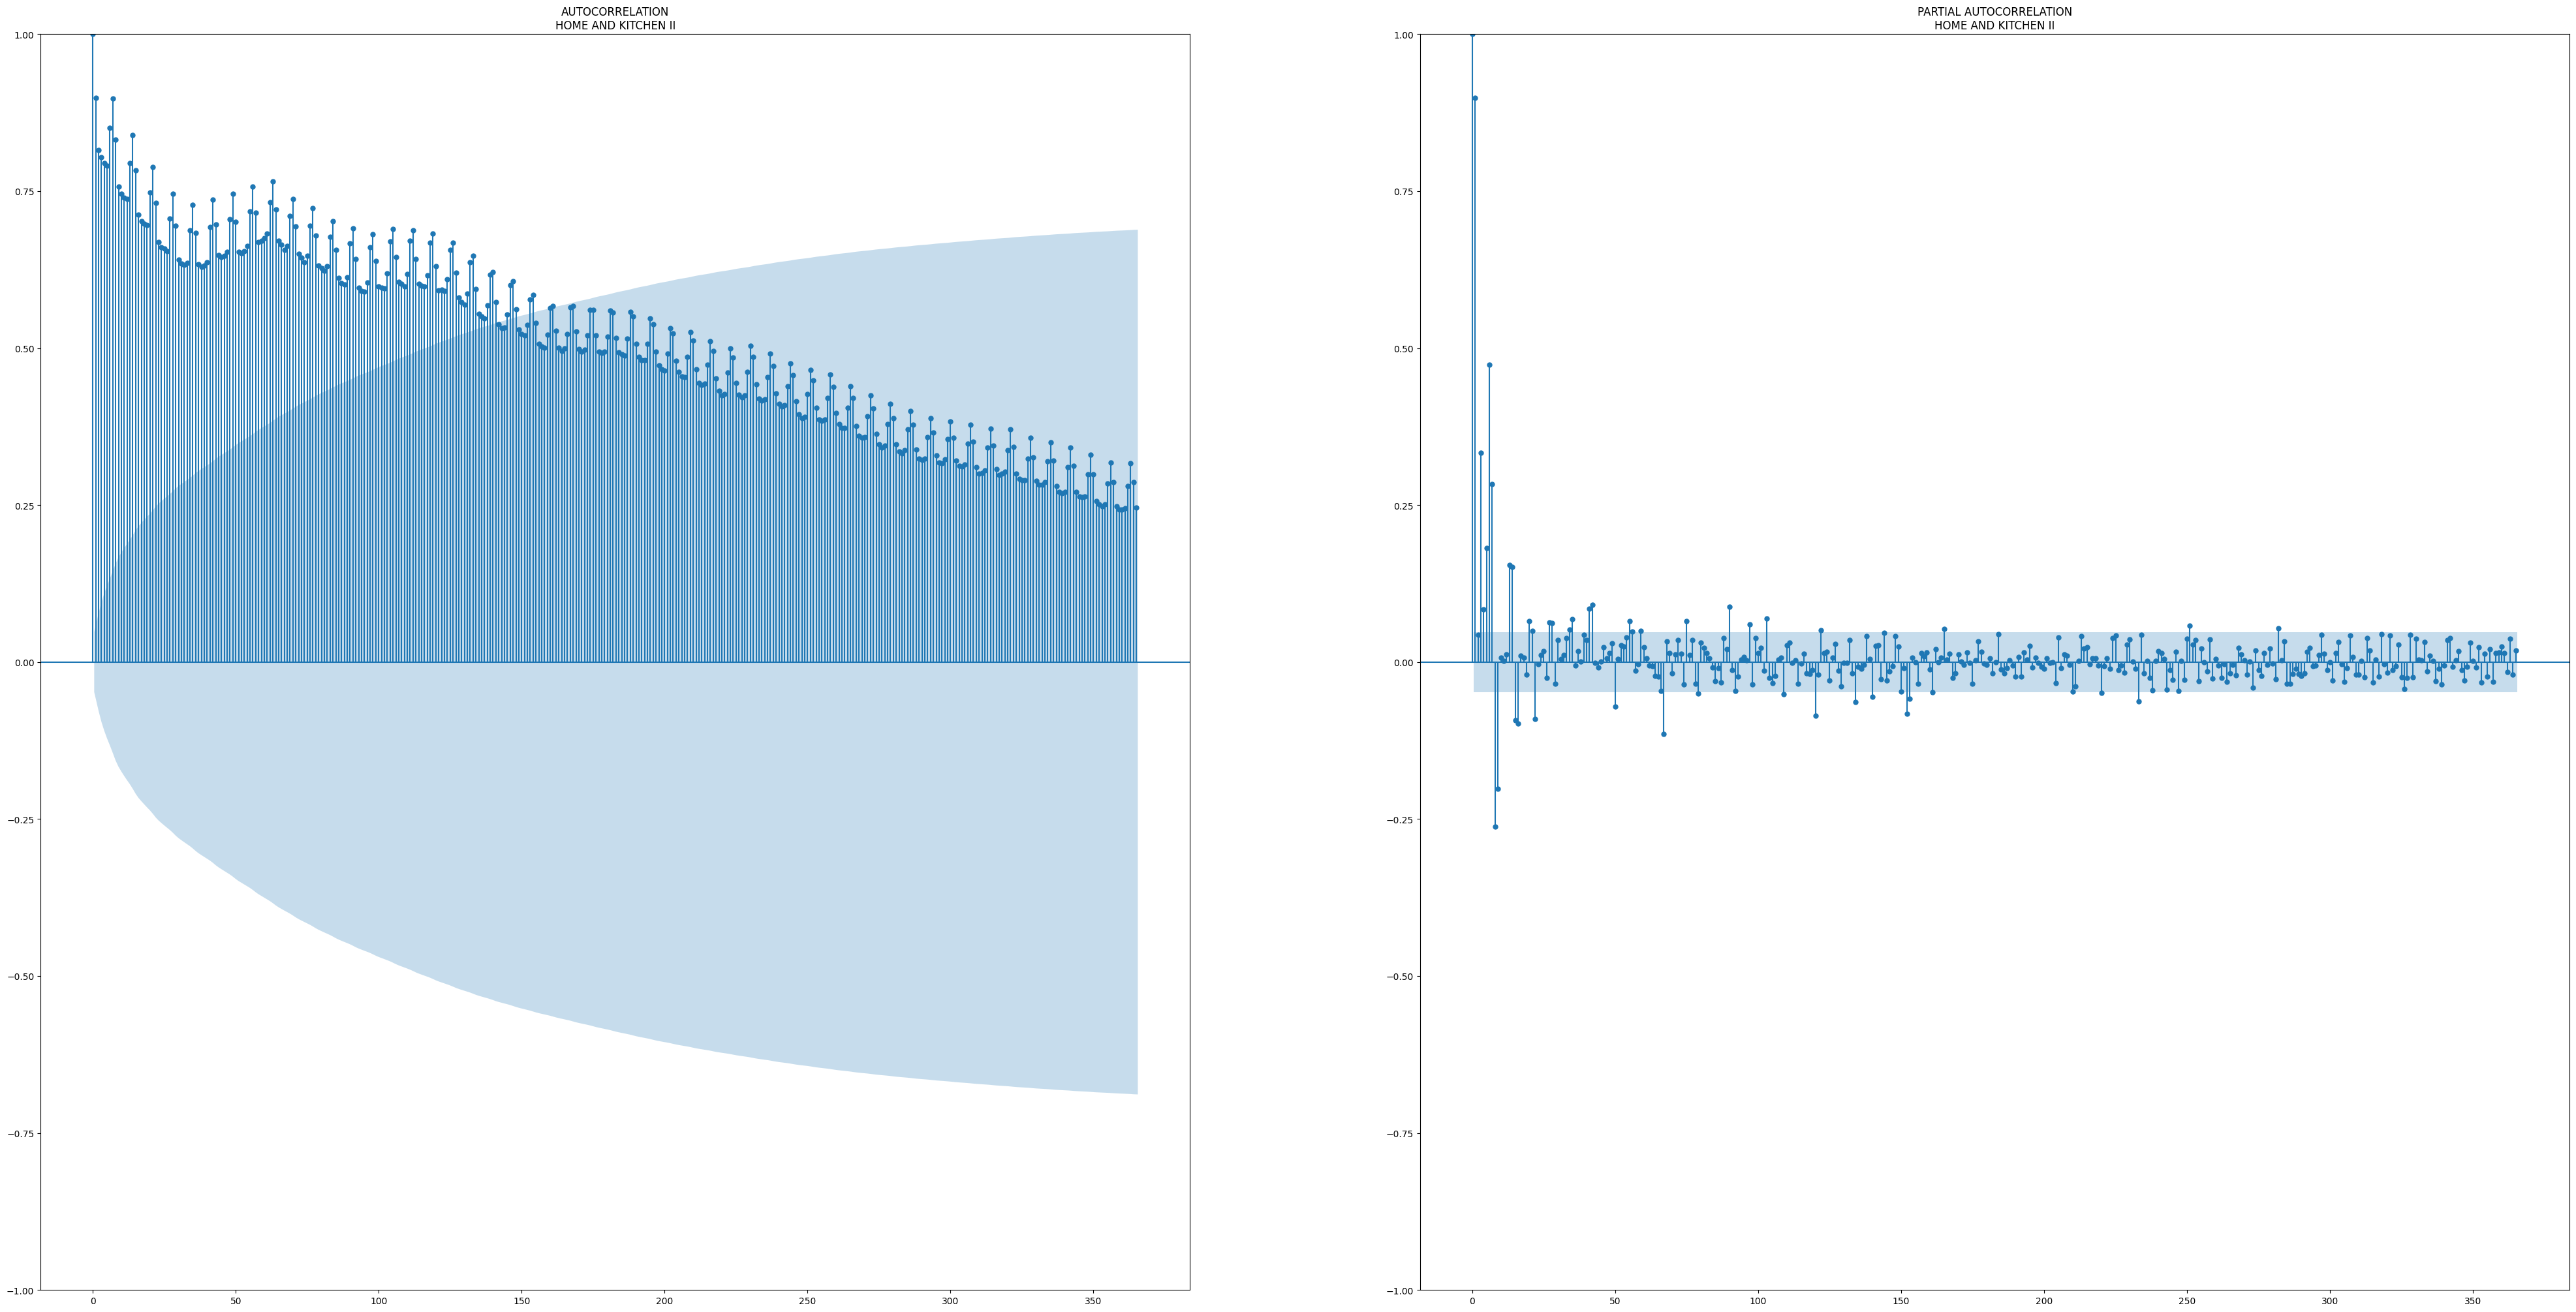

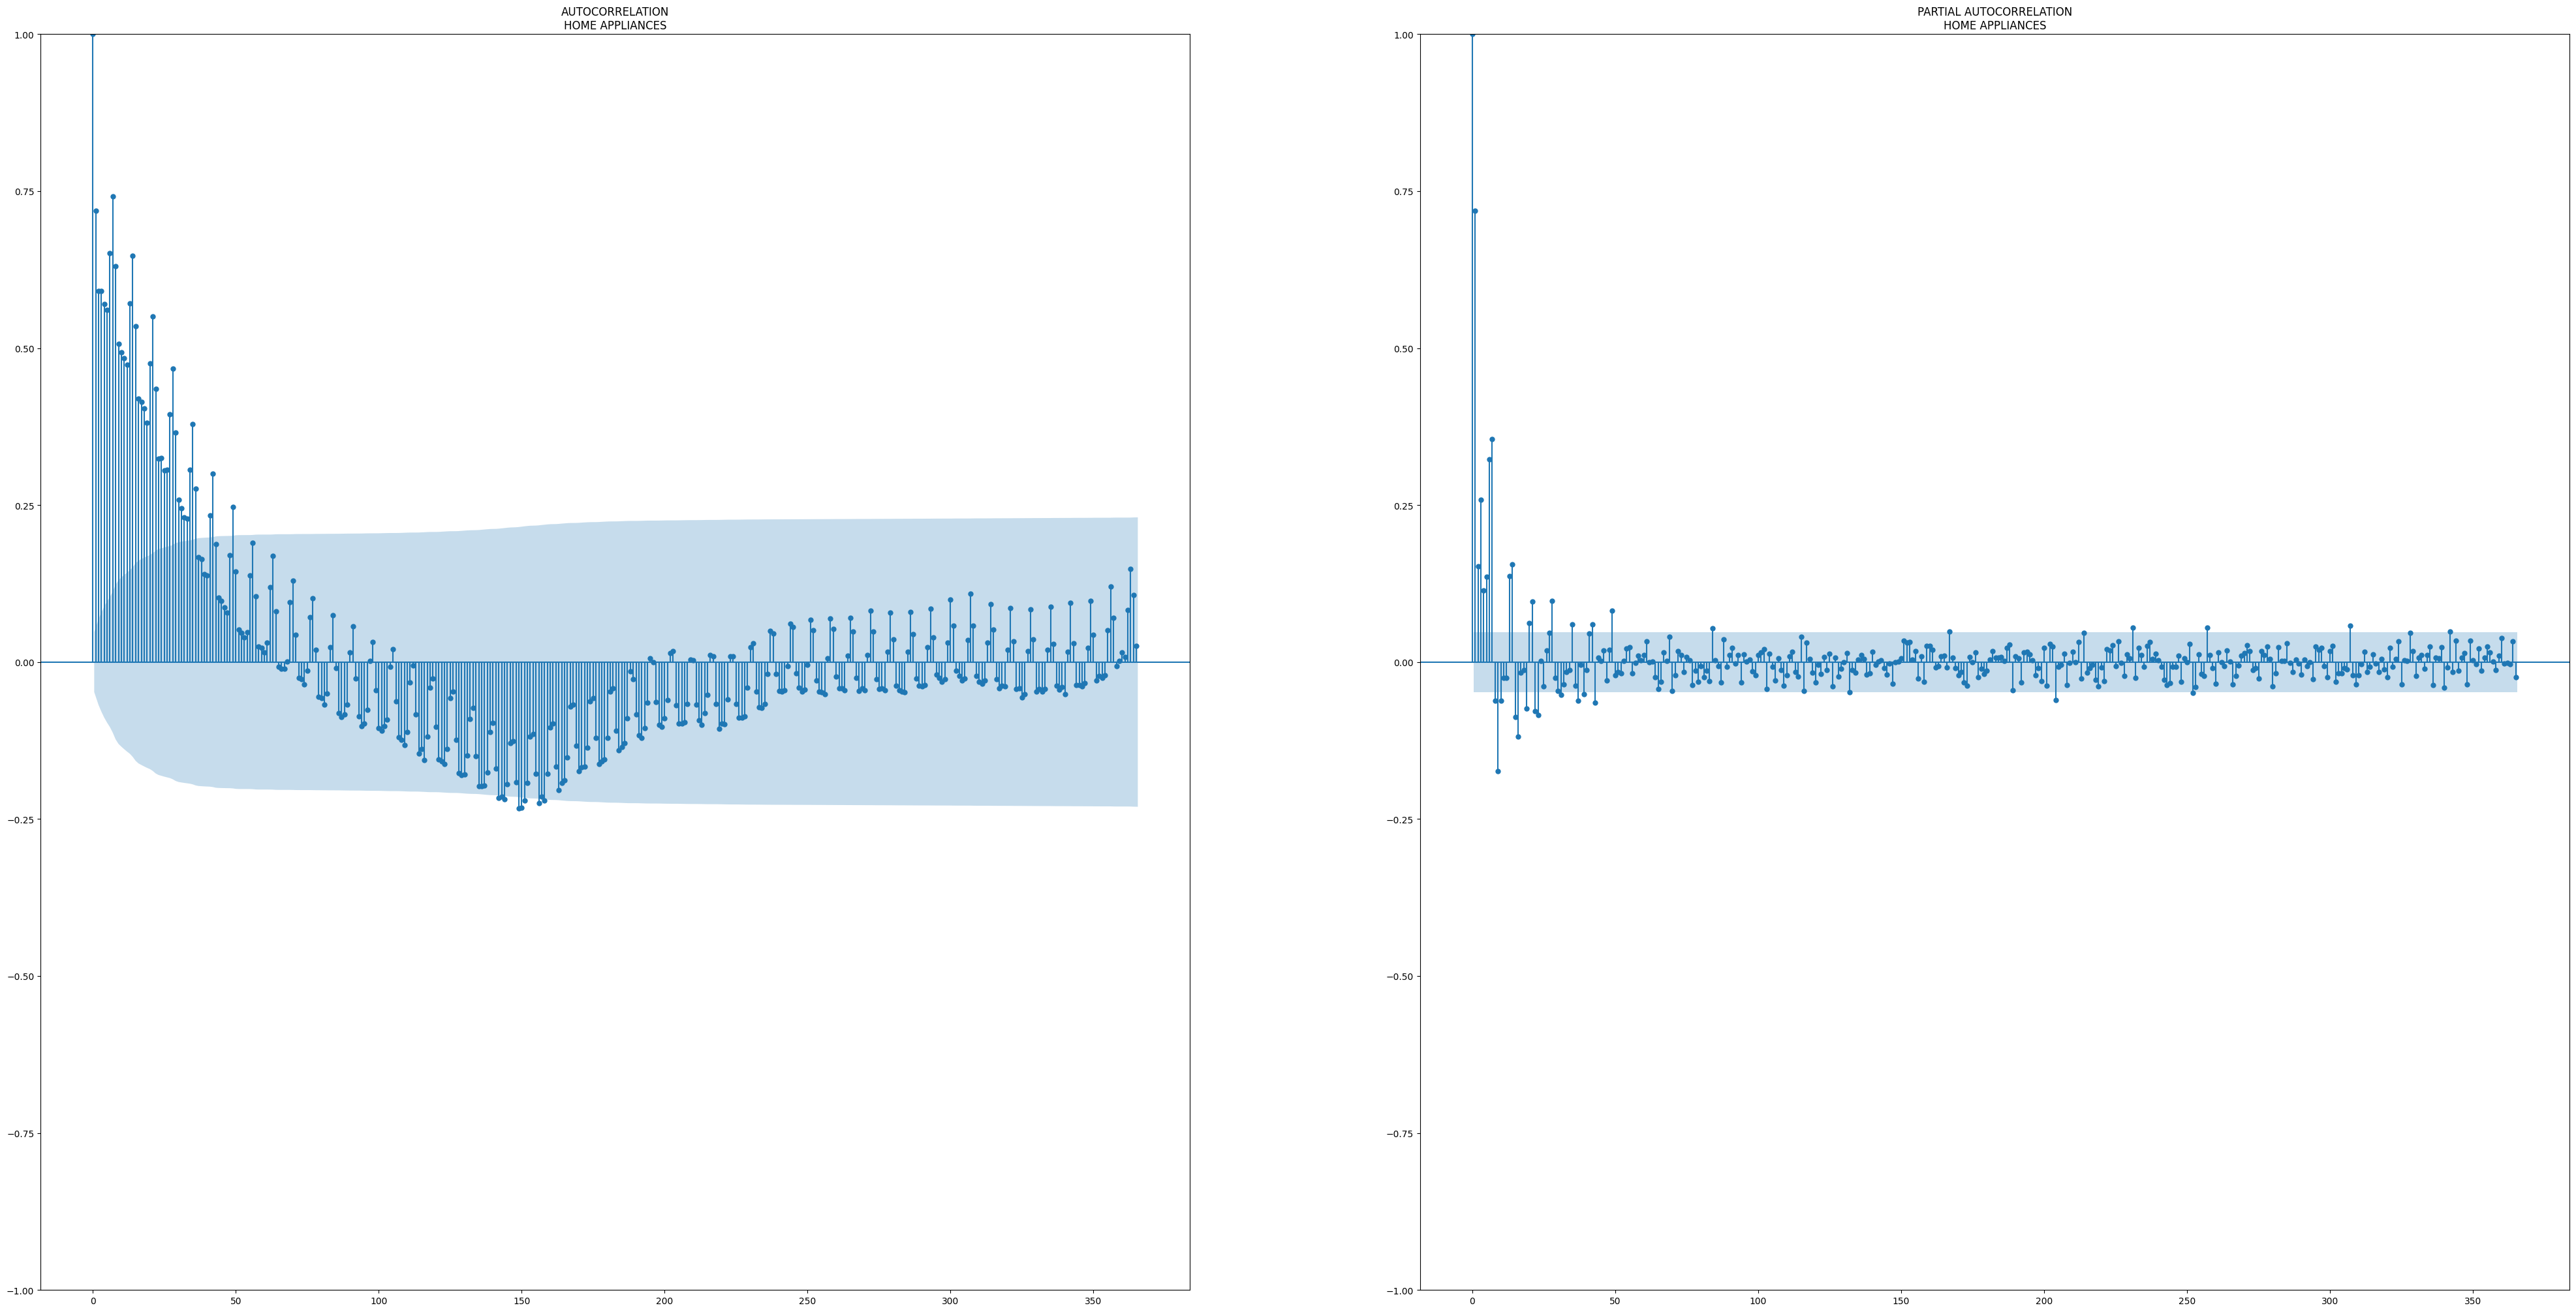

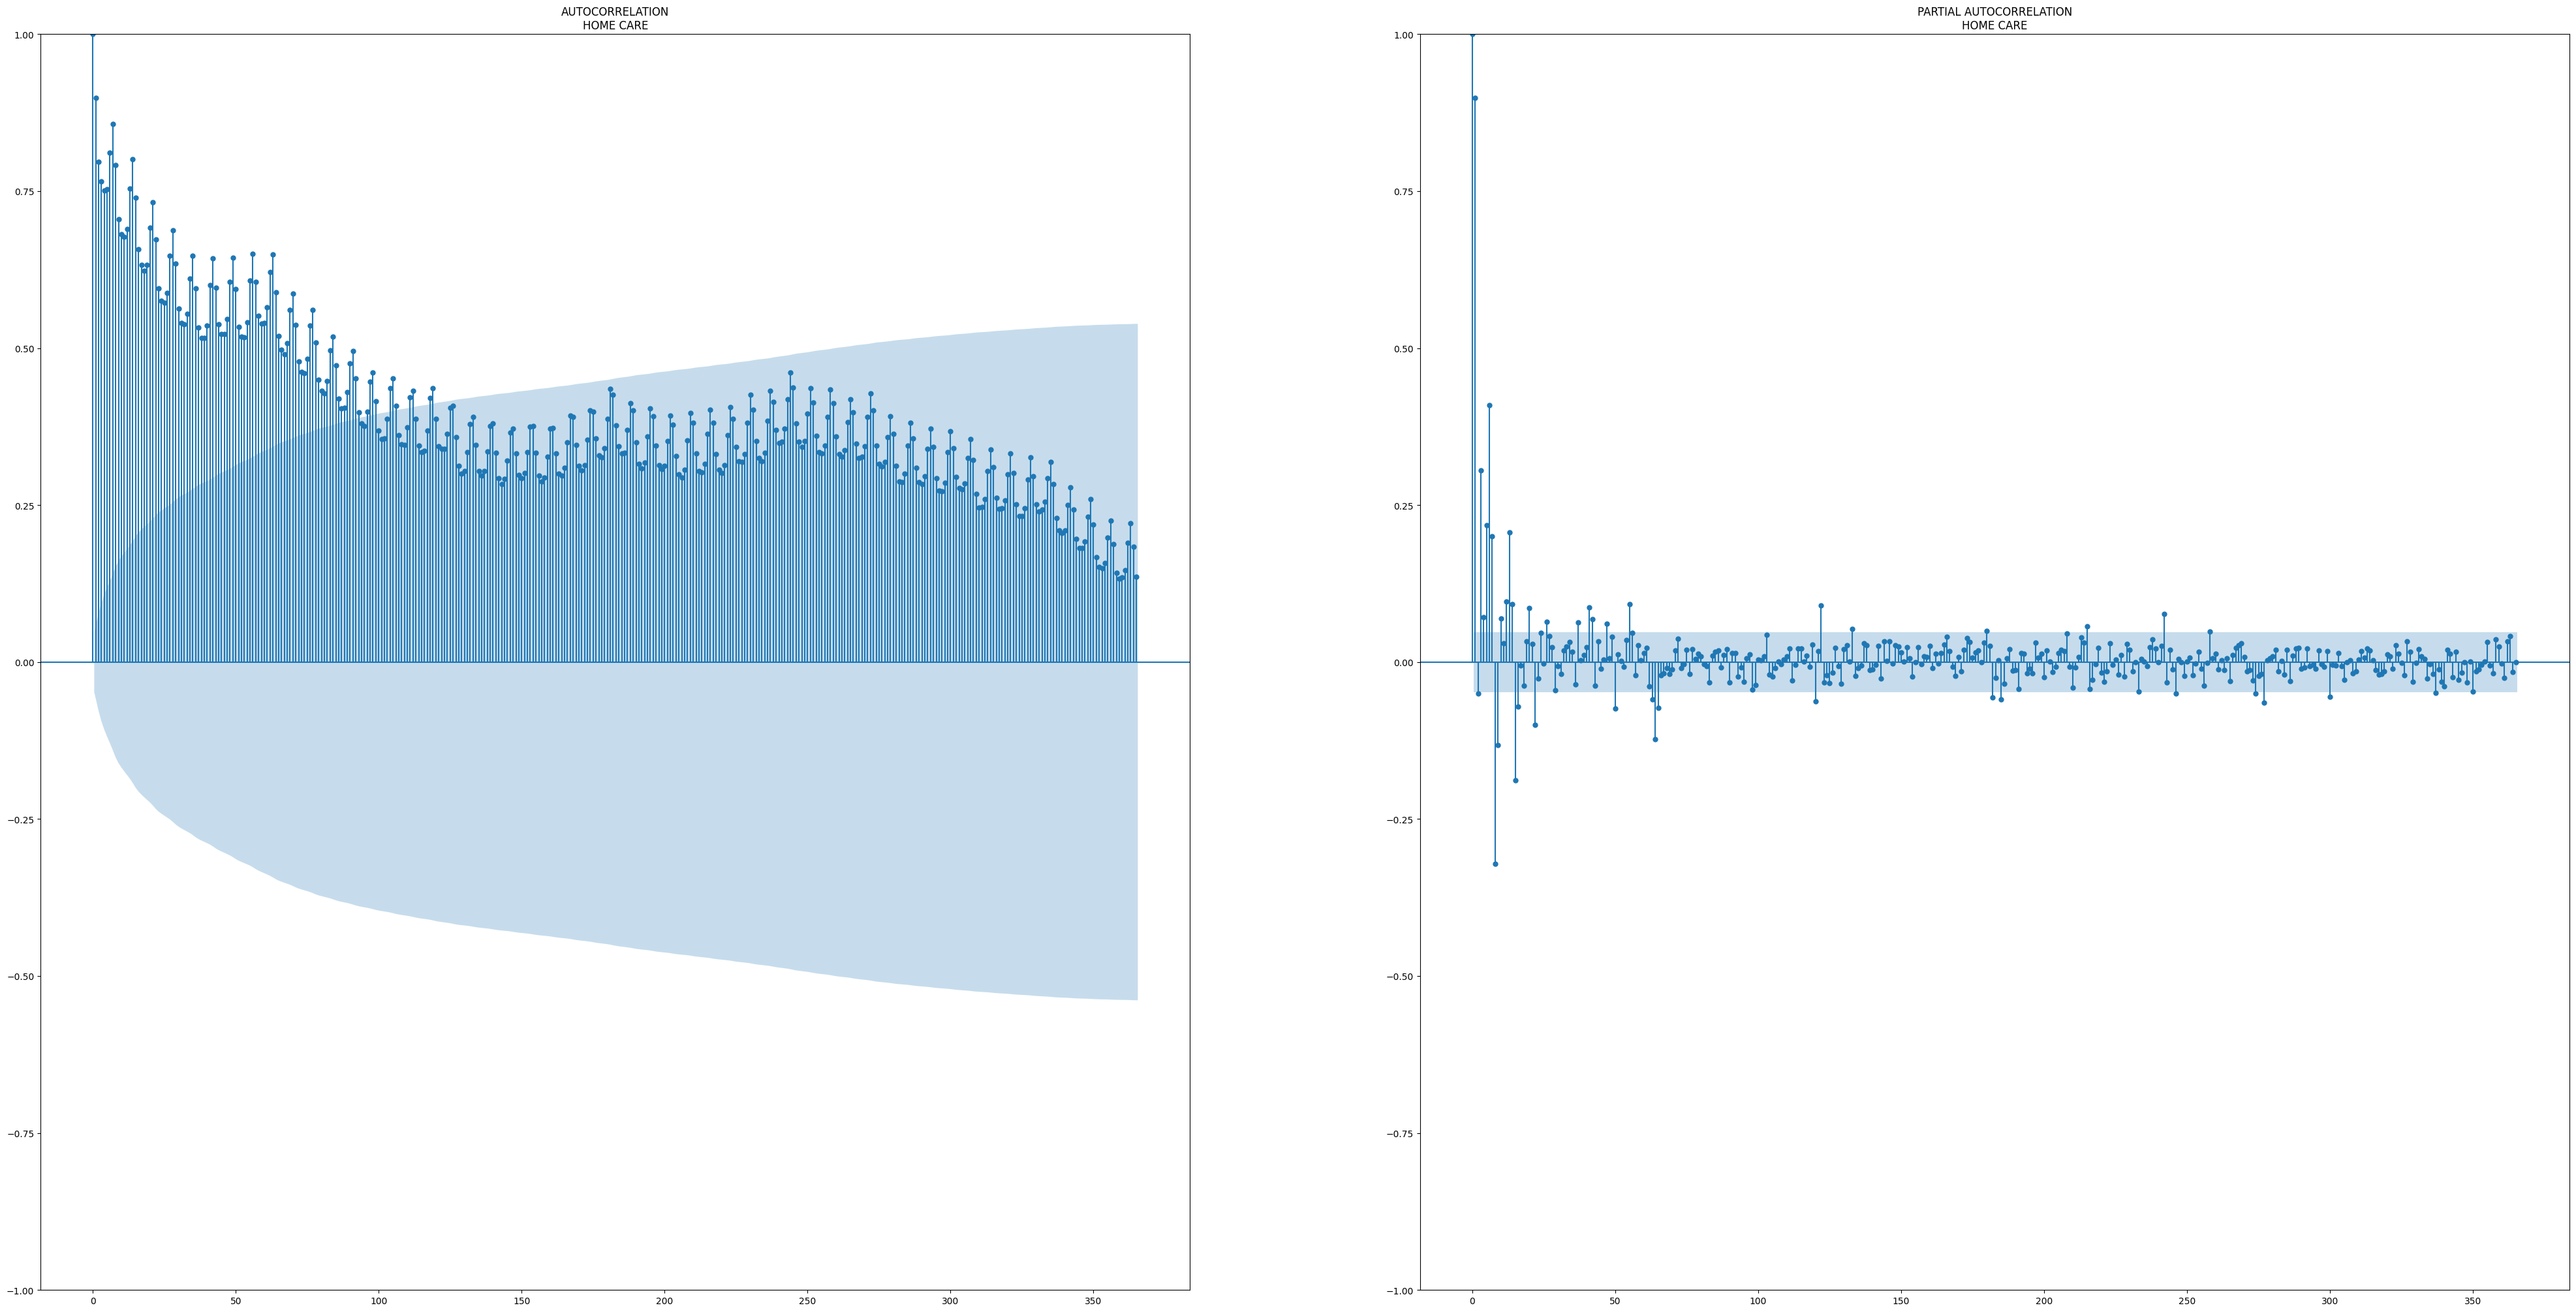

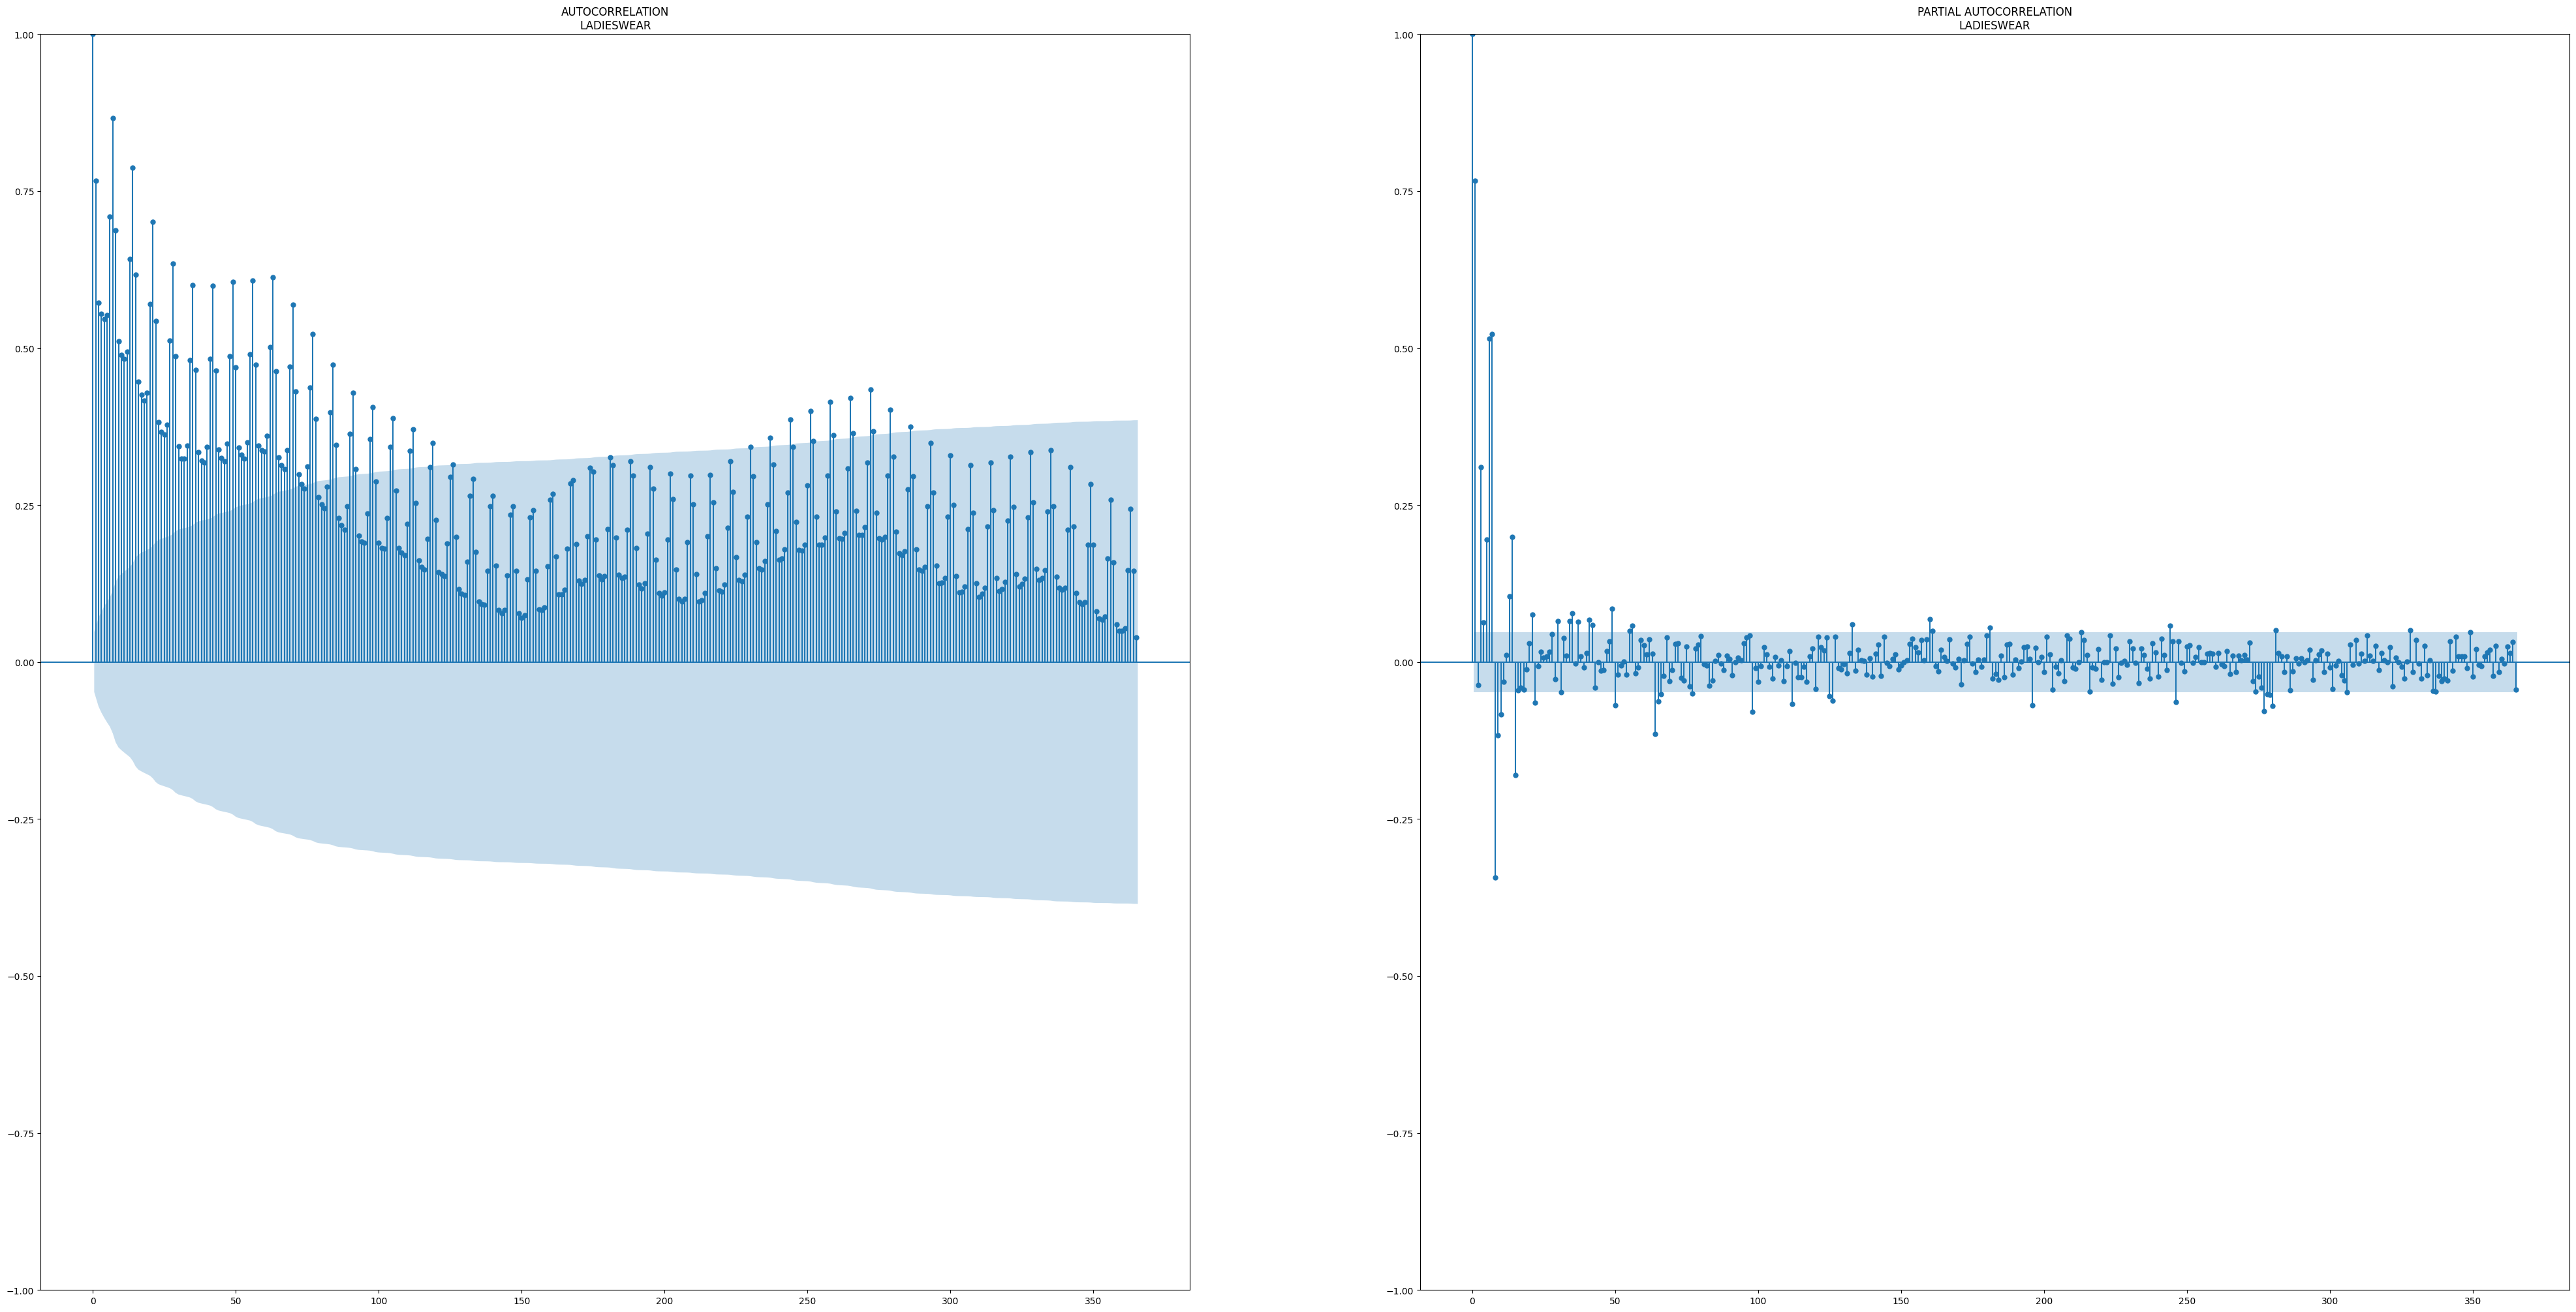

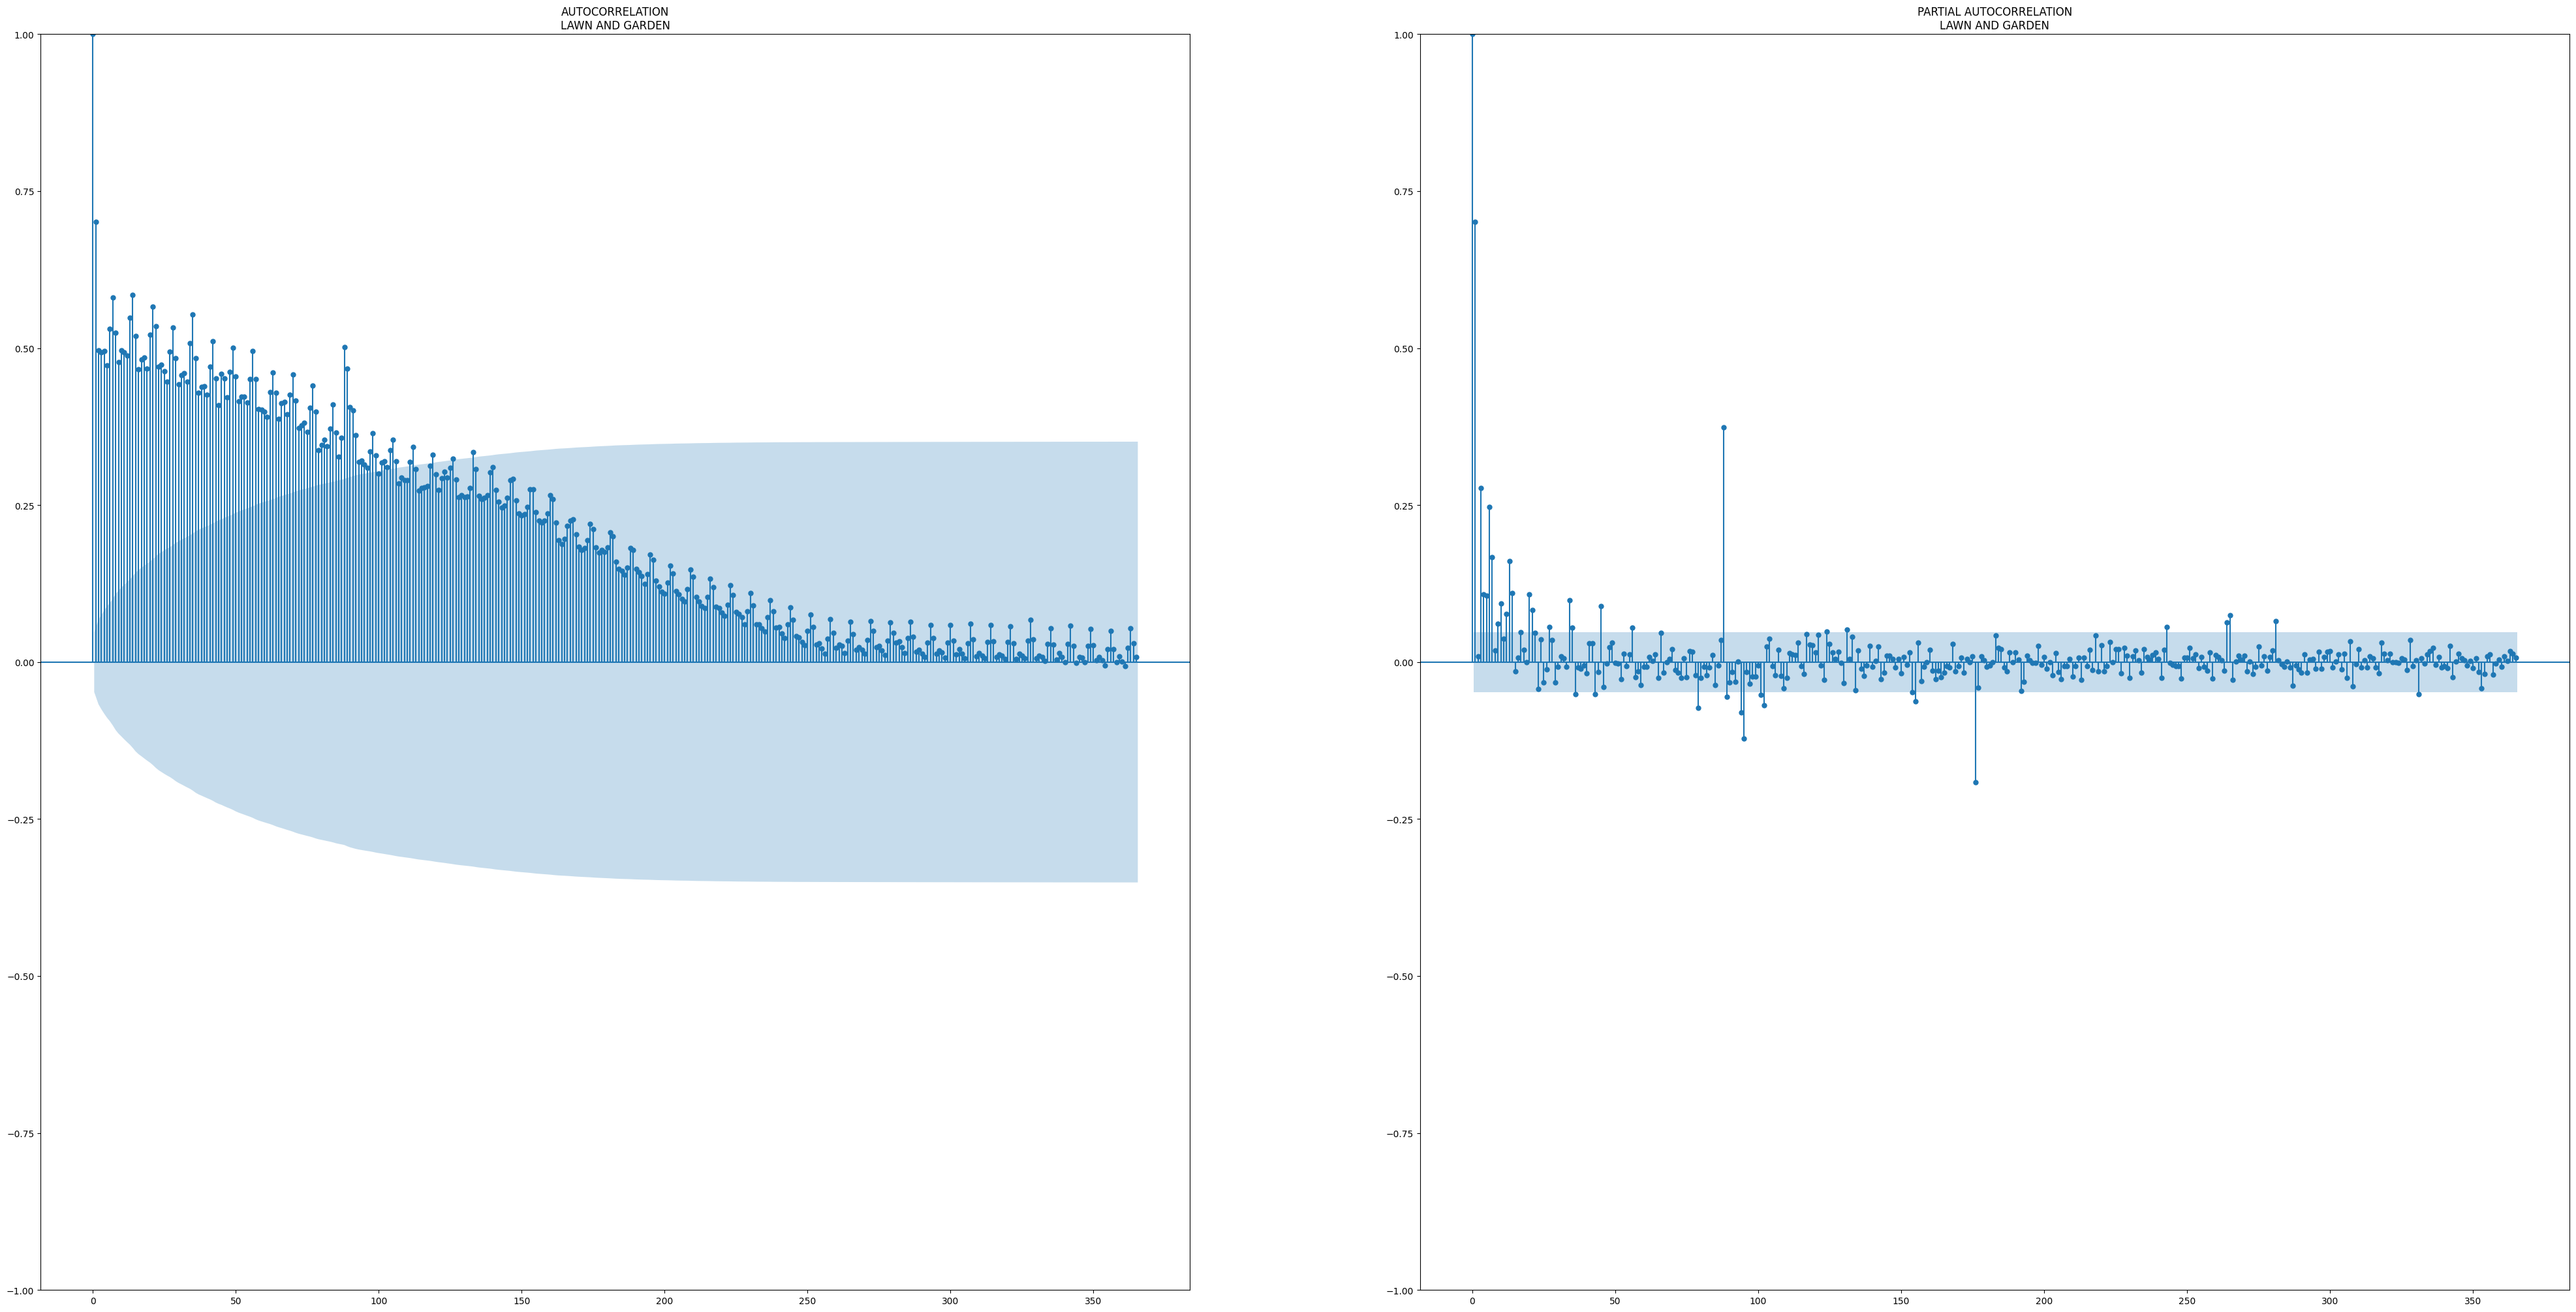

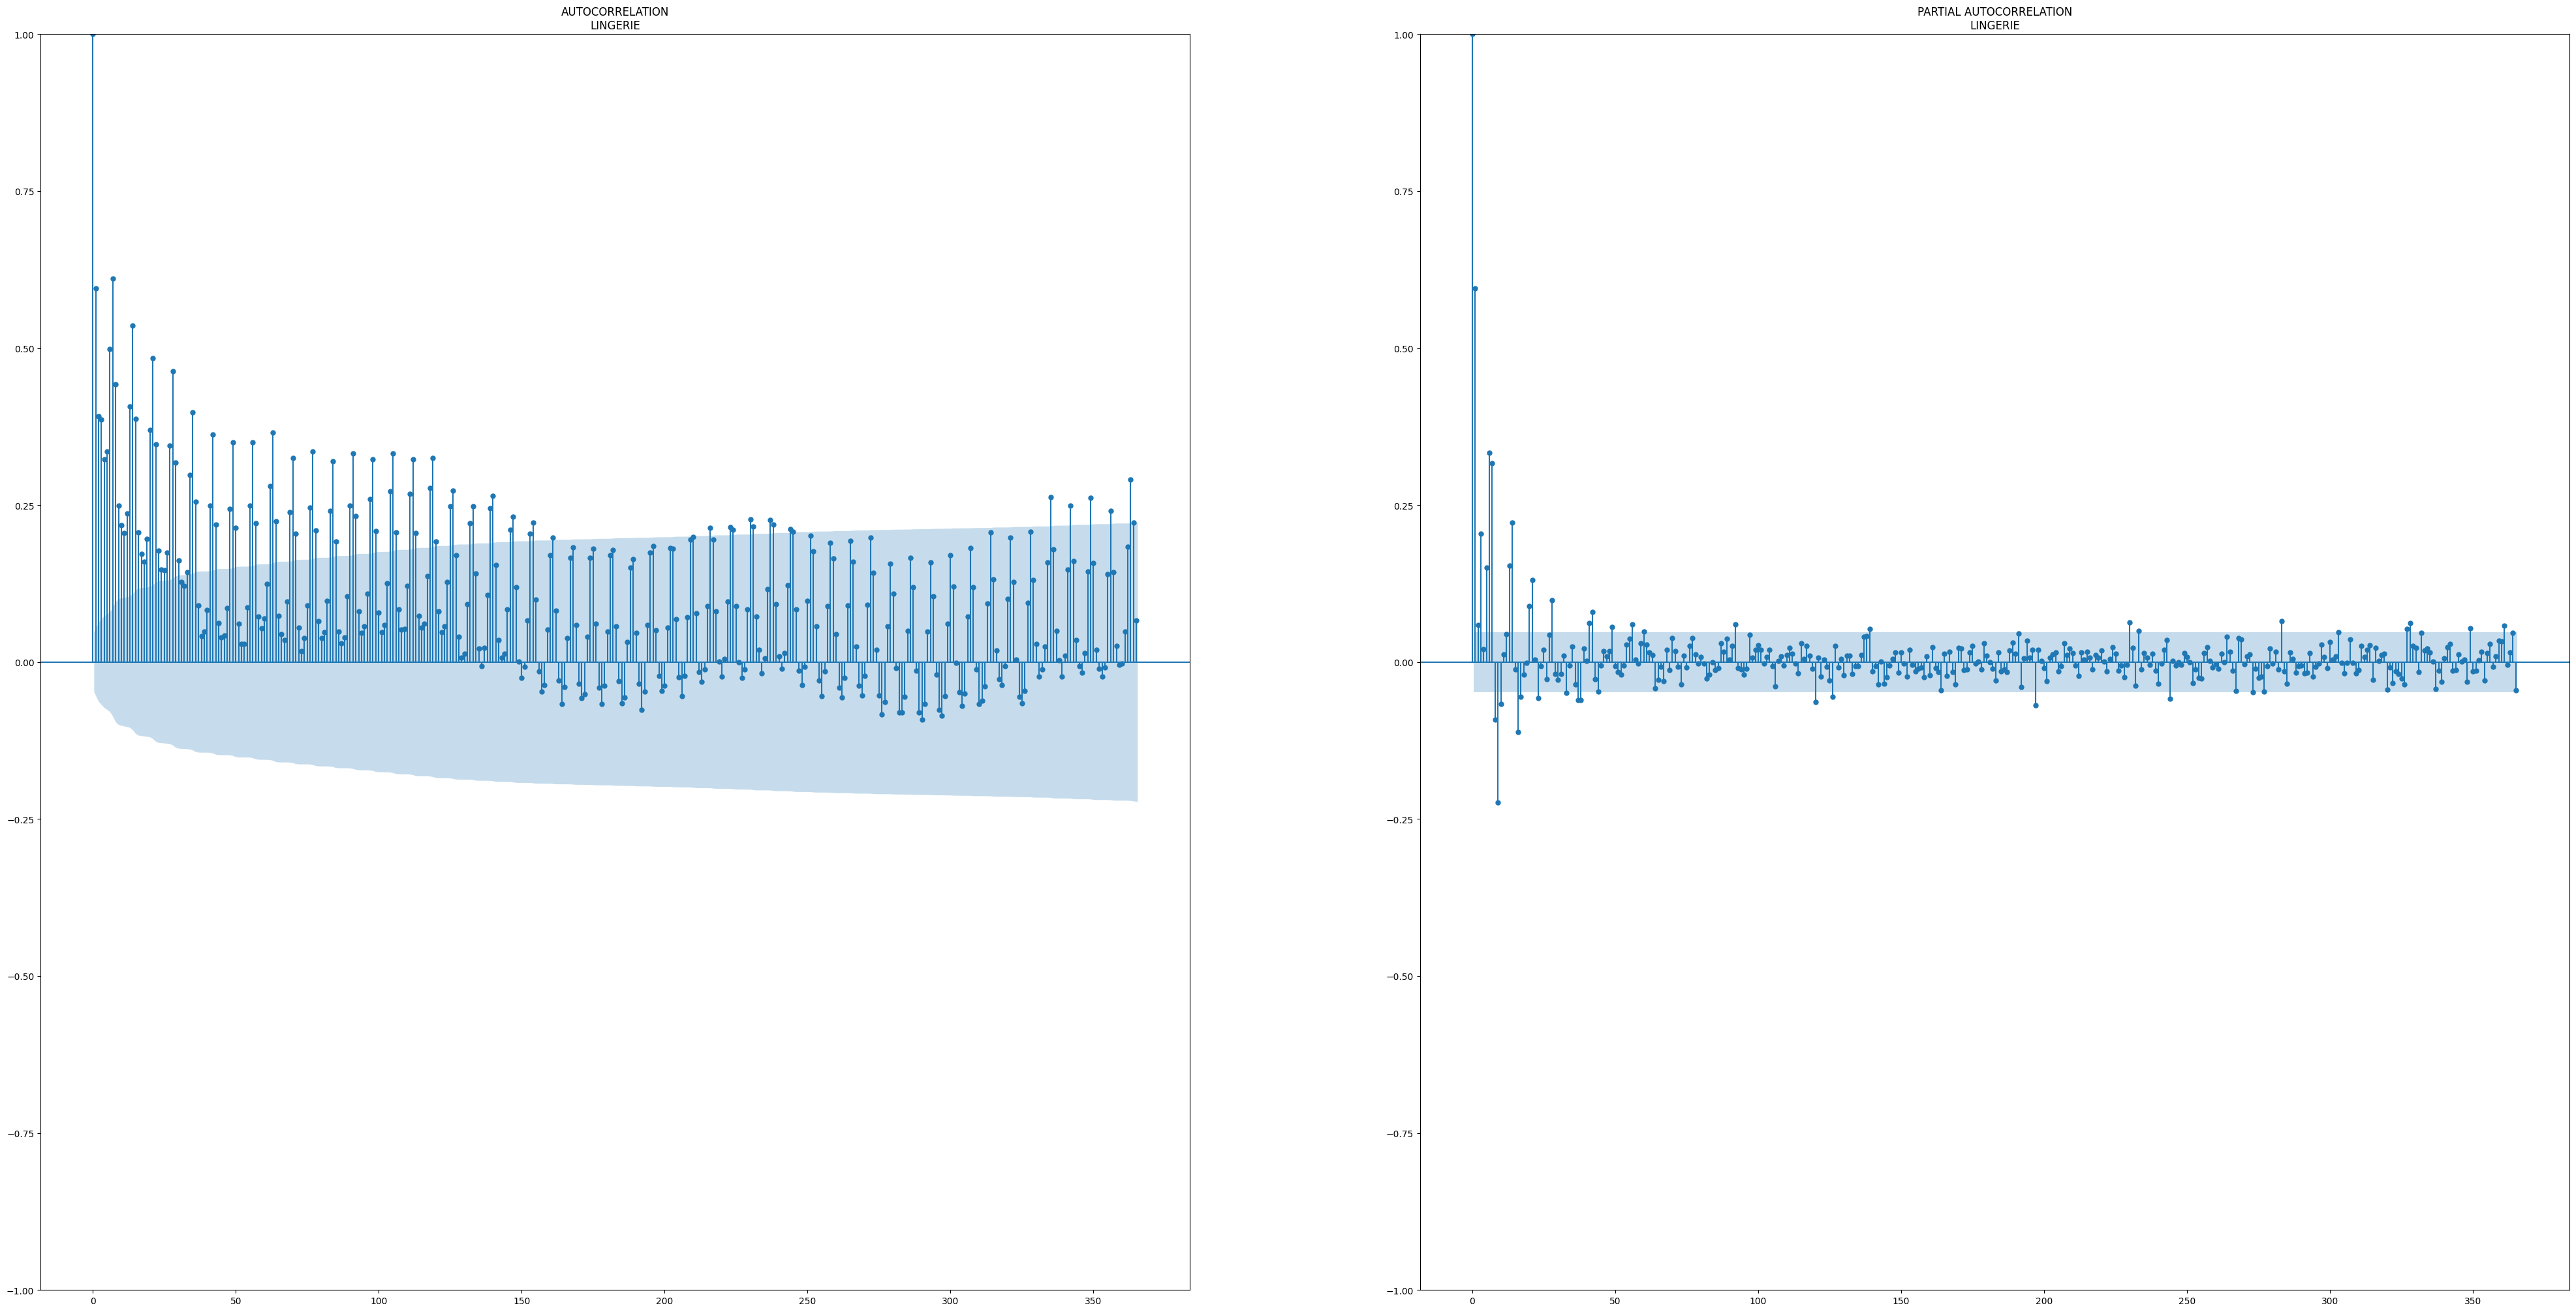

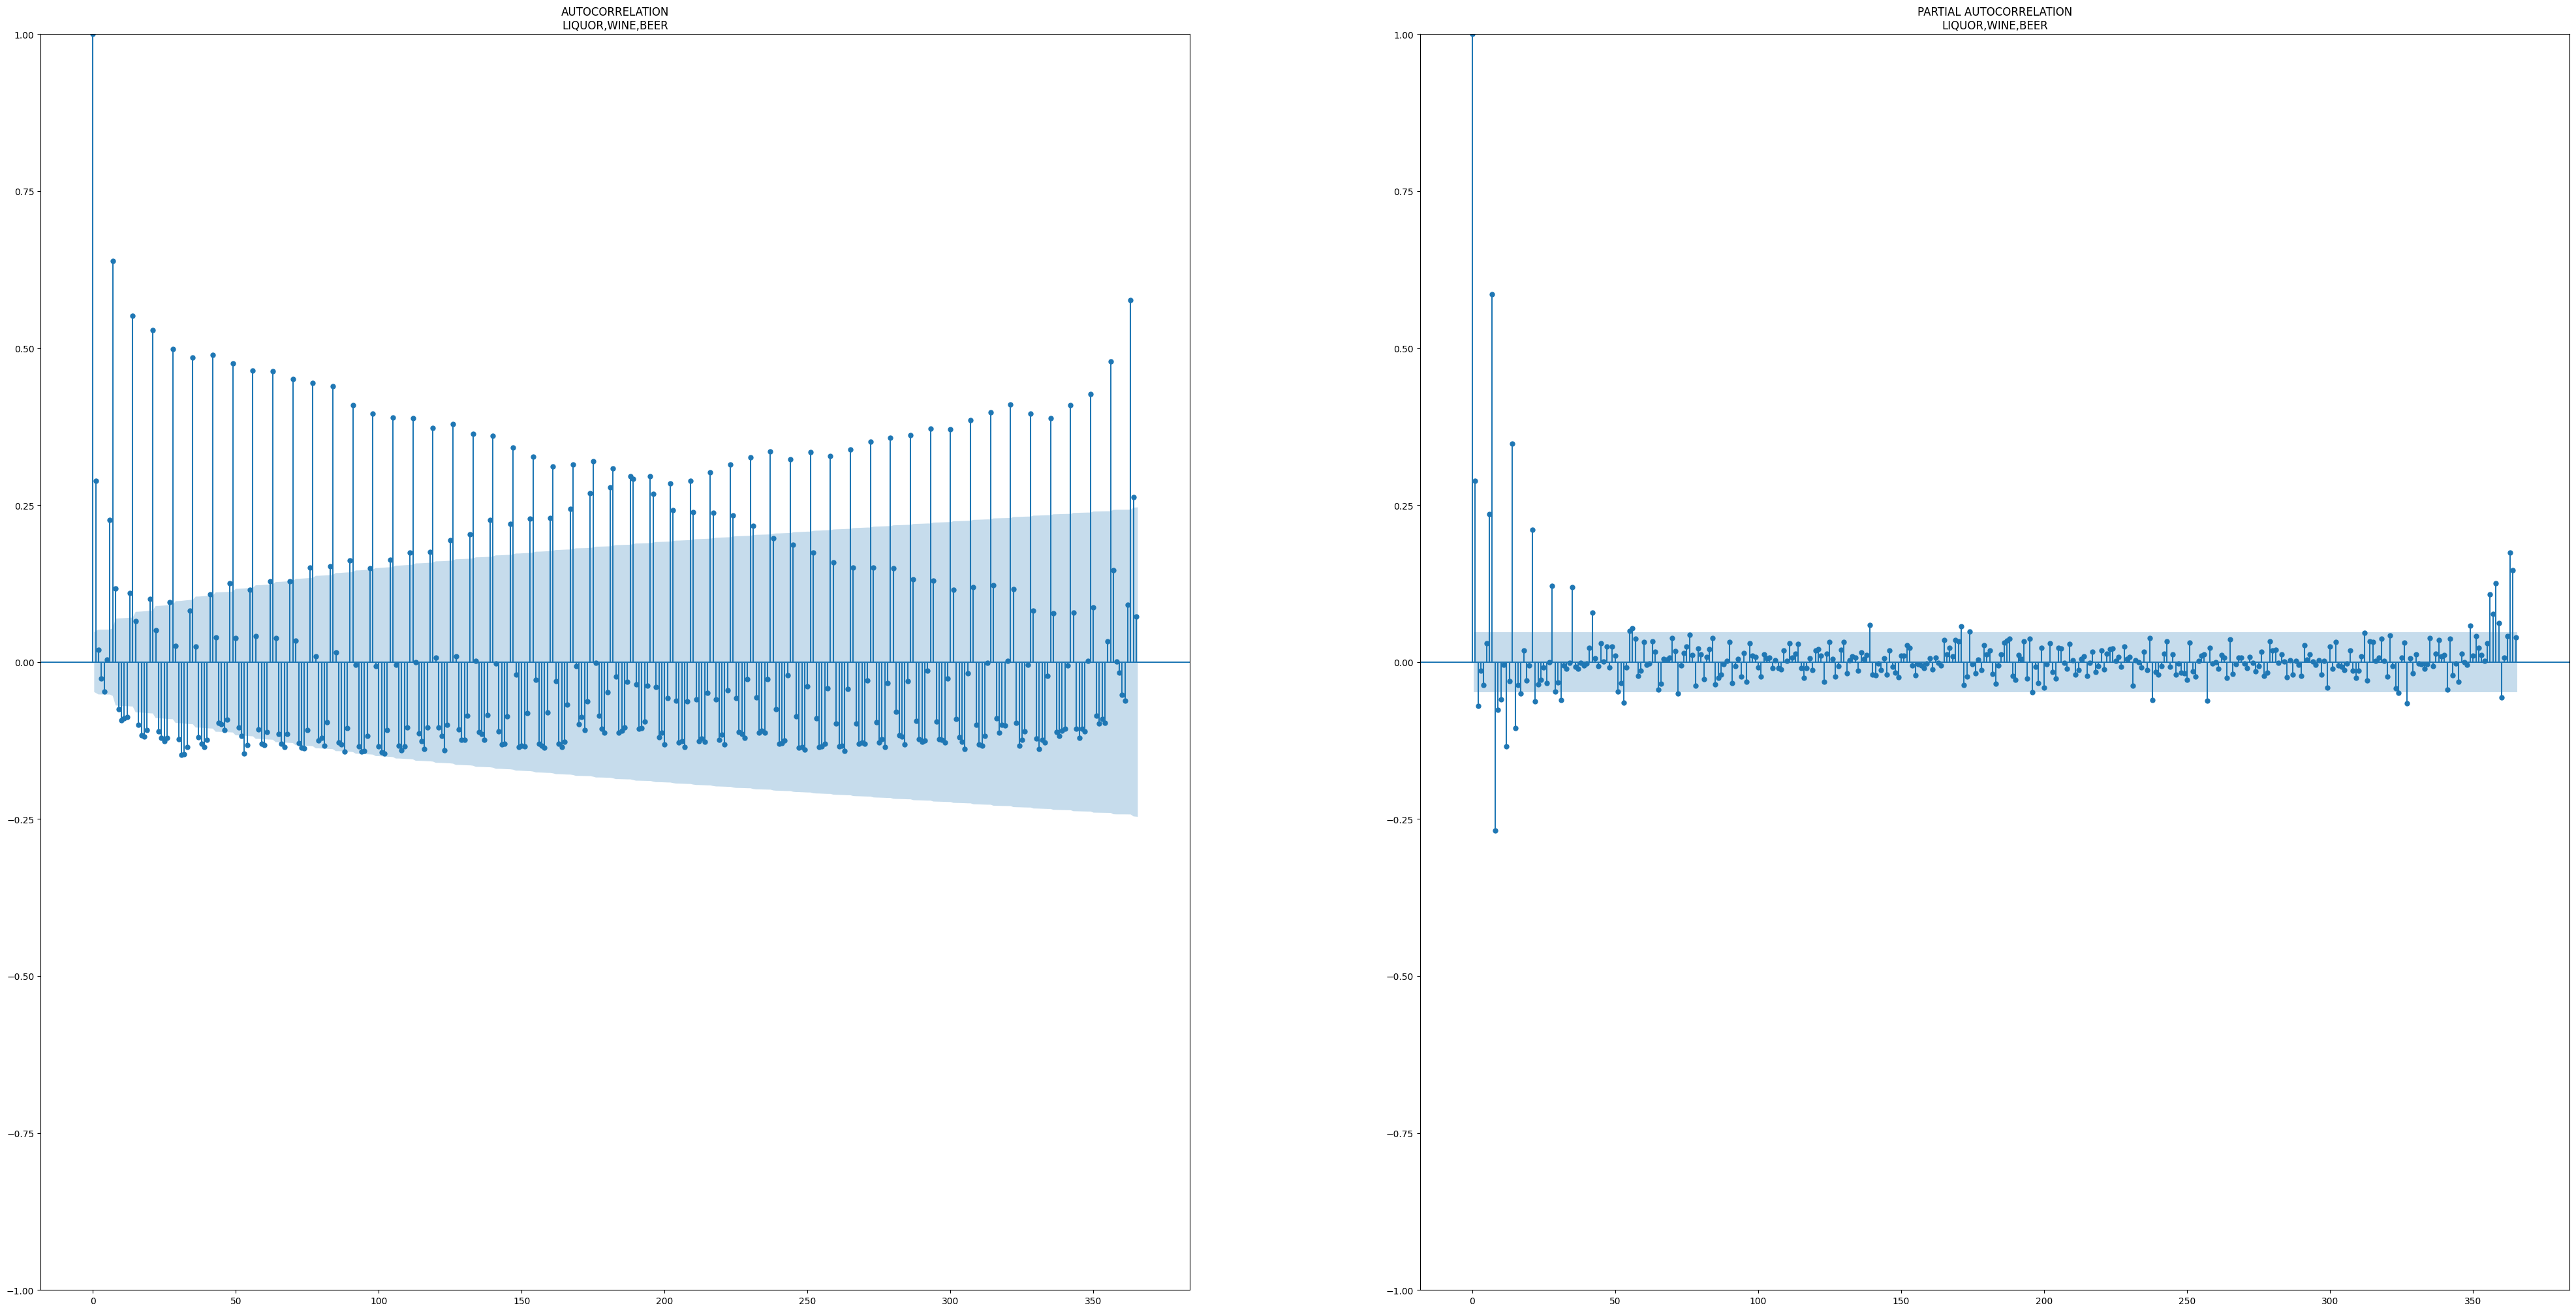

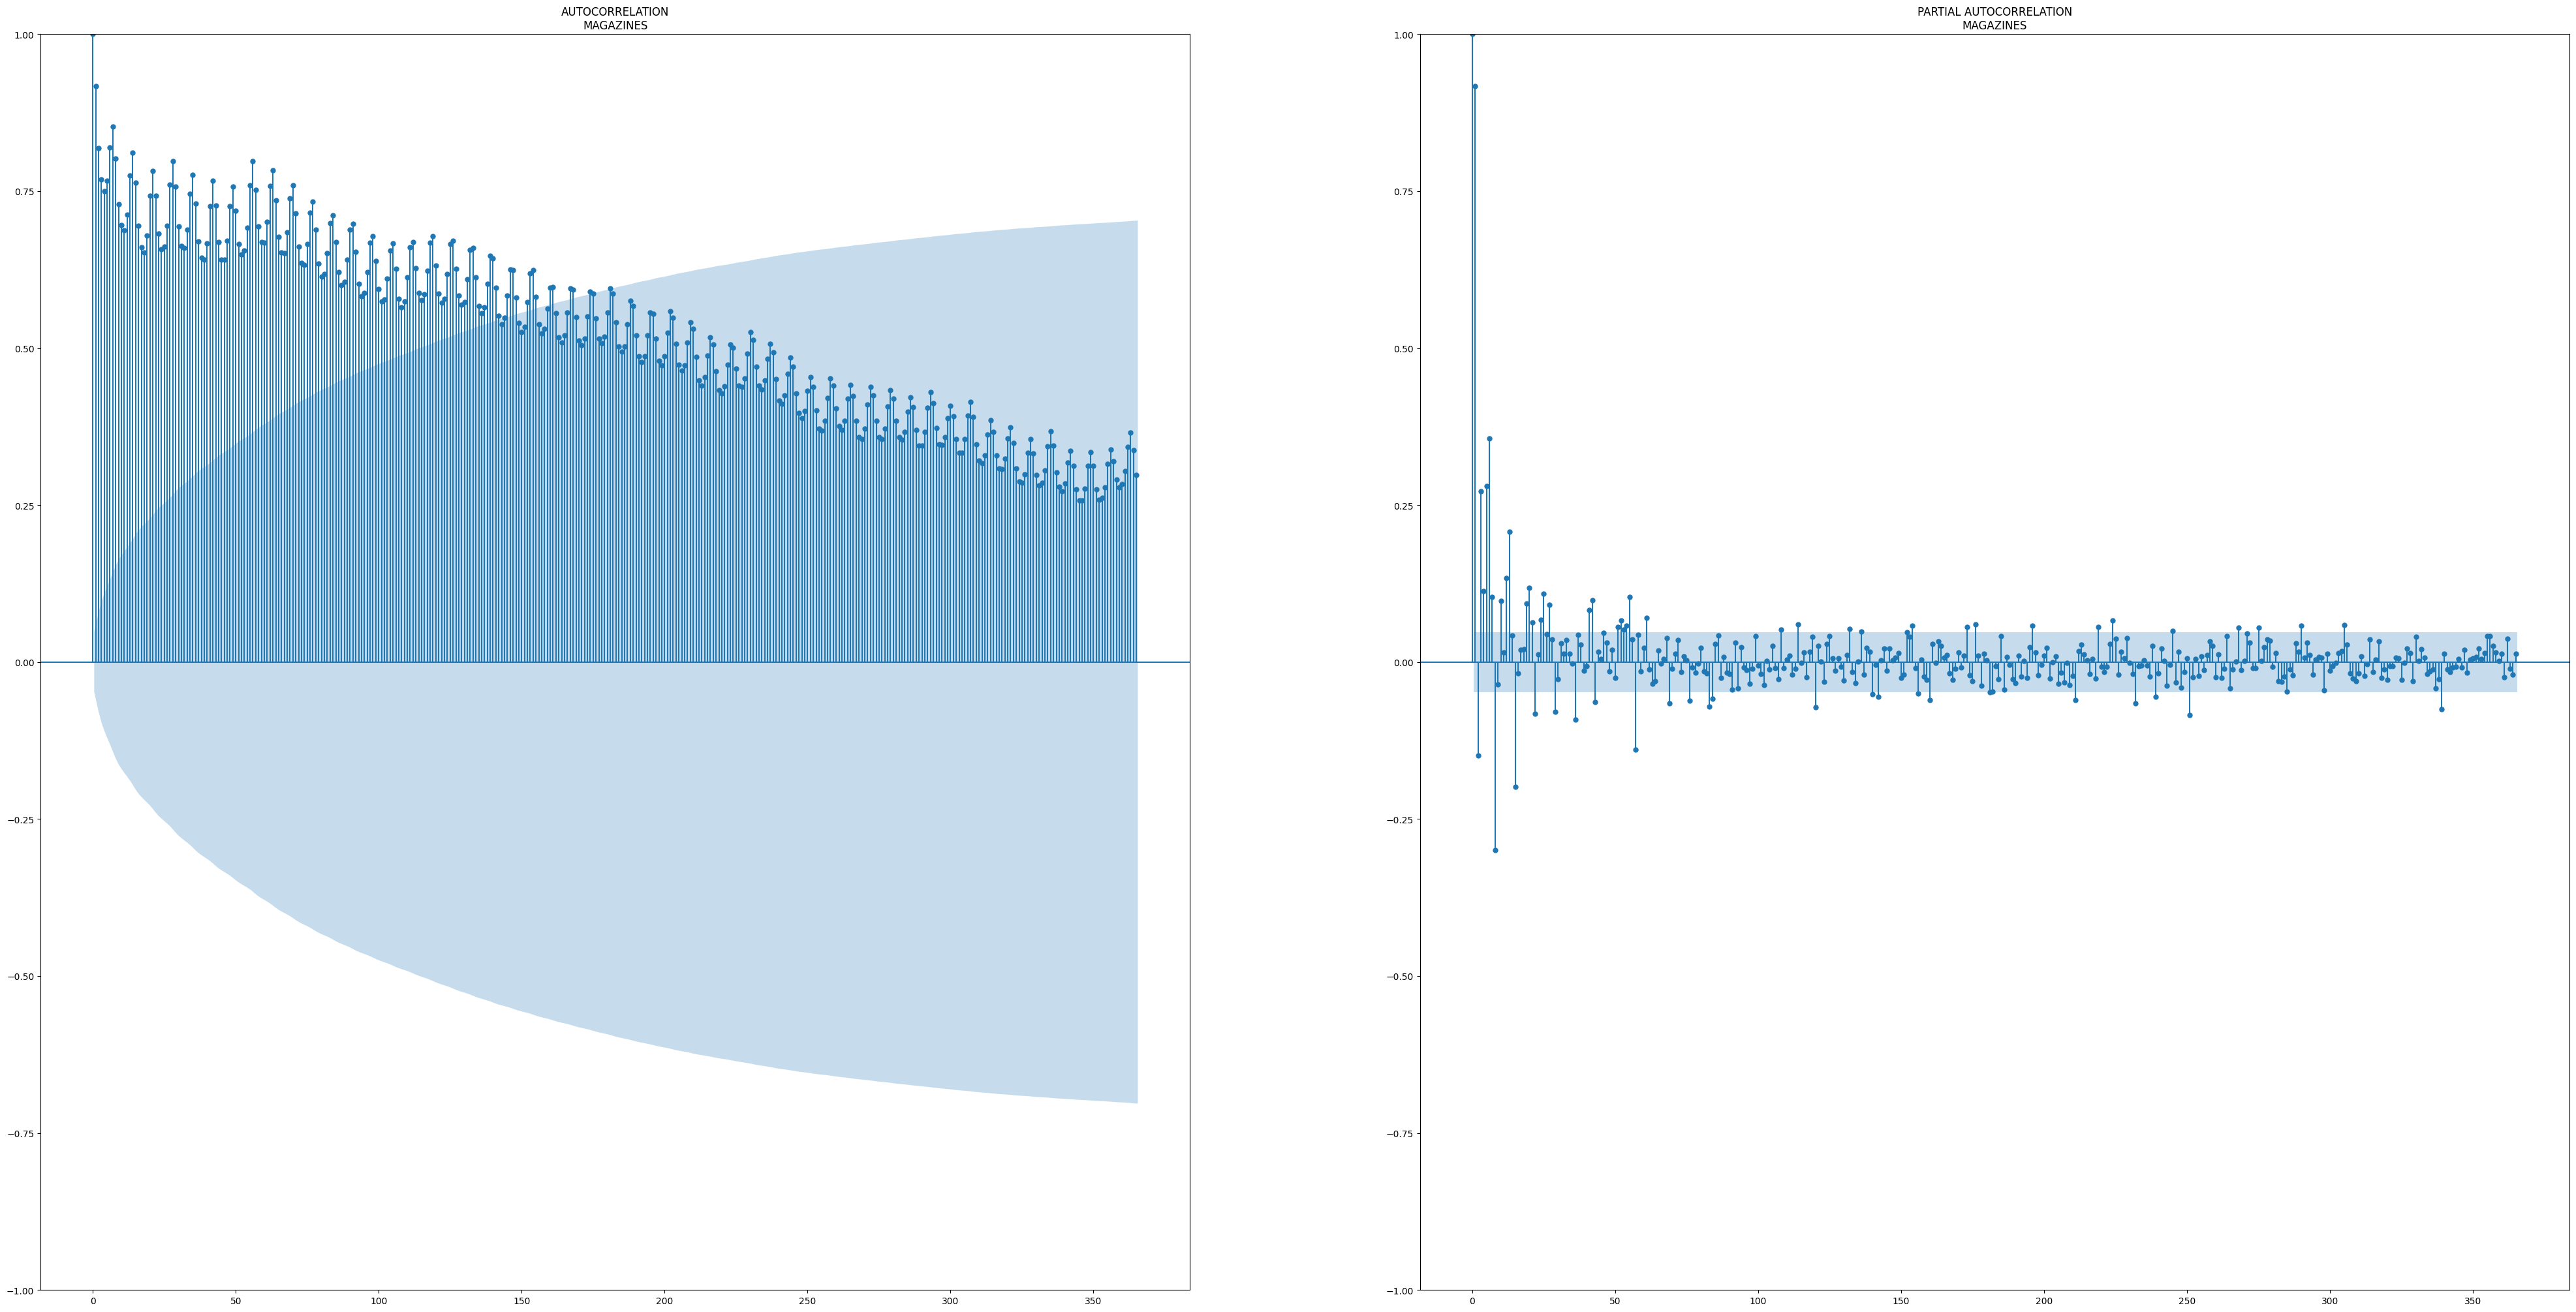

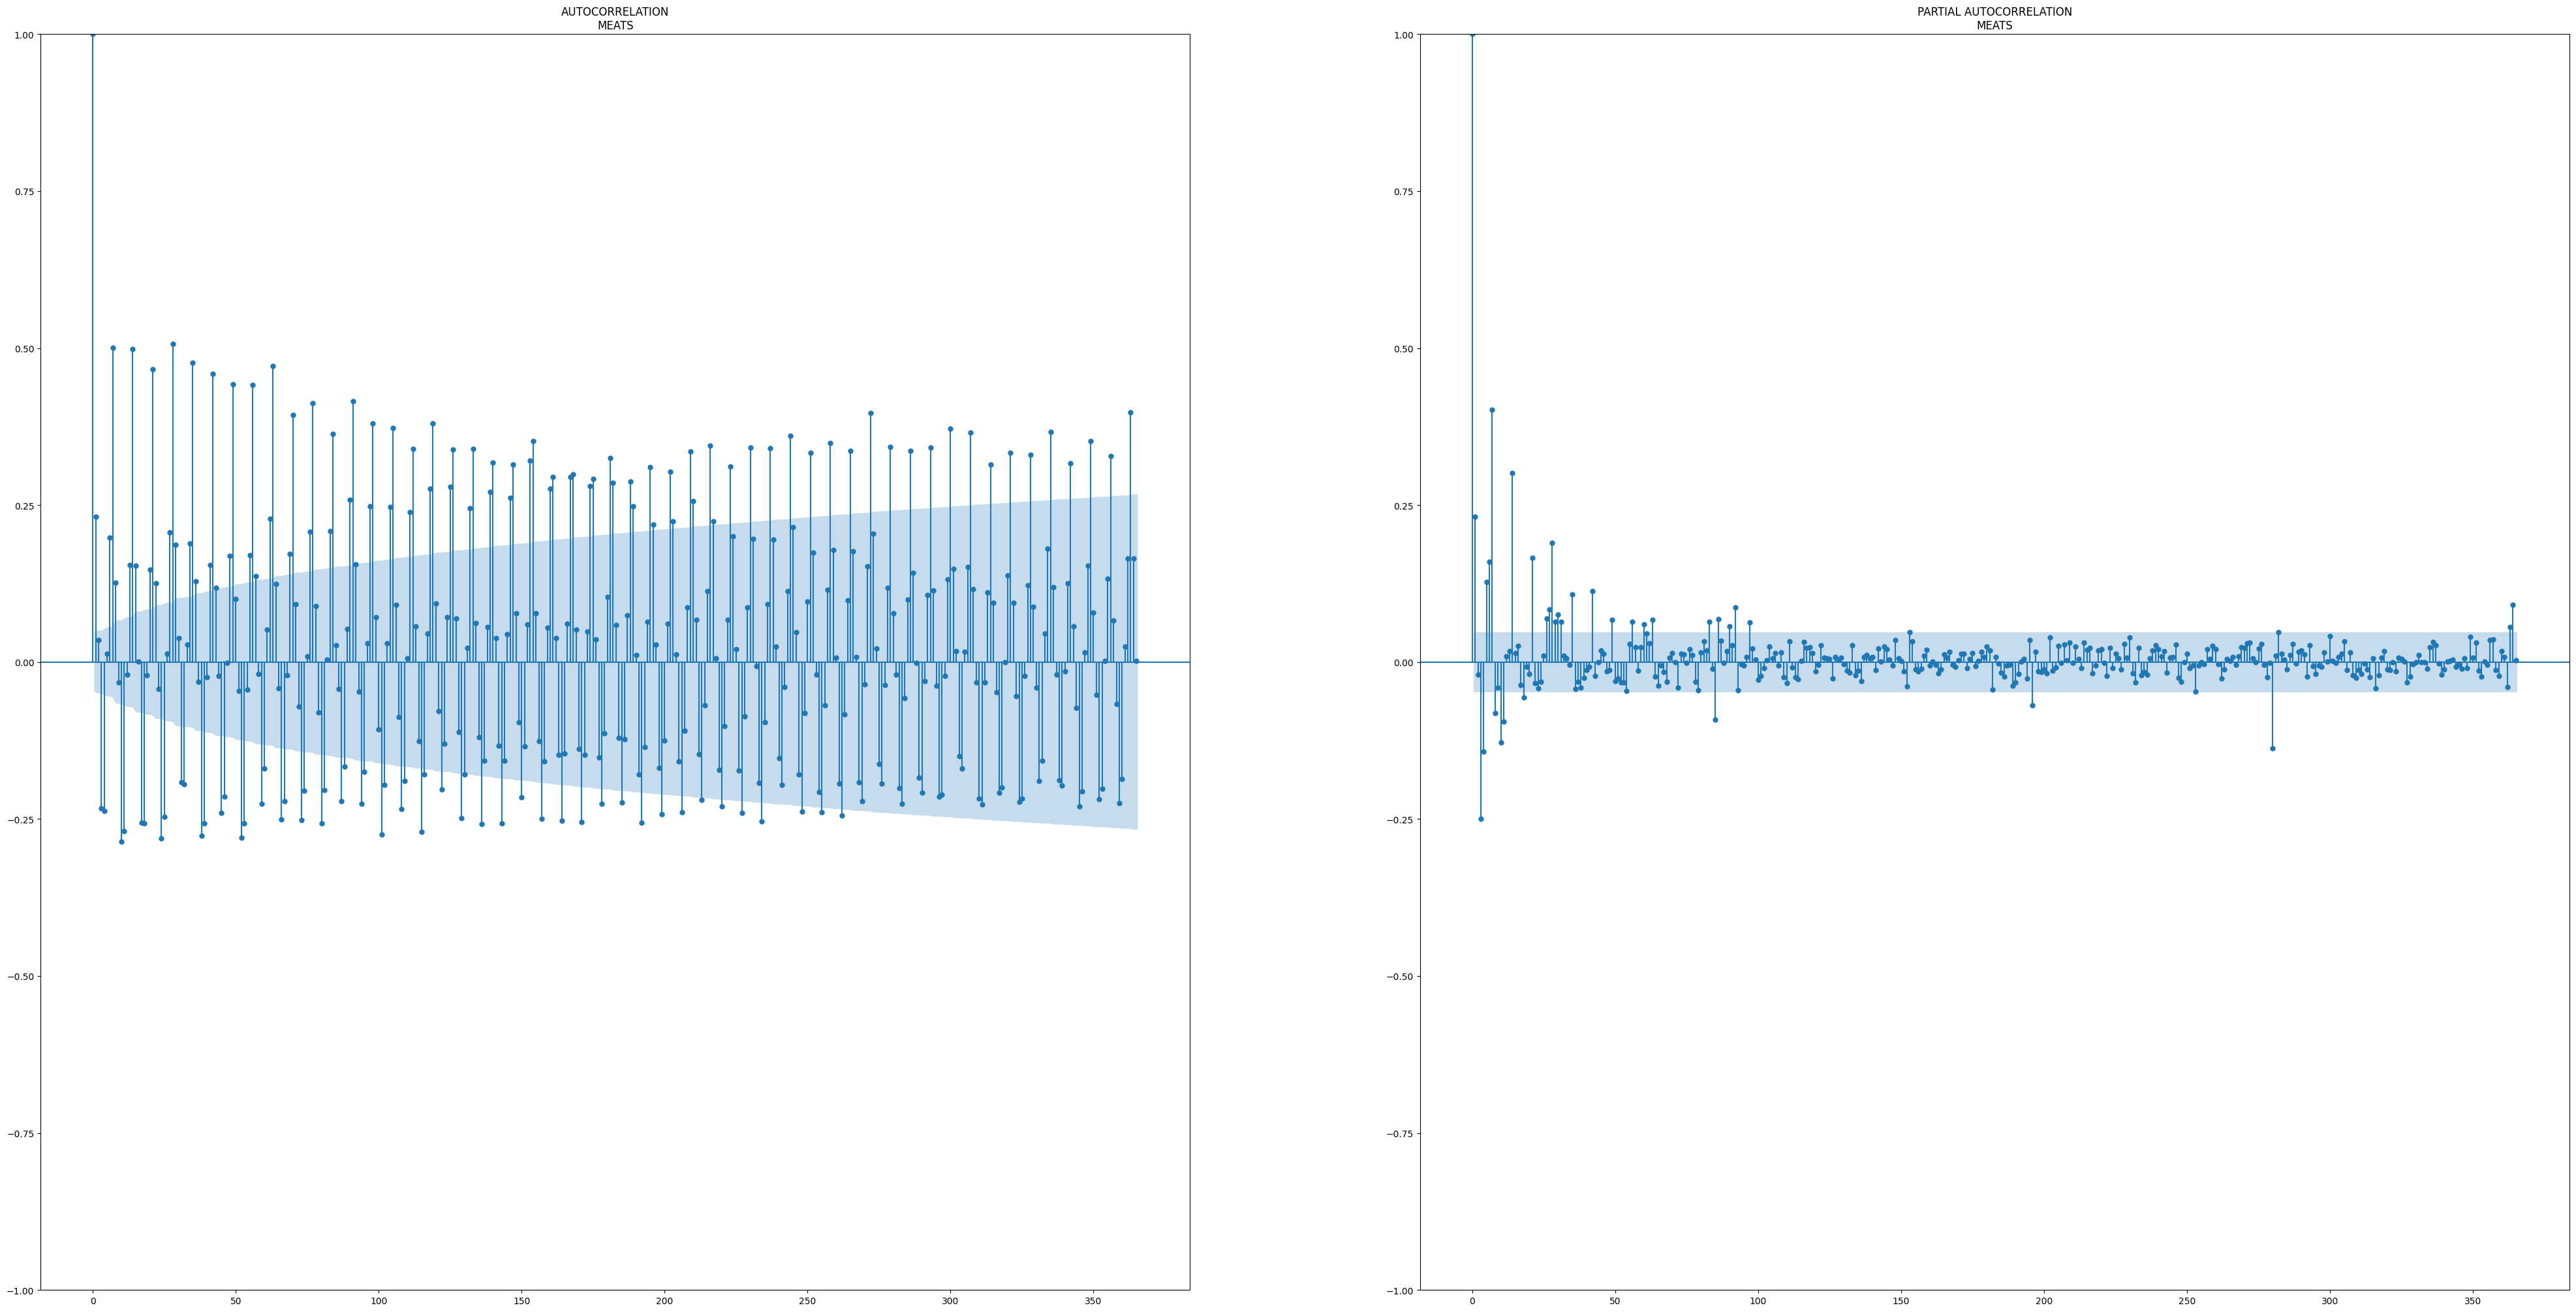

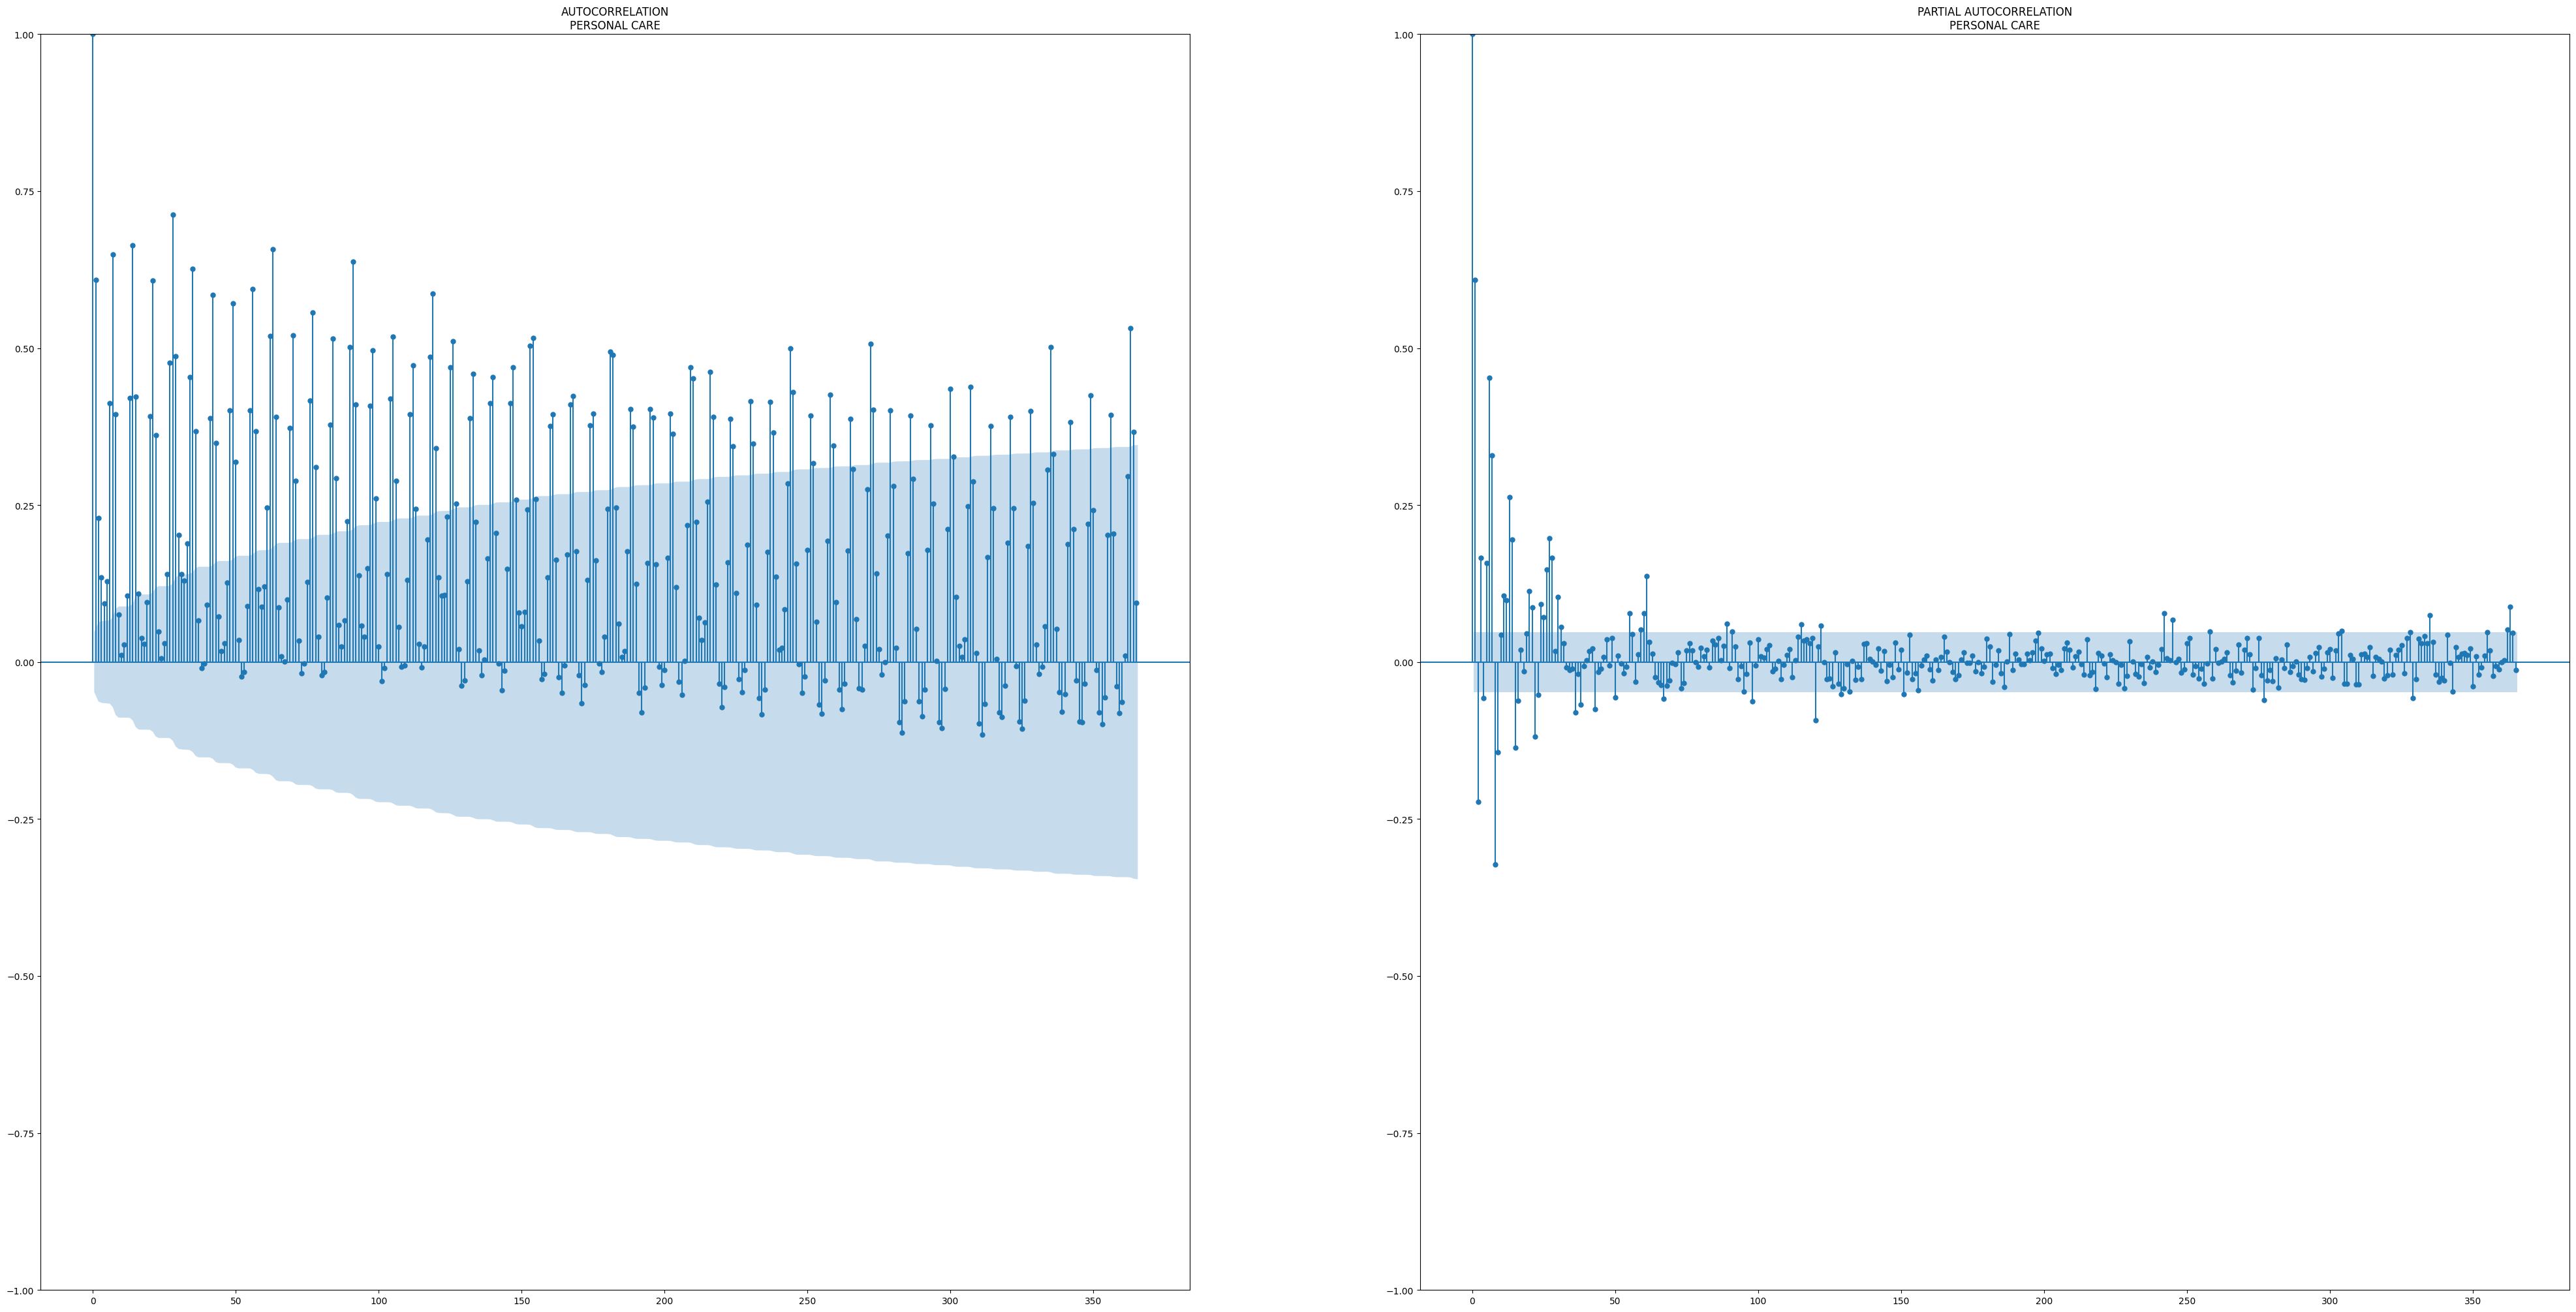

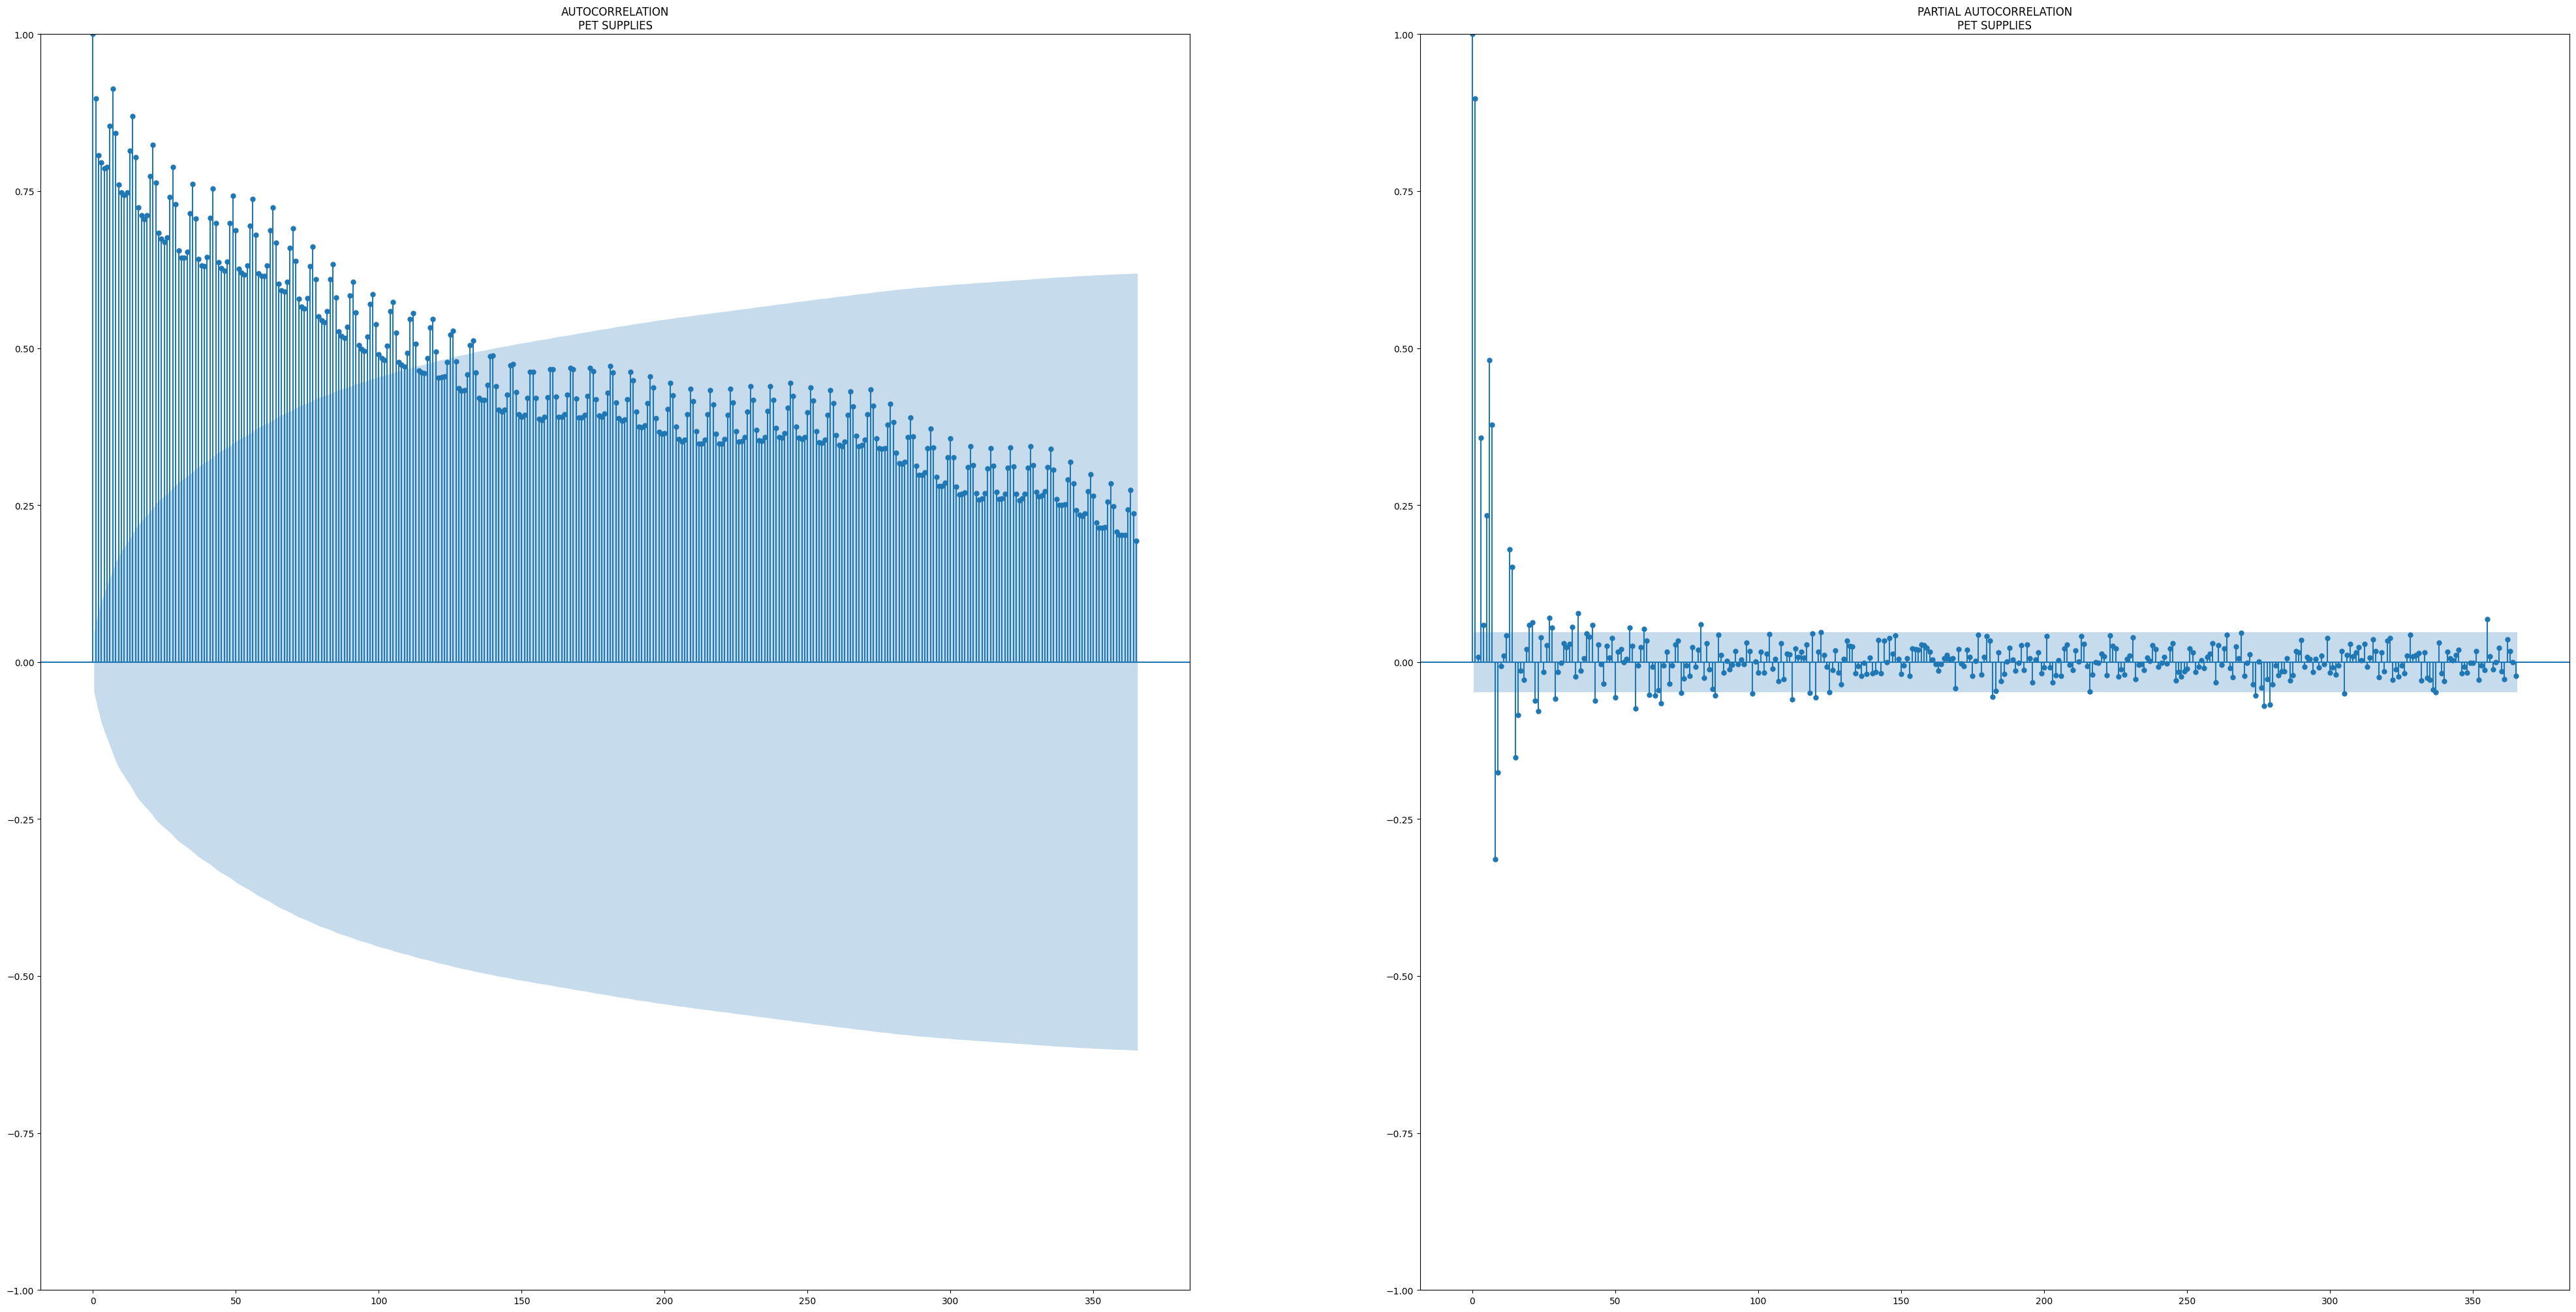

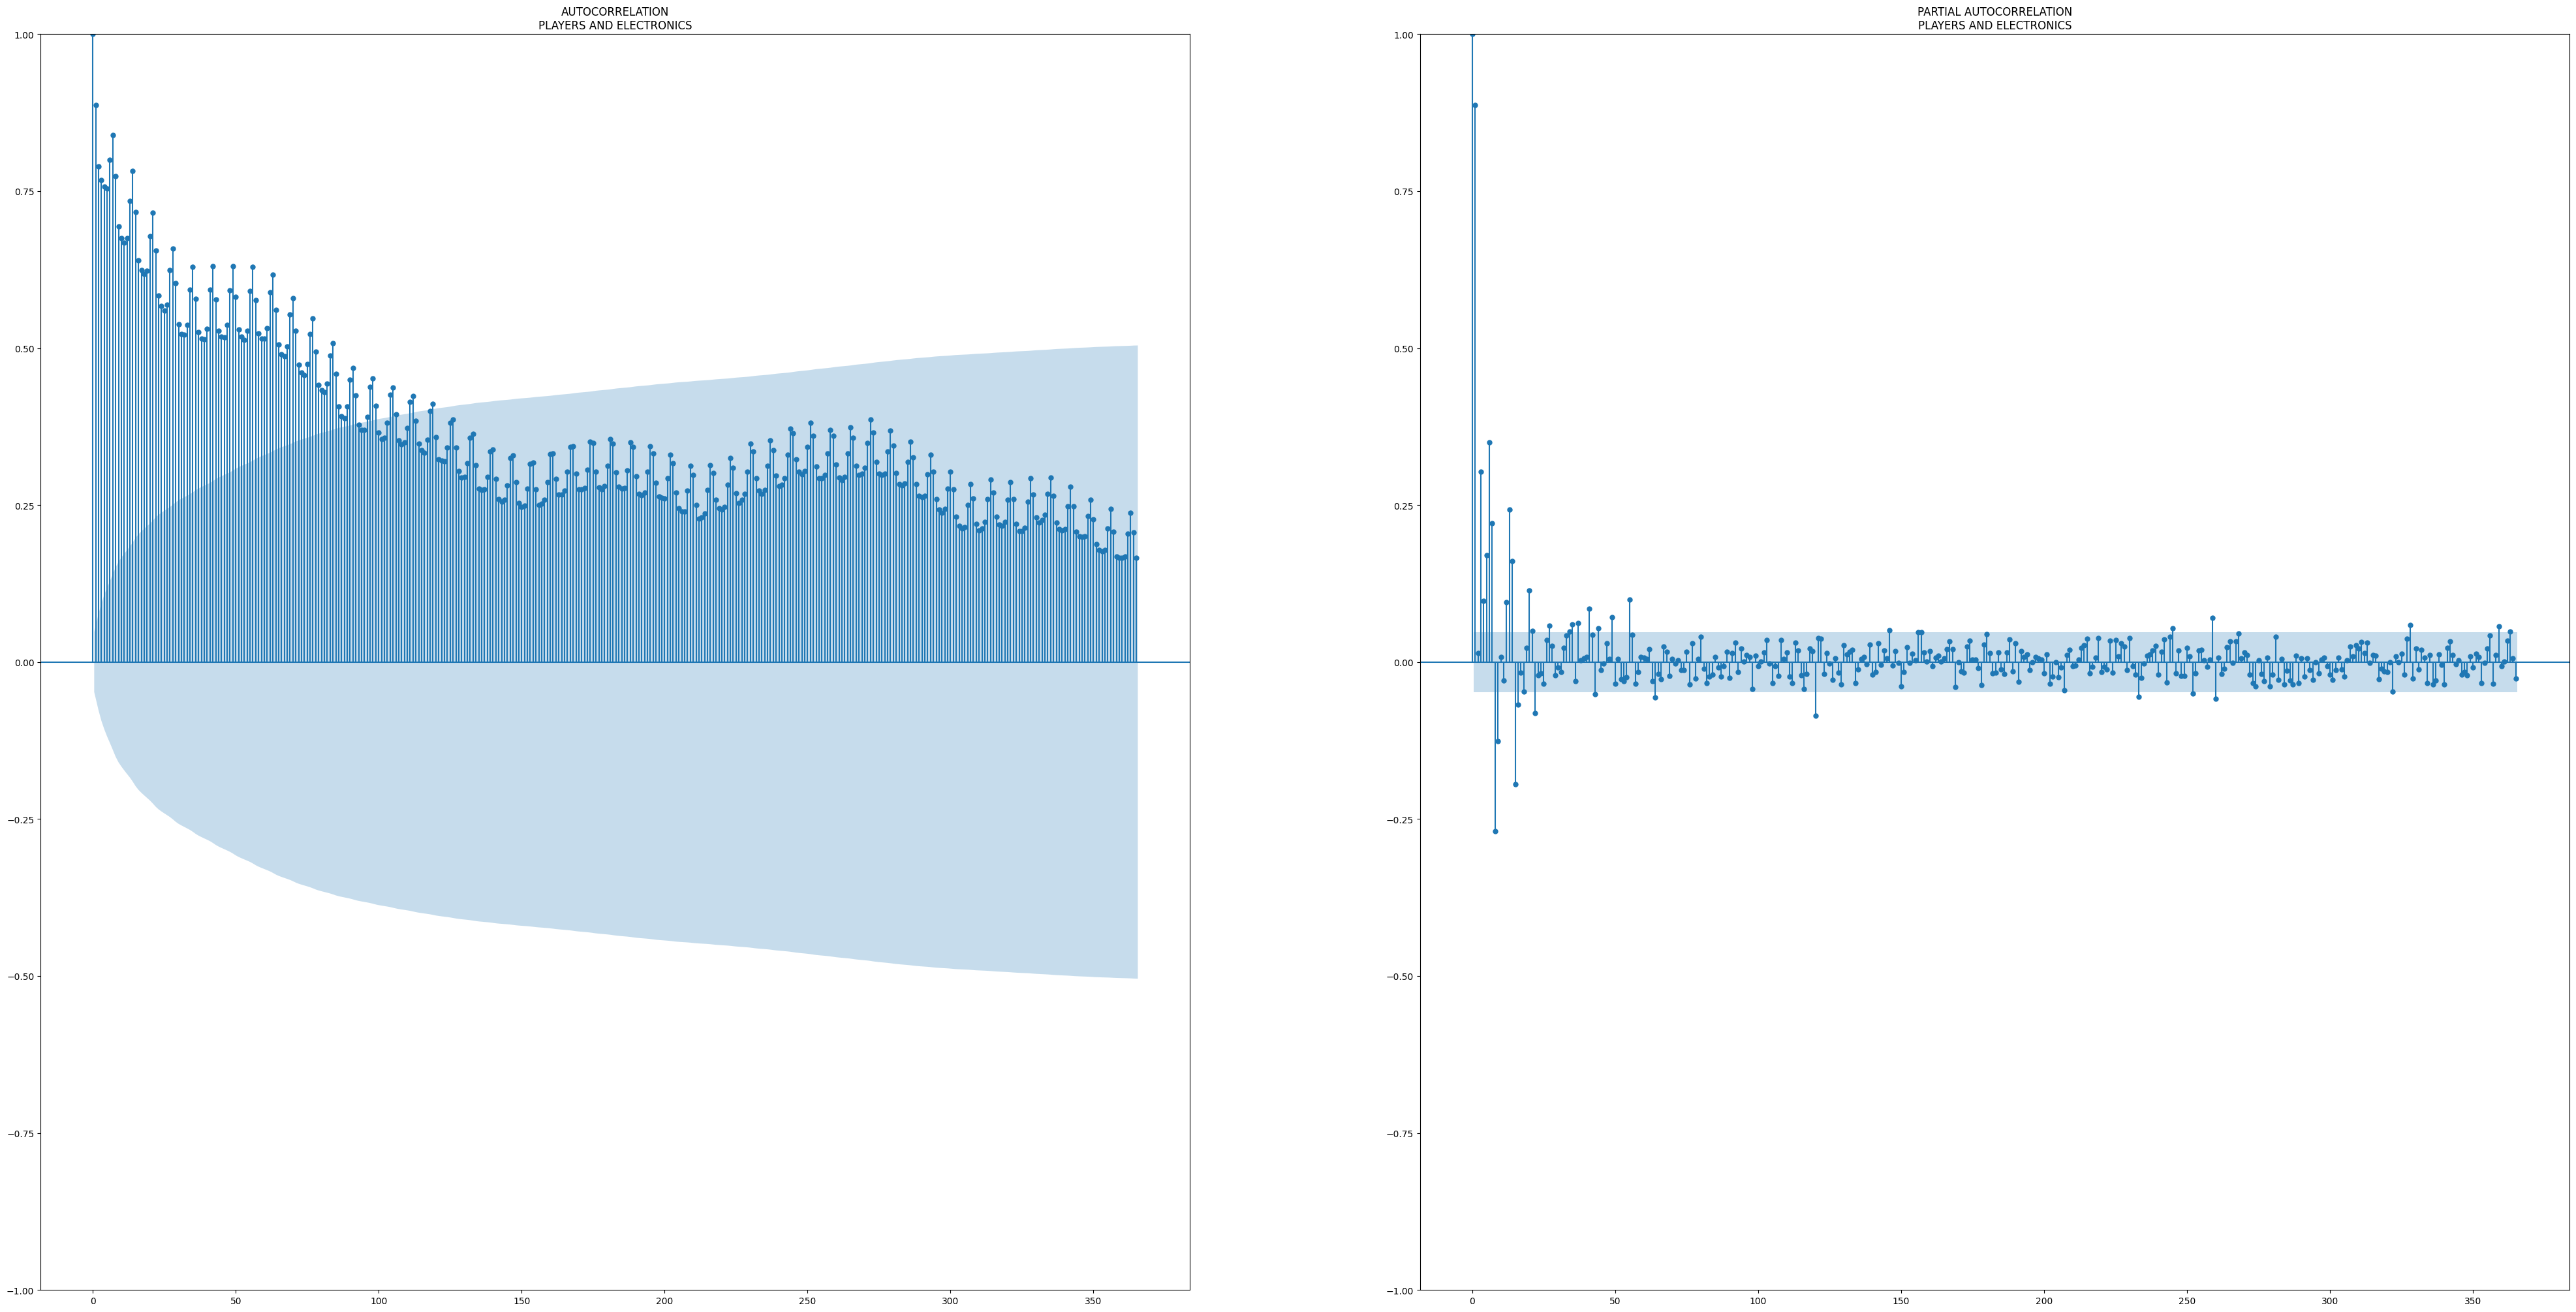

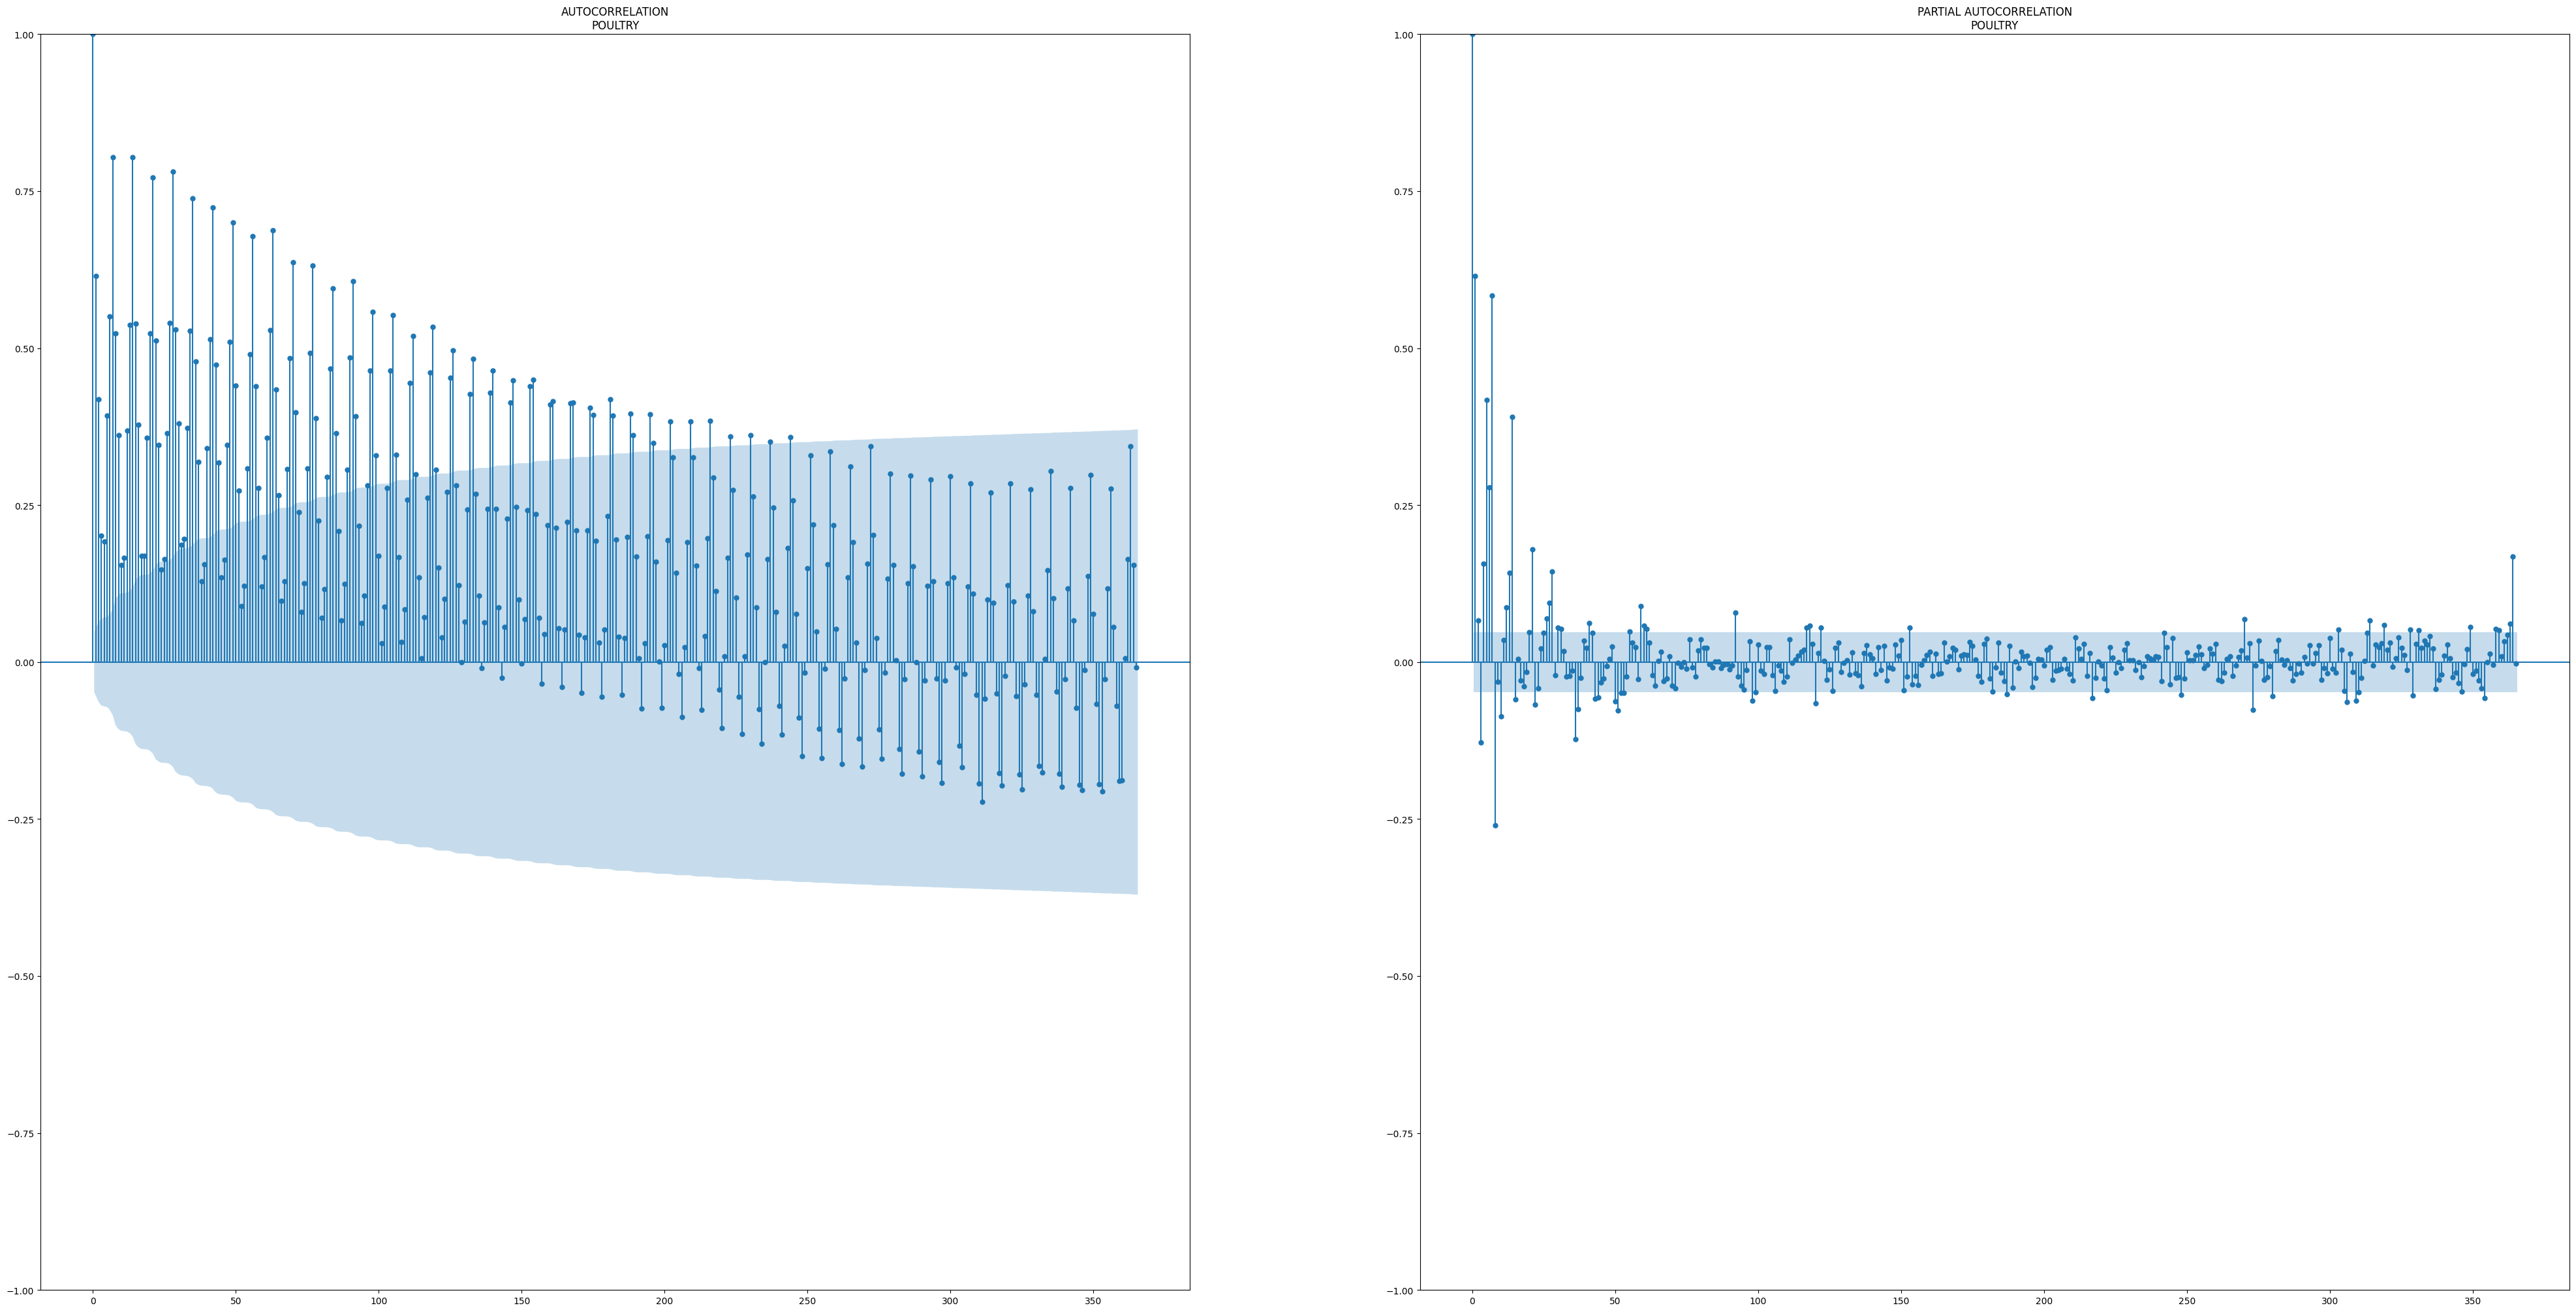

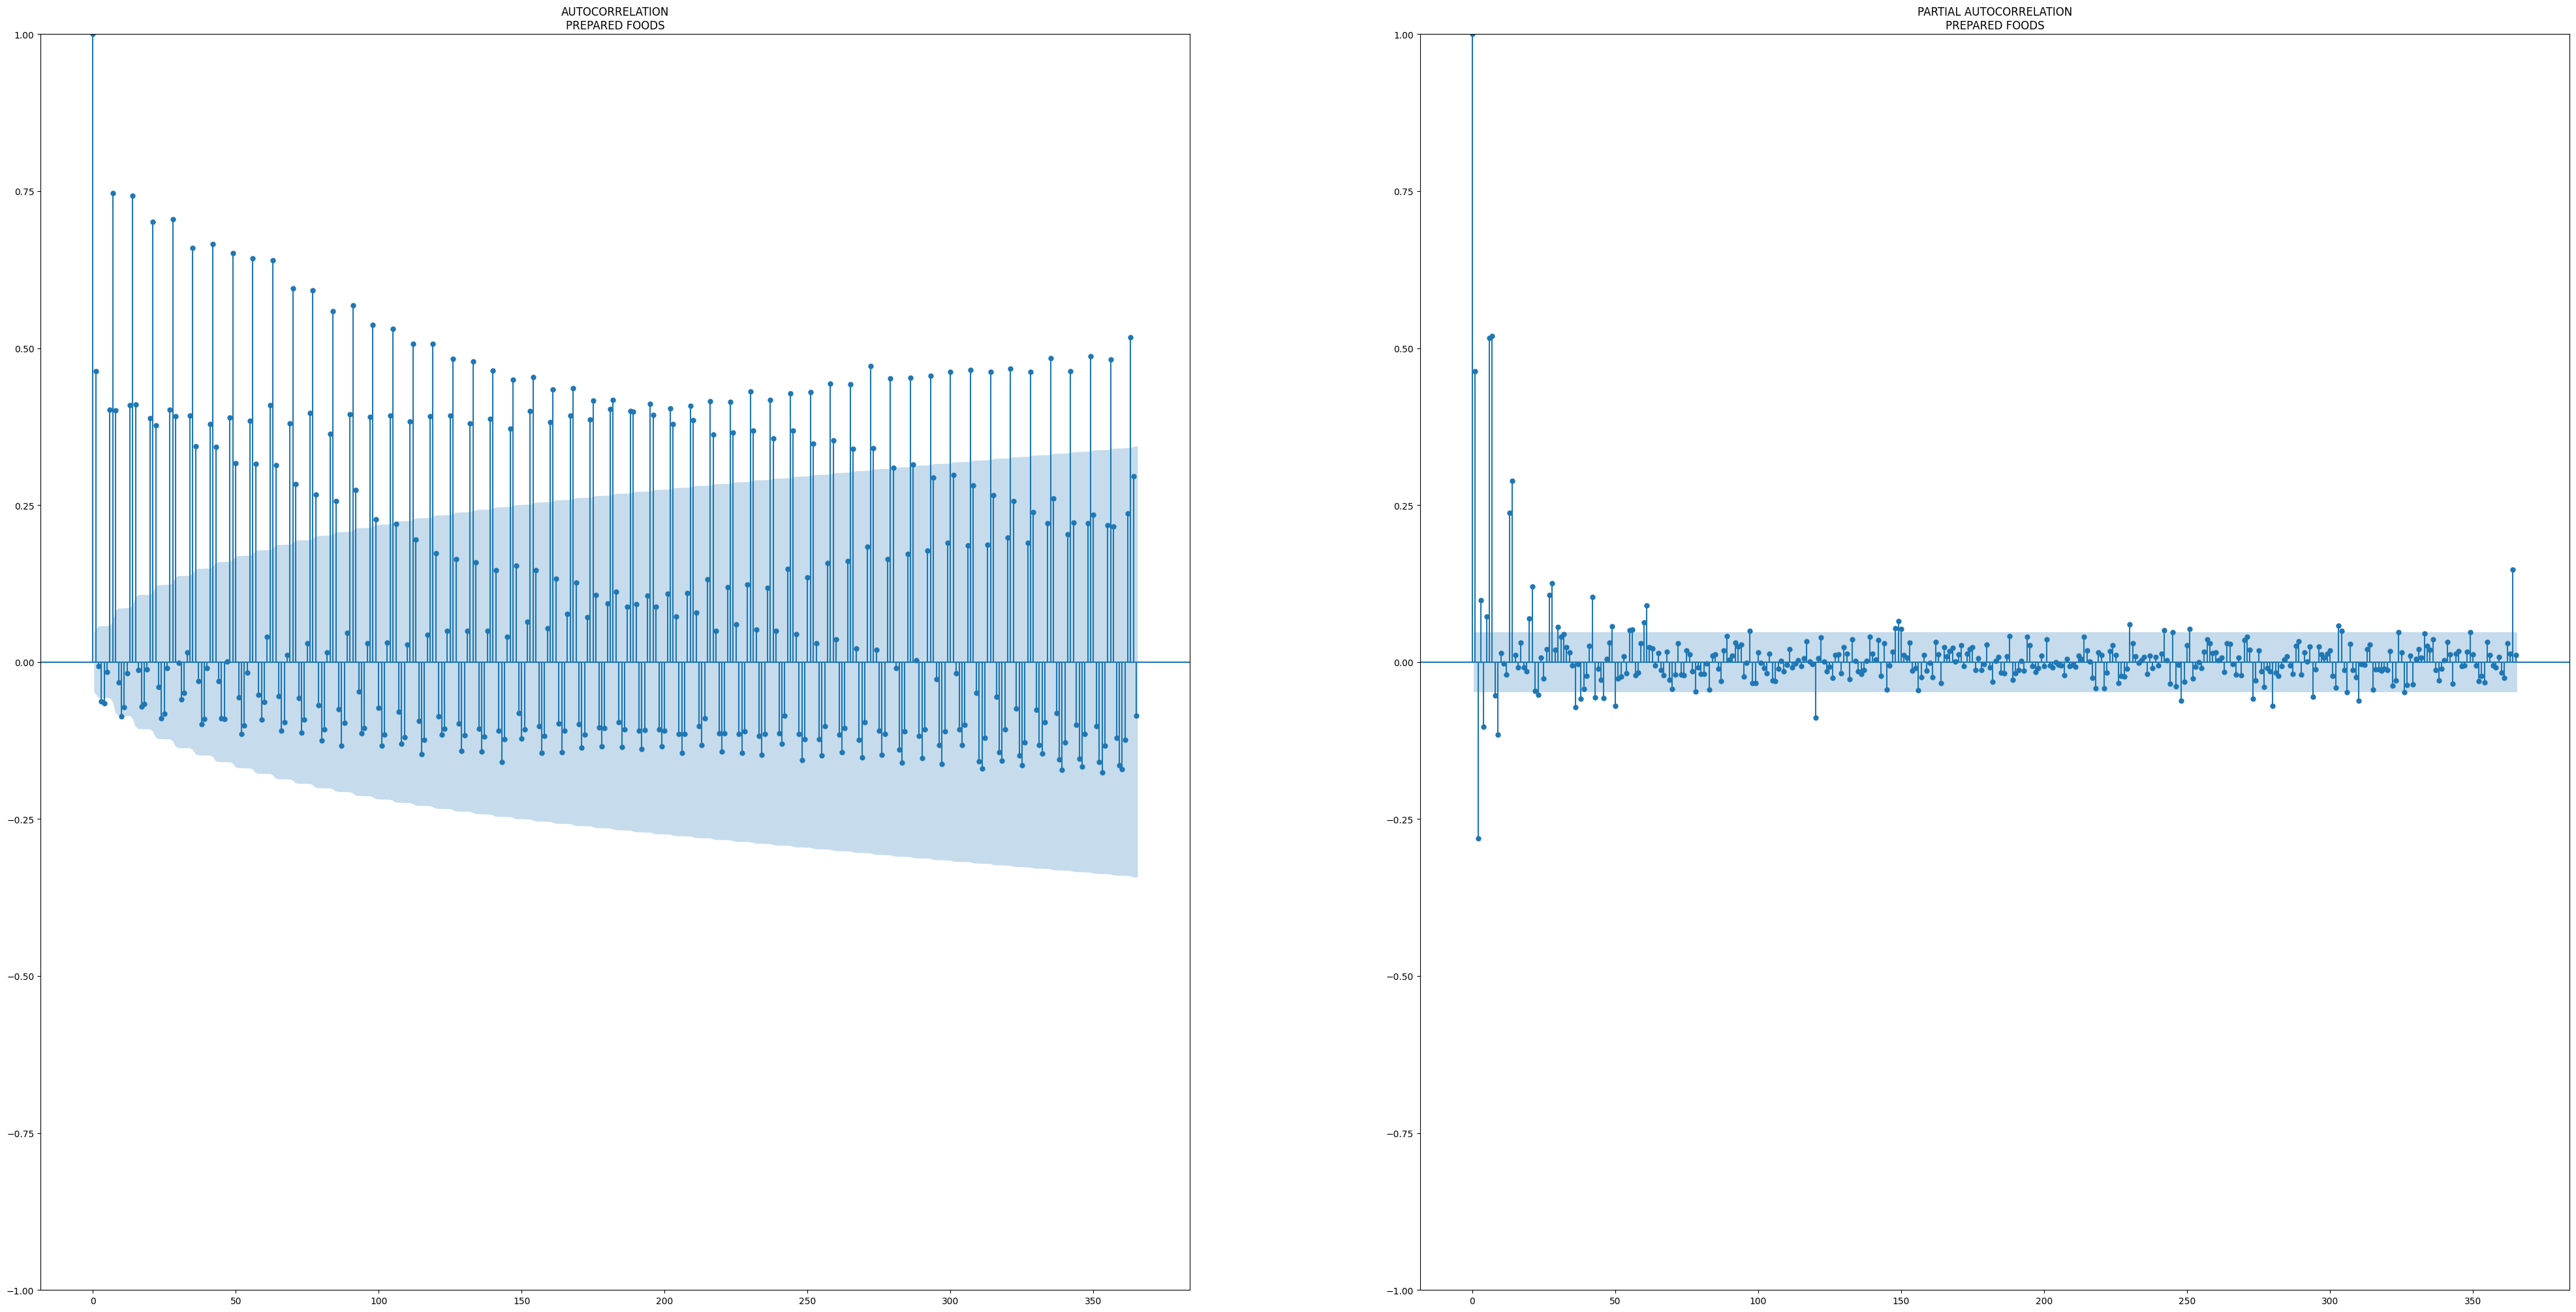

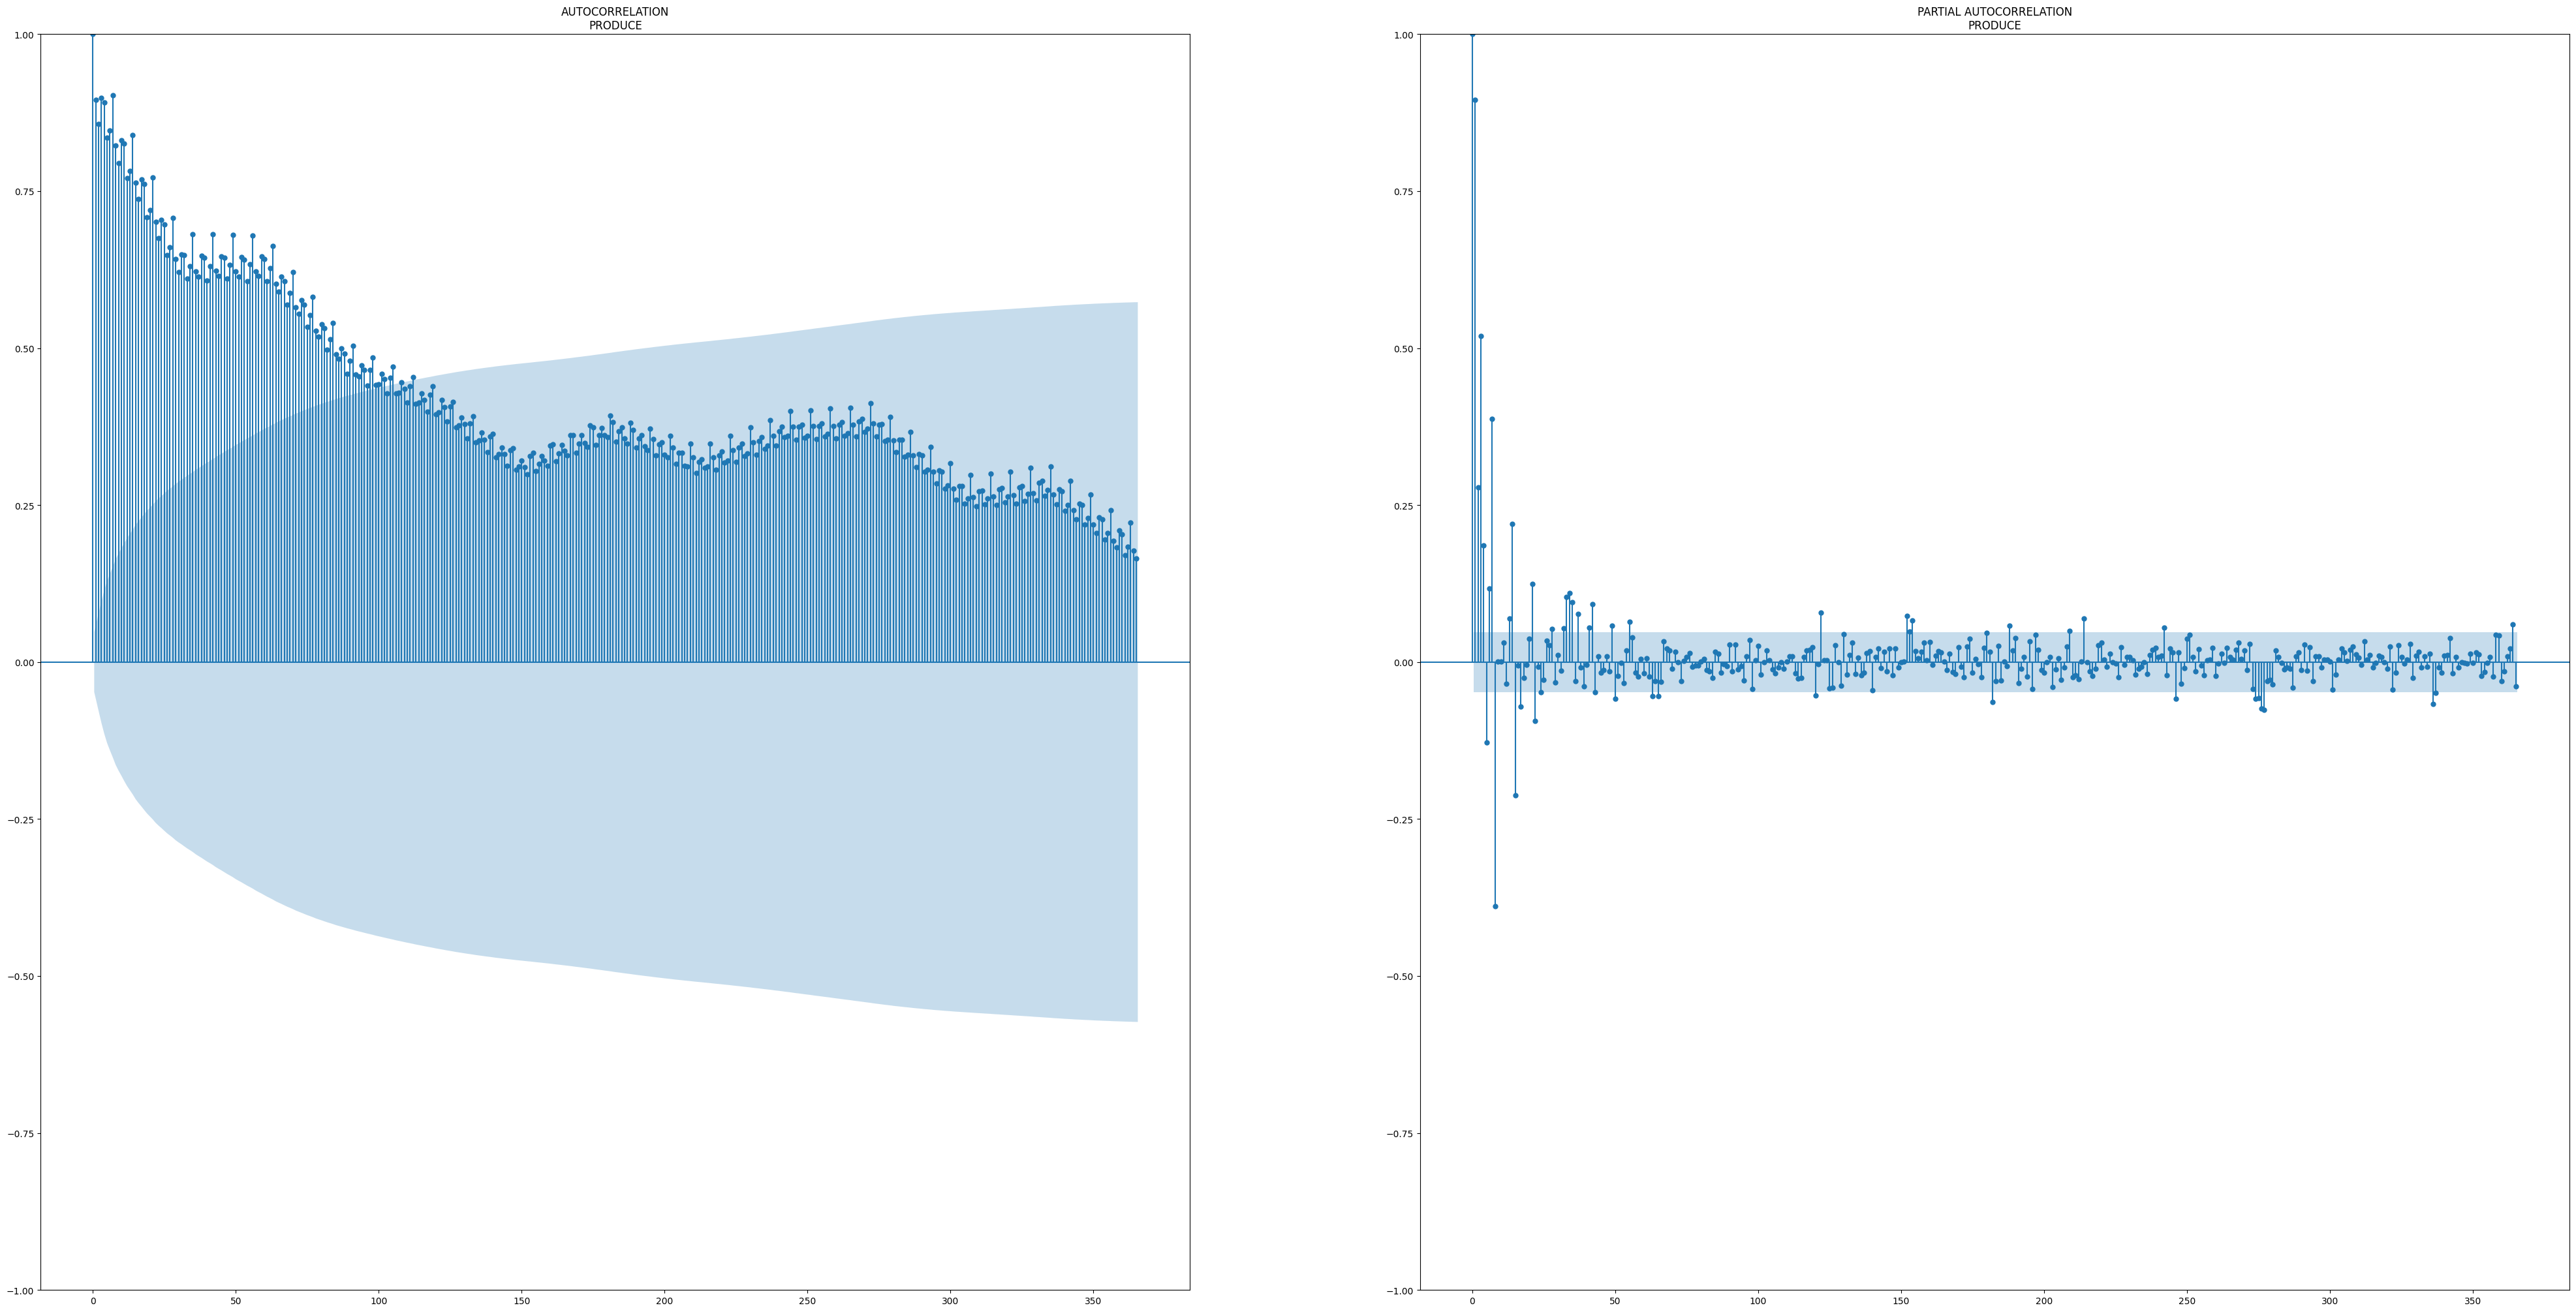

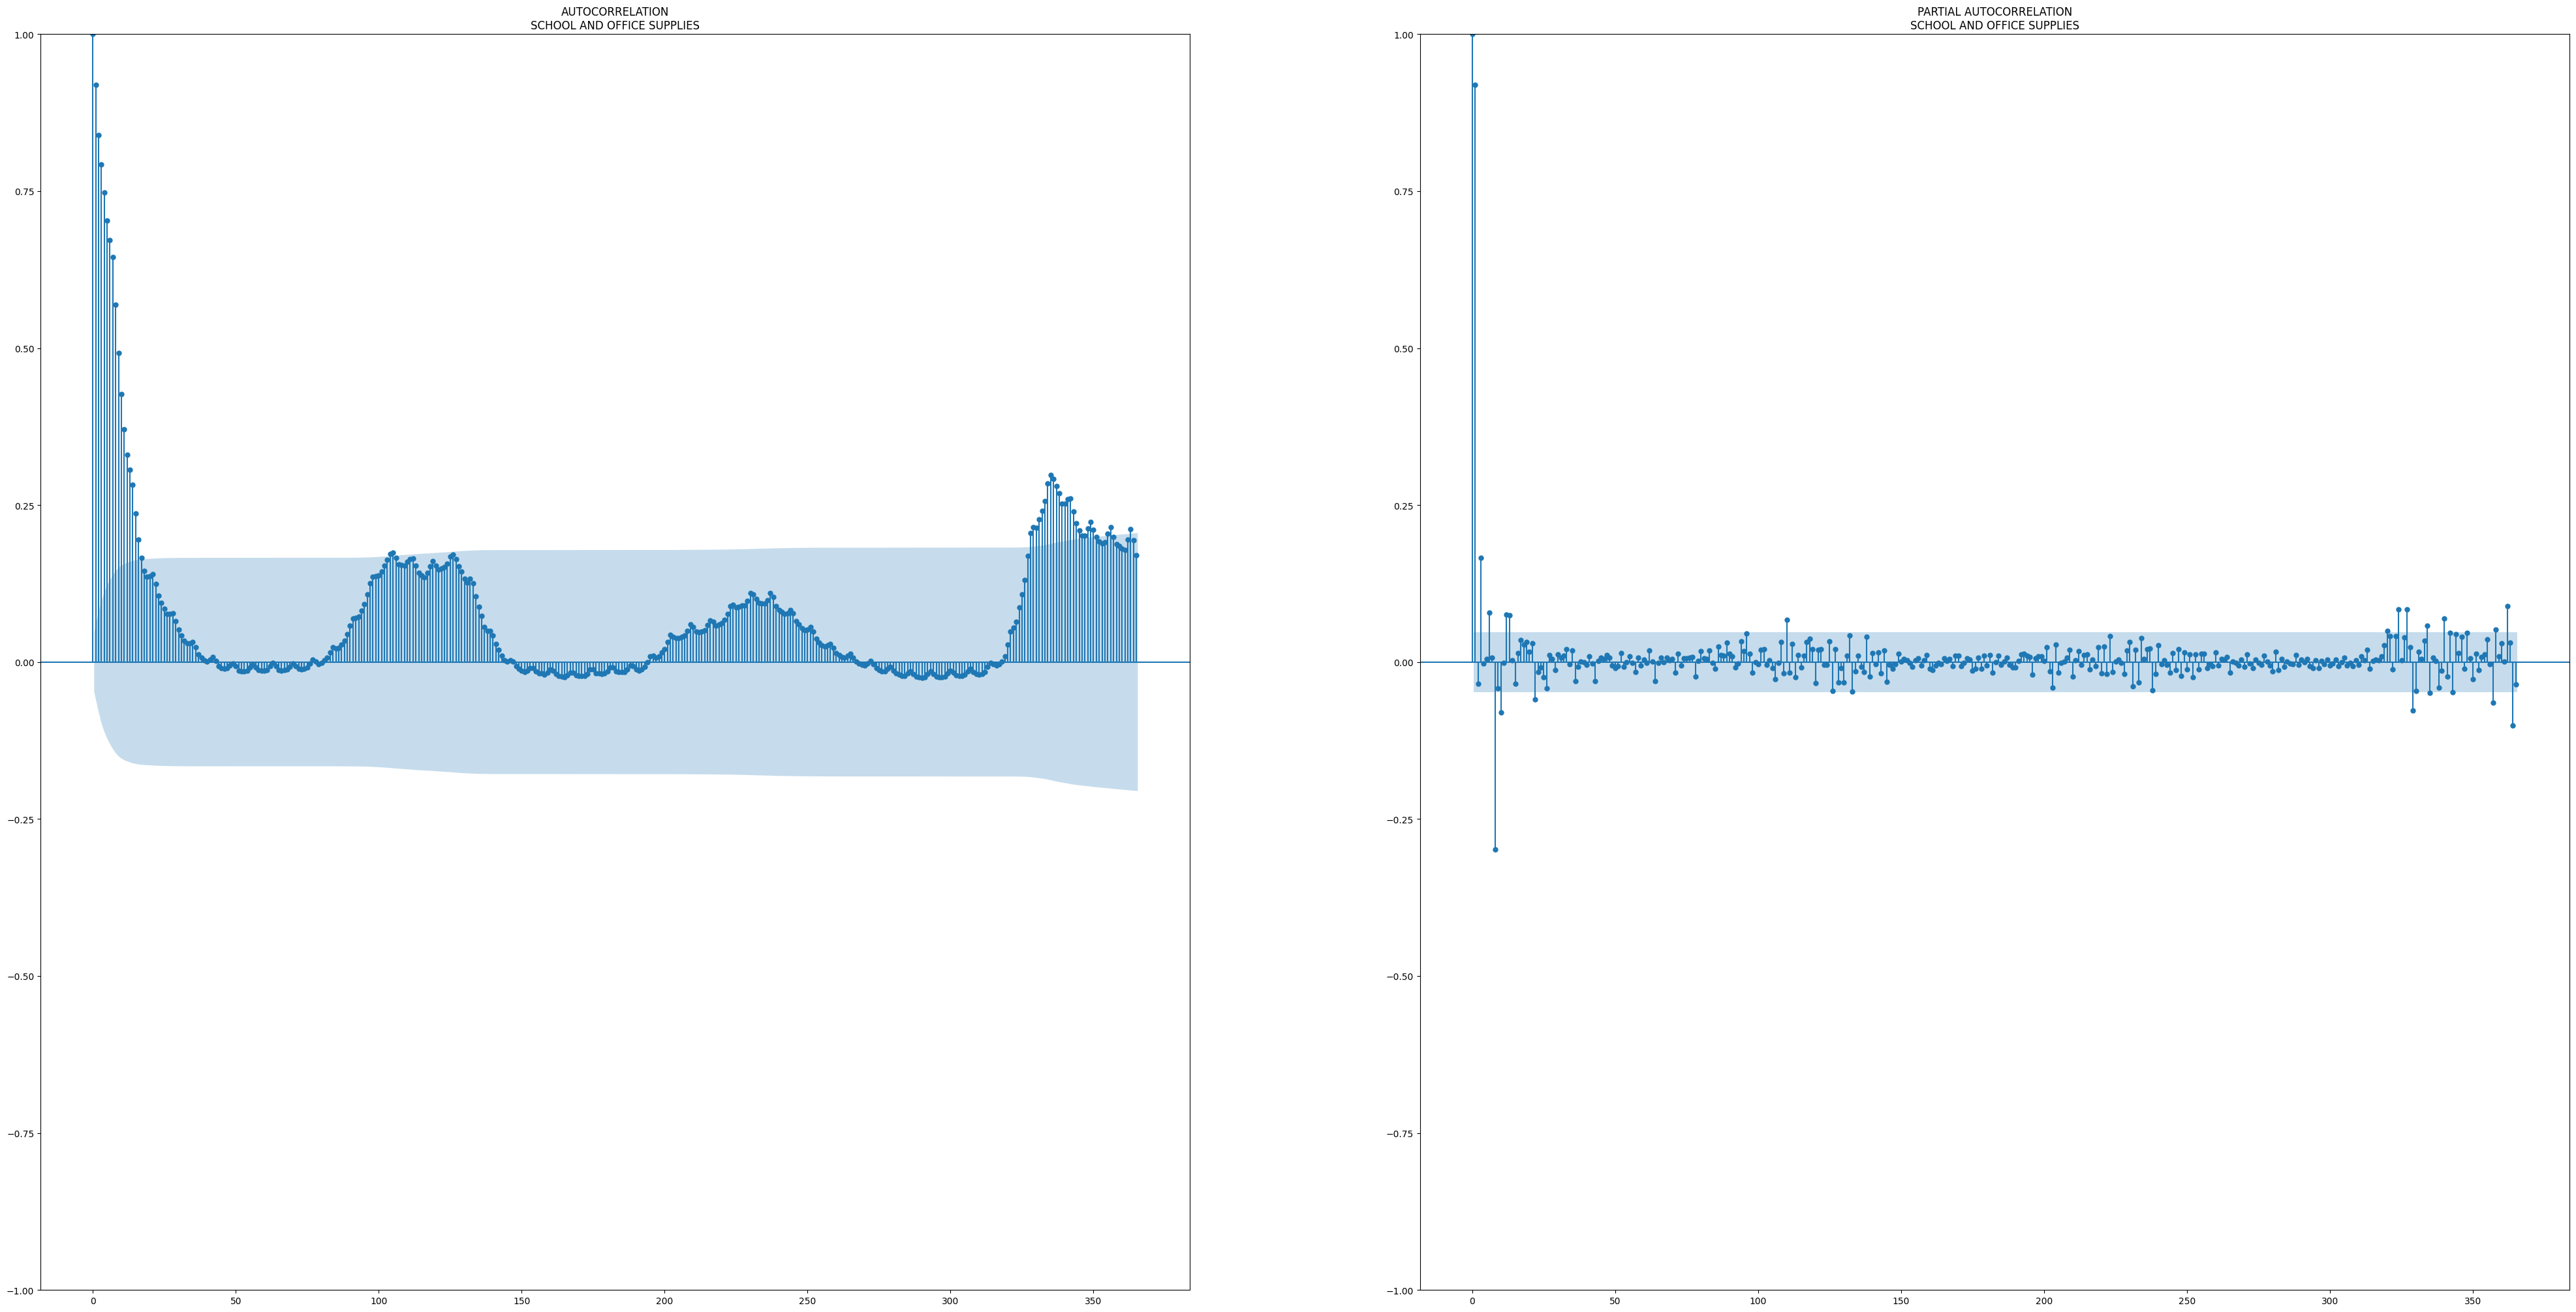

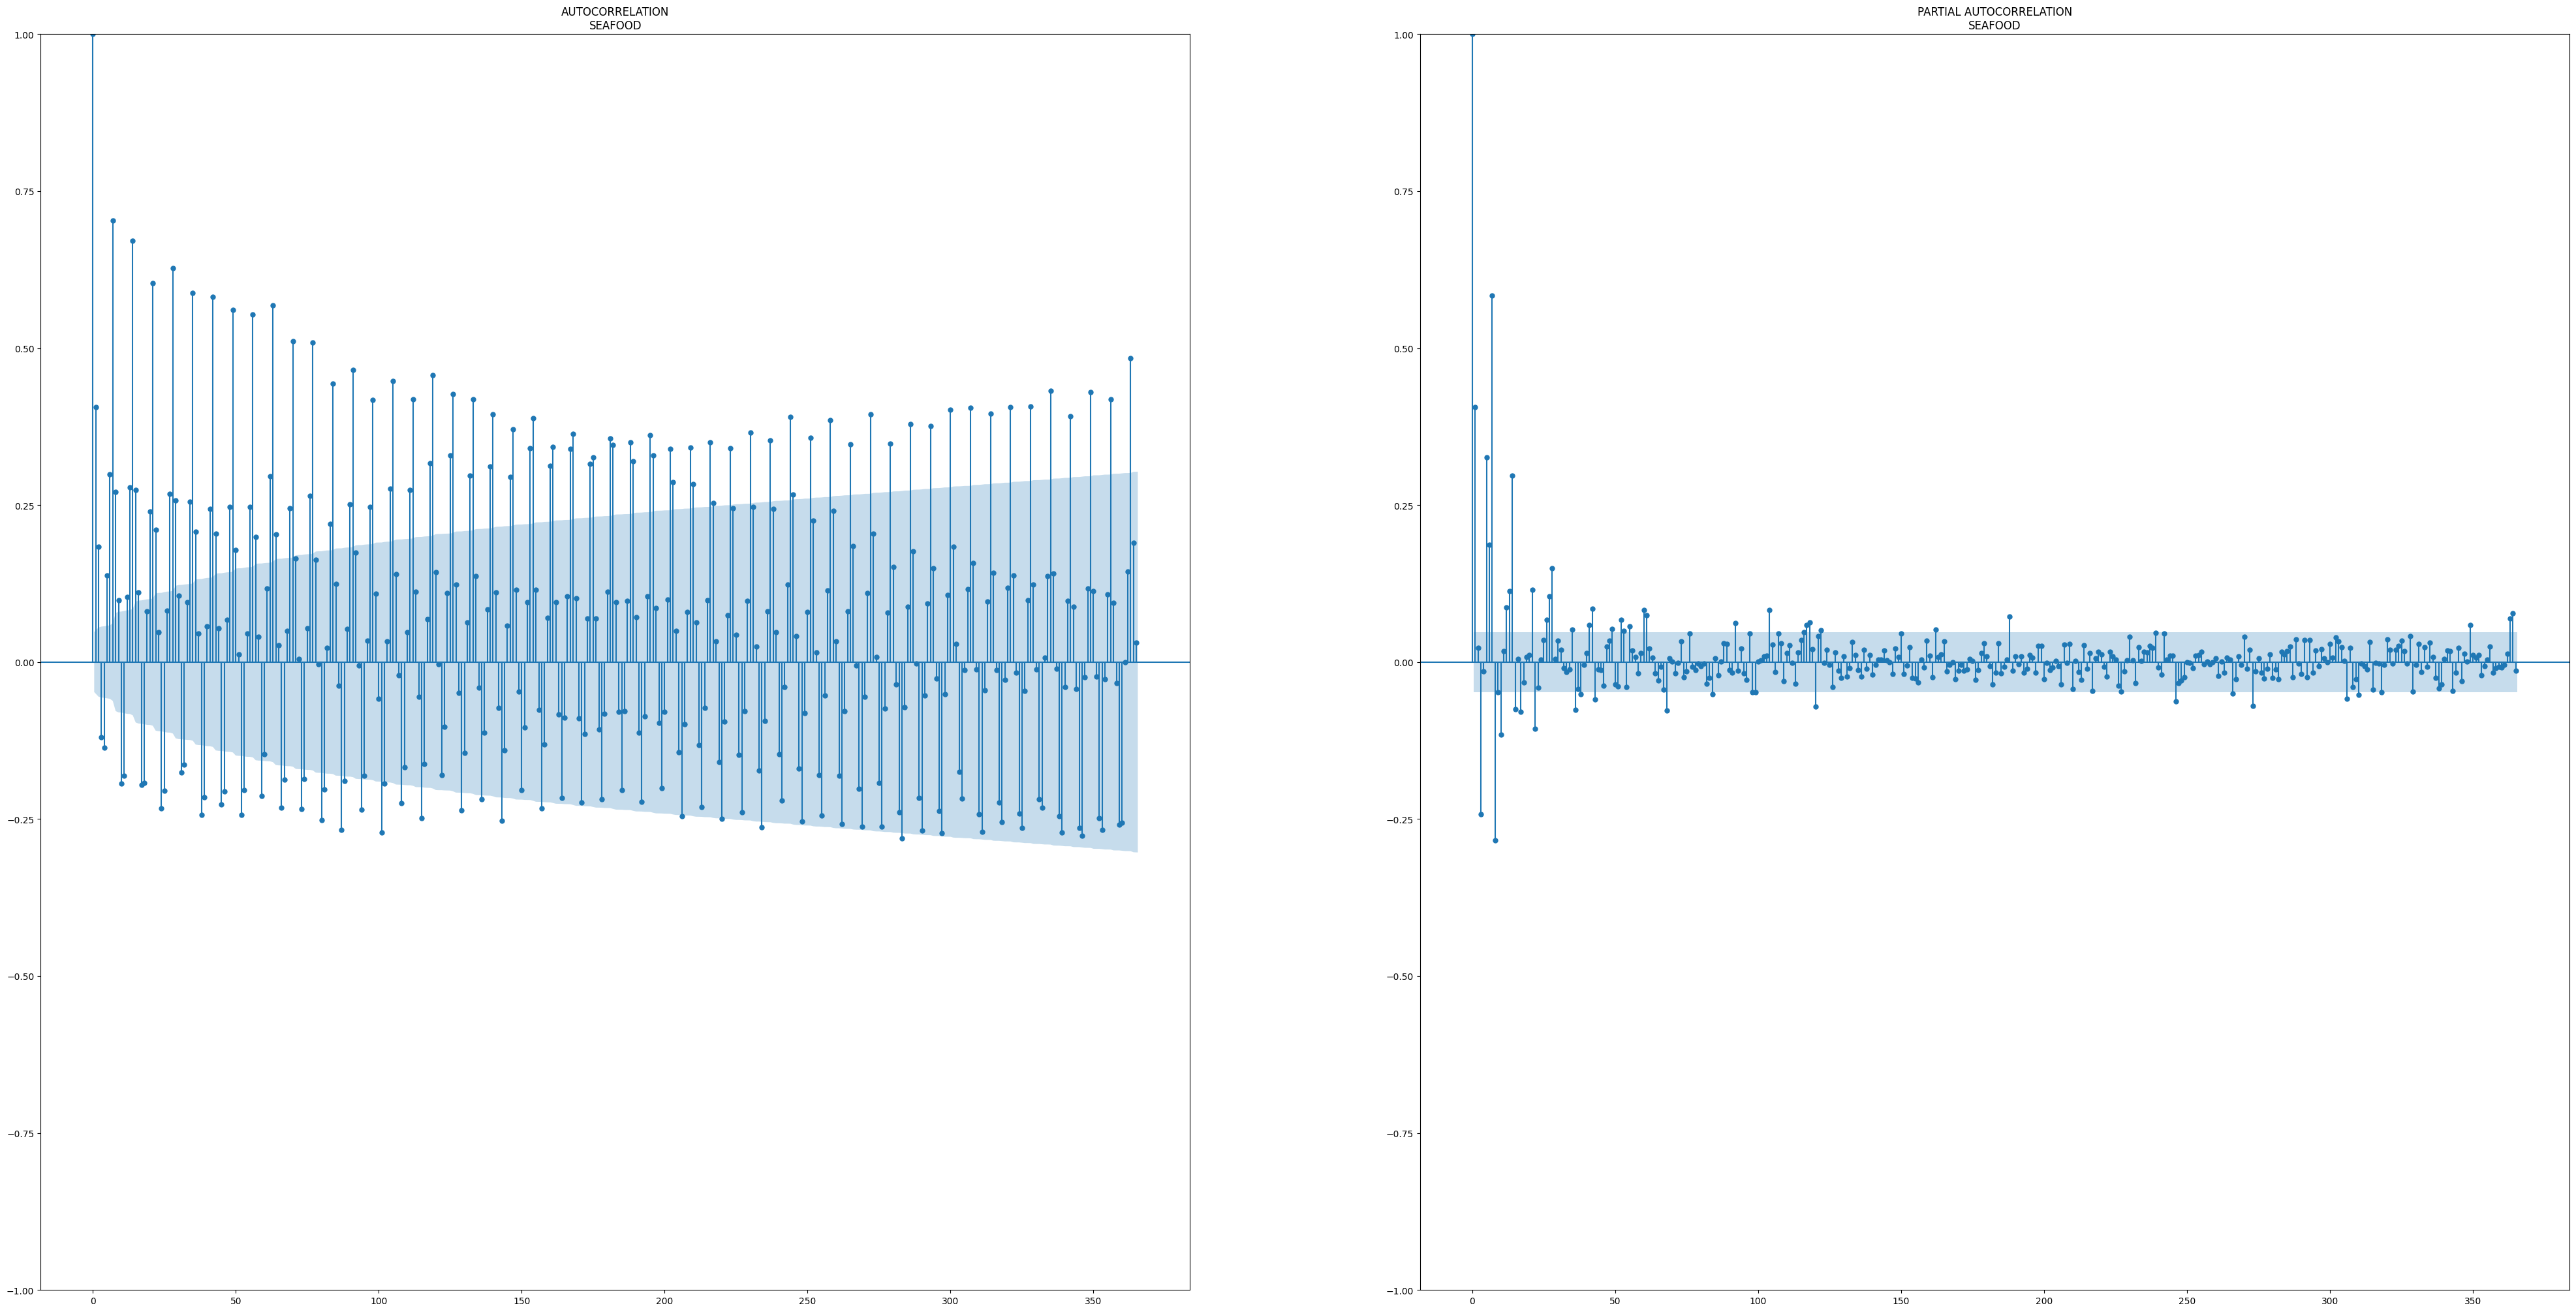

In [3]:
a = df_train[(df_train.sales.notnull())].groupby(['date', 'family']).sales.mean().reset_index().set_index('date')
for num, i in enumerate(a.family.unique()):
    try:
        fig, ax = plt.subplots(1,2,figsize=(50,25))
        temp = a[(a.family == i)]
        sm.graphics.tsa.plot_acf(temp.sales, lags=365, ax=ax[0], title = 'AUTOCORRELATION\n' + i)
        sm.graphics.tsa.plot_pacf(temp.sales, lags=365, ax=ax[1], title = 'PARTIAL AUTOCORRELATION\n' + i)
    except:
        pass

## LAG PLOTS

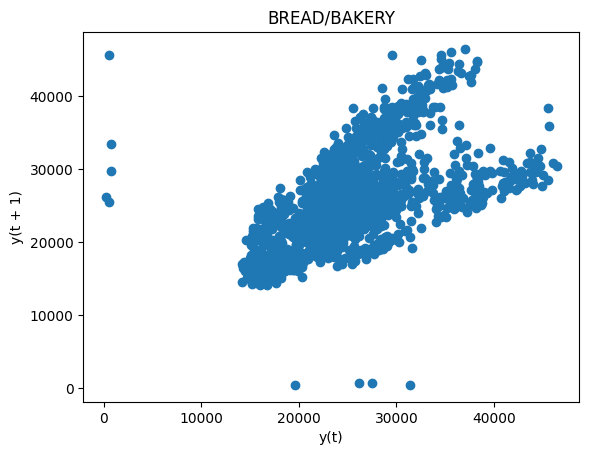

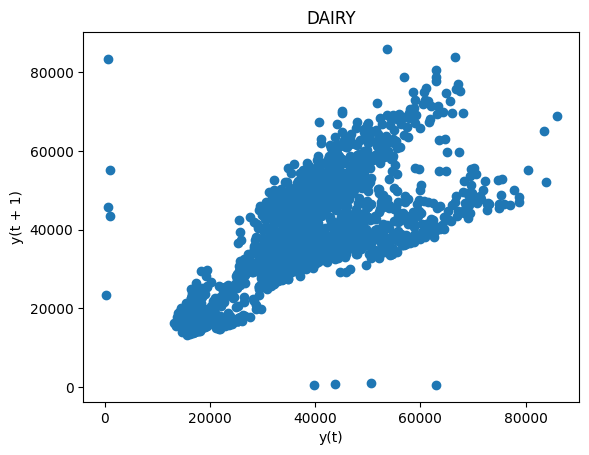

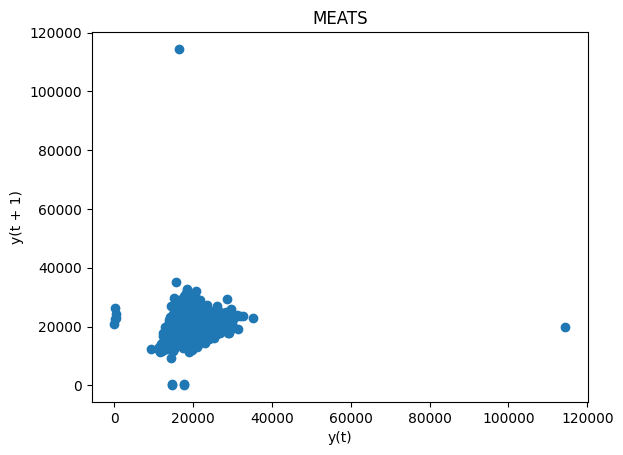

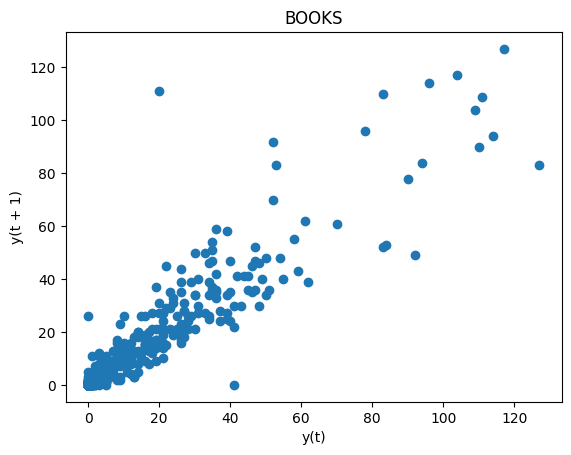

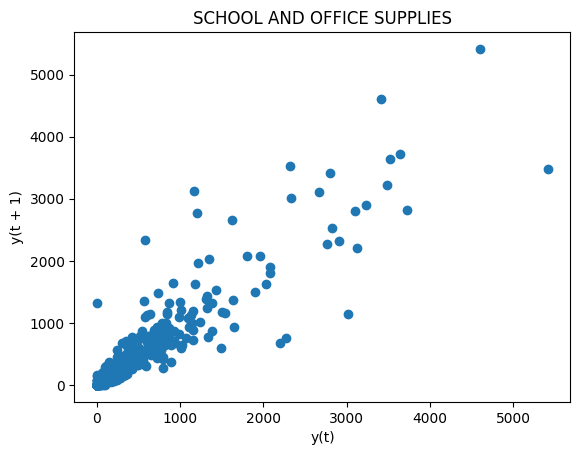

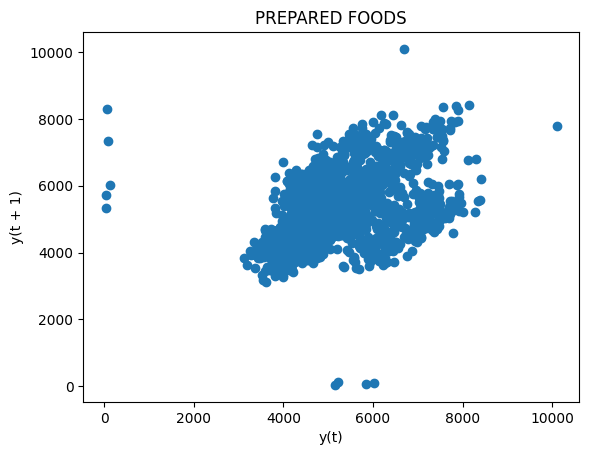

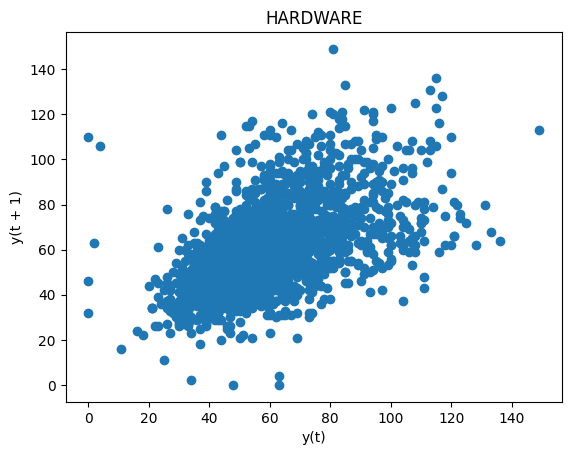

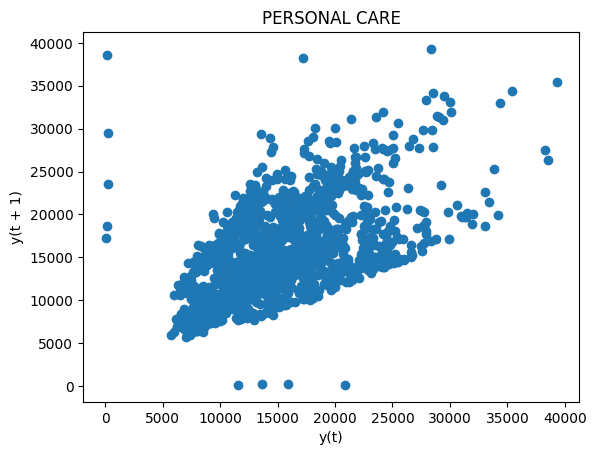

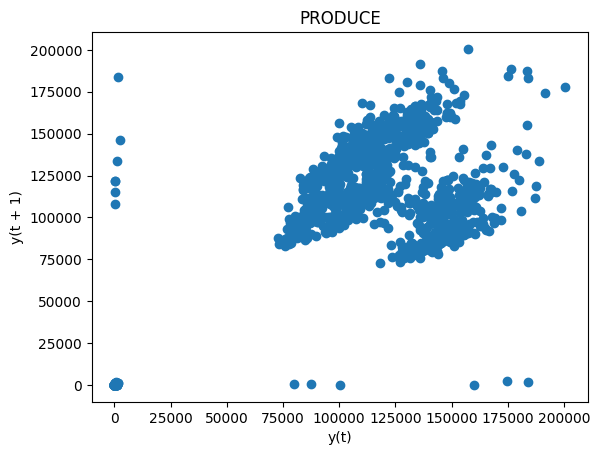

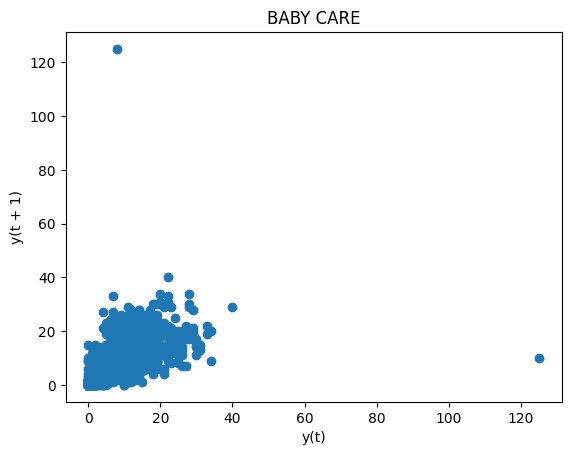

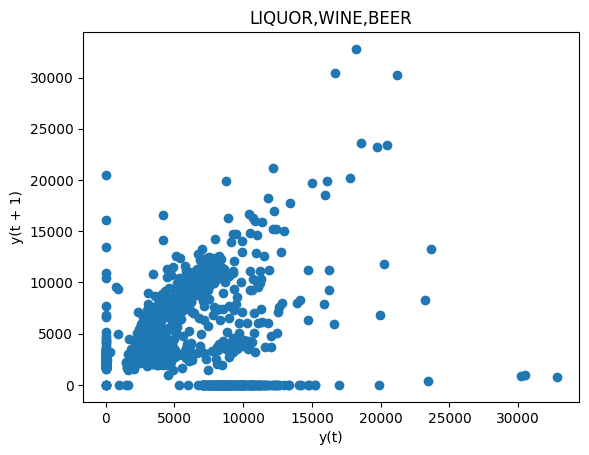

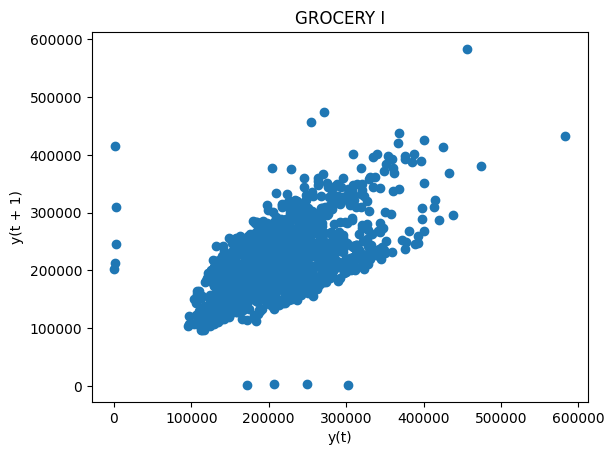

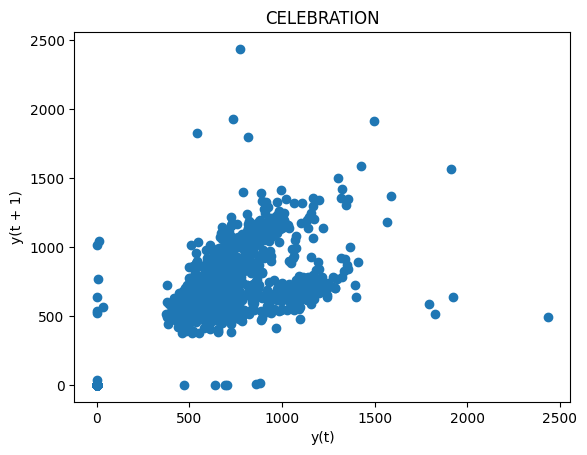

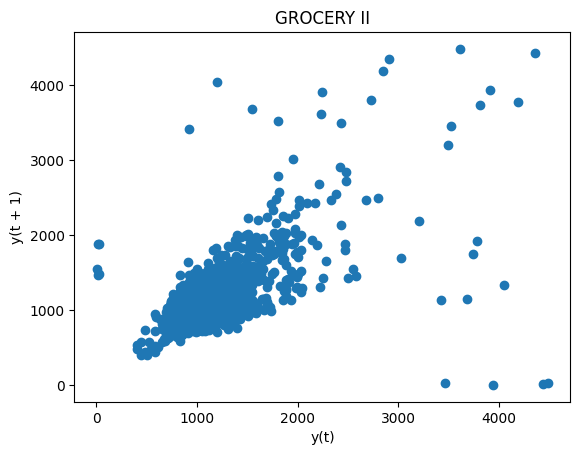

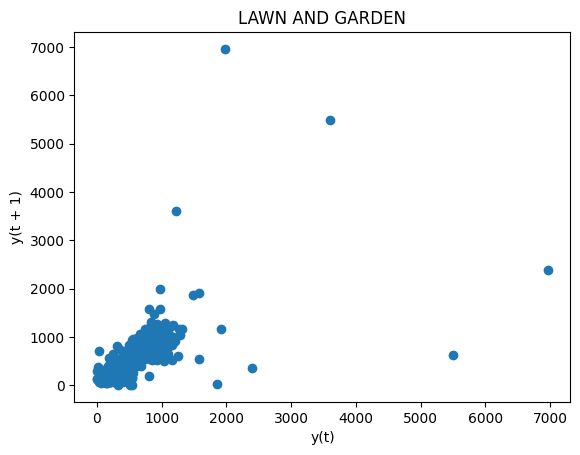

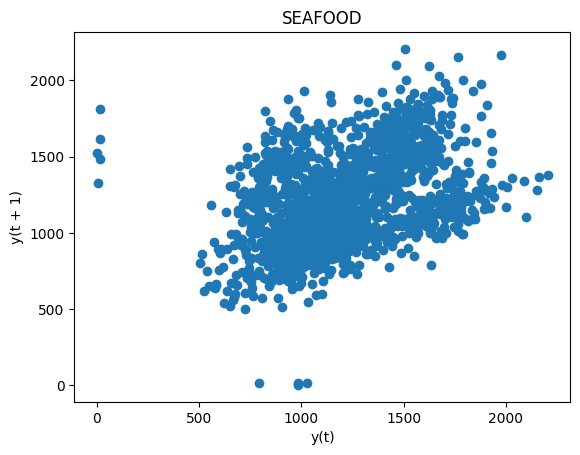

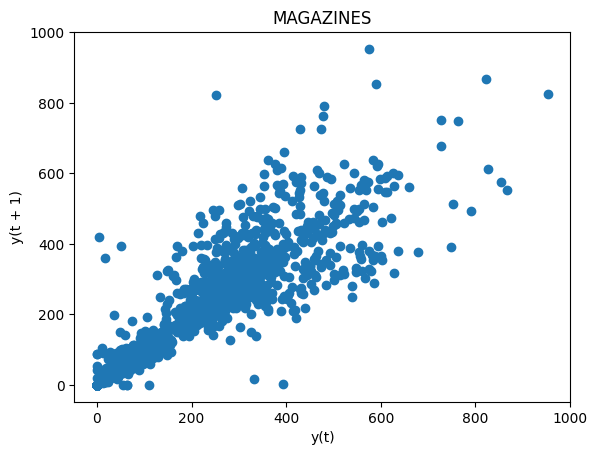

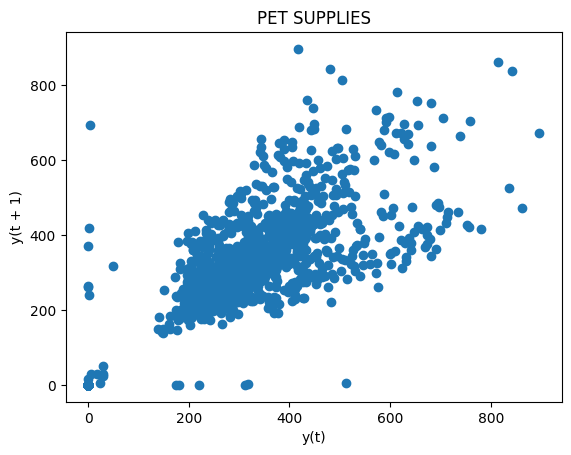

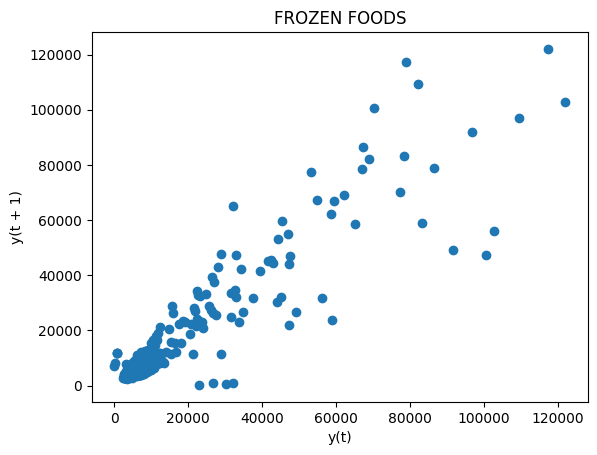

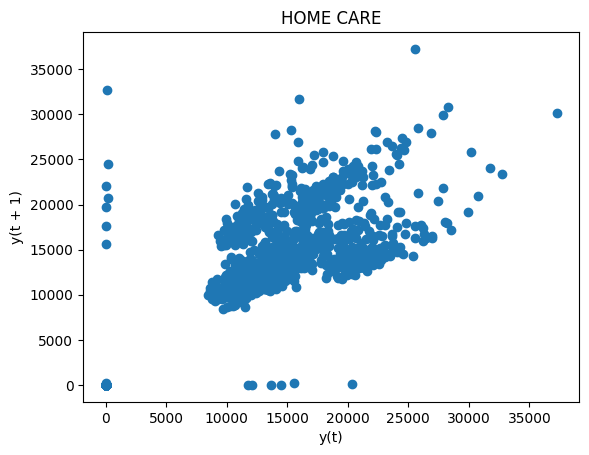

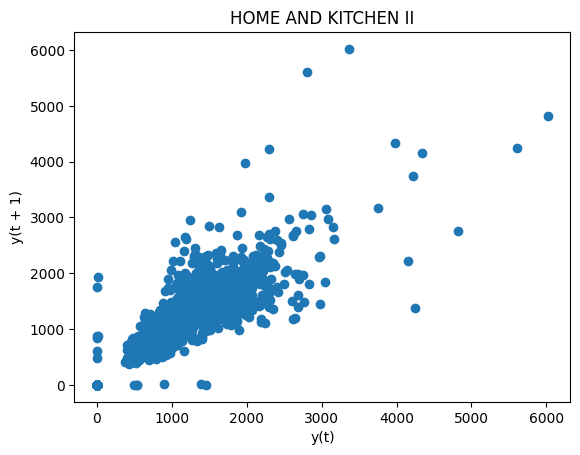

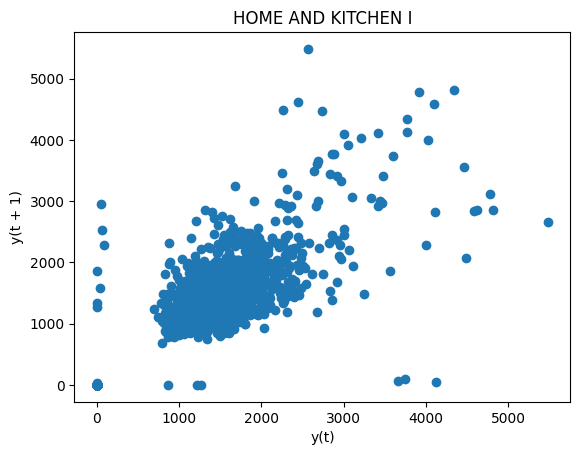

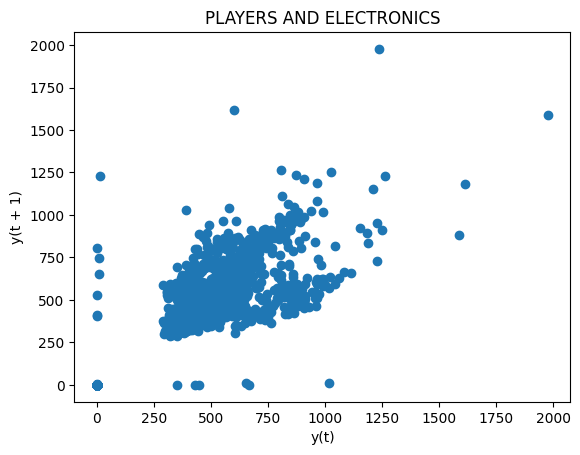

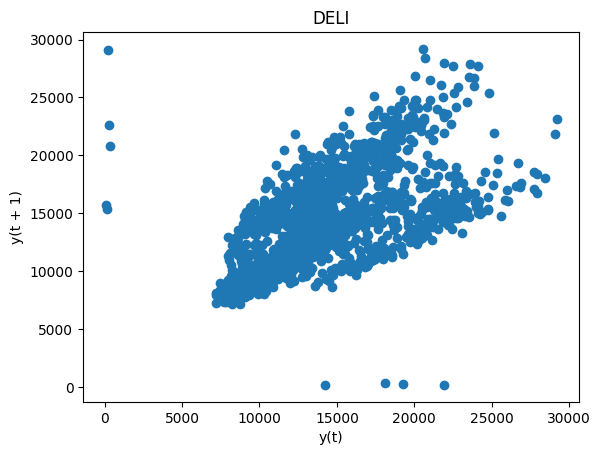

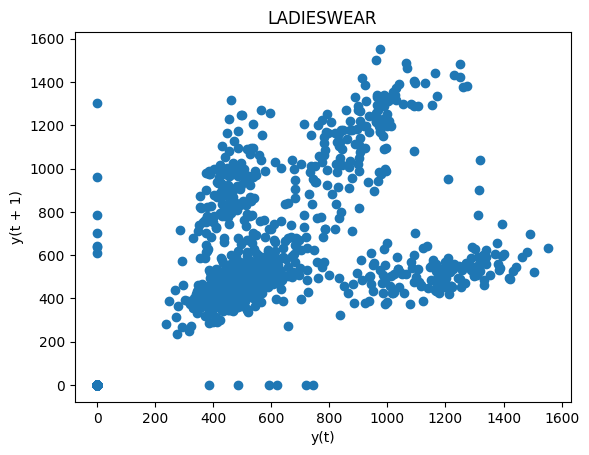

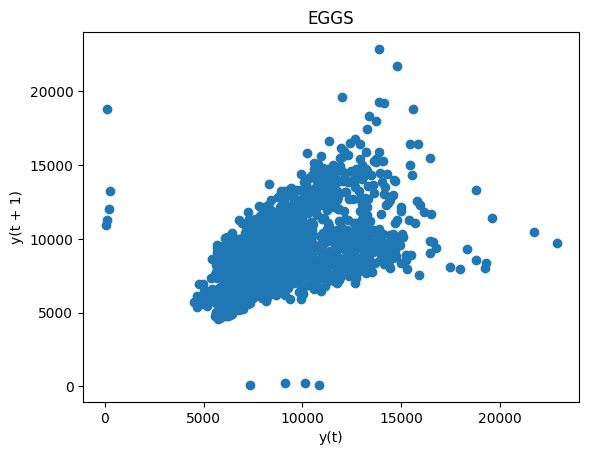

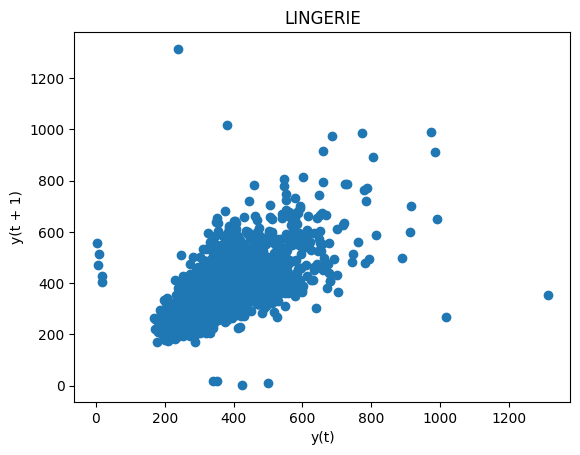

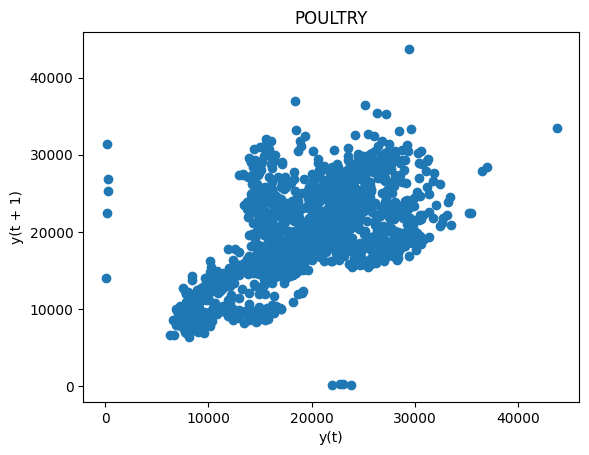

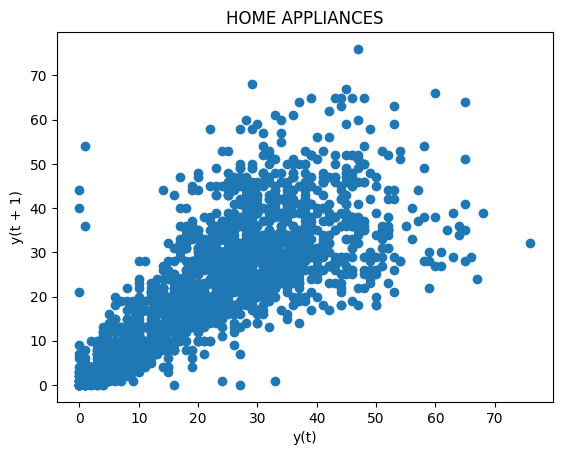

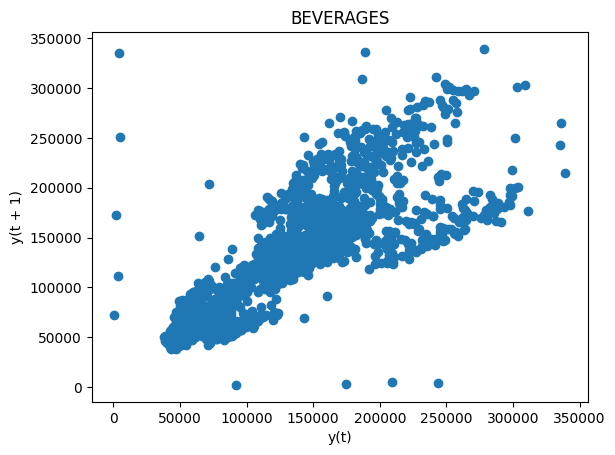

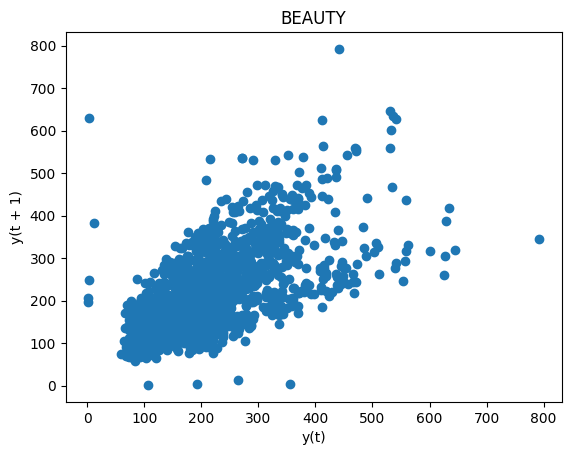

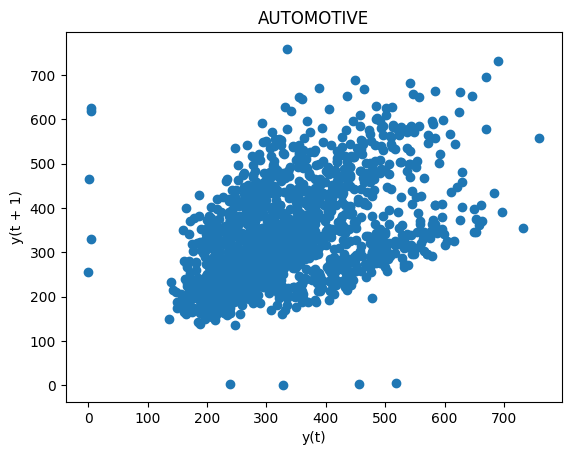

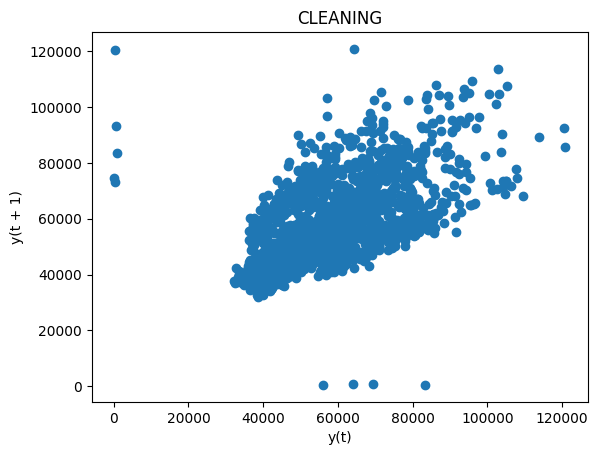

In [4]:
for family_name in set(df_train.family.to_list()):
    df_group_by_sales = df_train[df_train['family'] == family_name].groupby('date')[['sales']].sum()
    plt.figure()
    pd.plotting.lag_plot(df_group_by_sales.sales, lag=1)
    plt.title(family_name)